<a href="https://colab.research.google.com/github/JayeMineM/UoB_essentials/blob/main/essai2025Apr6_UoB_FDP_tfNet_FFHQhumFaces_INTELnonFaces_trainedCNNforVFD%26T_April28May_JMBOGBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRAIN Convolutional Neural Network (**CNN**) on Visual Face Detection & Tracking (VFD&T)

## **Convolutional Neural Network (CNN) OVERVIEW**

###**Neural Network & CNN**

**Neural Network**

  ![Neural_Network_fish](https://www.python-course.eu/images/neural_network_fish.png)


  
  **CNN**

  ![CNN_brain](https://www.deepcoredata.com/wp-content/uploads/2016/06/small_1420.png)


**Architechture (blockchain Diagram)**
![](https://miro.medium.com/max/2000/1*vkQ0hXDaQv57sALXAJquxA.jpeg)
A



###**Activation Layer**

● Used to increase non-linearity of the network without affecting receptive fields of conv layers

● Prefer ReLU, results in faster training

● LeakyReLU addresses the vanishing gradient problem



###**Pooling Layer**
● Convolutional layers provide activation maps.

● Pooling layer applies non-linear downsampling on activation maps.

● Pooling is aggressive (discard info); the trend is to use smaller filter size
and abandon pooling

![CNN_VGG architecture](https://miro.medium.com/max/2000/1*vkQ0hXDaQv57sALXAJquxA.jpeg)




![CNN input image](https://images.squarespace-cdn.com/content/54856bade4b0c4cdfb17e3c0/1478984569132-6IM9DVIMXJ5FSE08FZT2/?content-type=image%2Fjpeg
)


![]()

In [ ]:
!ls

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

##**Useful libraries Import**

In [ ]:
#necessary libraries import
import os
import pathlib
import sys
import keras
import tensorflow as tf
from tensorflow import keras

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(42)

# Matplotlib and seaborn for plotting
import plotly.express as px
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

In [ ]:
!pip show tensorflow

In [ ]:
#!pip install tensorflow=='1.*'

In [ ]:
#!pip show tensorflow


https://stackoverflow.com/questions/44054082/keras-utils-to-categorical-name-keras-not-defined

```
import keras
import keras.utils
from keras import utils as np_utils
```
but from keras import utils as np_utils is the most widely used.

Especially import keras is not a good practice because importing the higher module does not necessarily import its submodules (though it works in Keras)

For example,

import urllib does not necessarily import urllib.request because if there are so many big submodules, it's inefficient to import all of its submodules every time.

EDIT: With the introduction of Tensorflow 2, keras submodules such as keras.utils should now be imported as
```
from tensorflow.keras import utils as np_utils
```

In [ ]:
import keras
import keras.utils
from tensorflow.keras import utils as np_utils
#from keras.utils import to_categorical # PROBLEMATIC as DEprecated....

In [ ]:
# !pip (import) install tensorflow-datasets
#import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

##**CRUCIAL Functions Definition**

In [ ]:
def call__imgNumJayForm(): #@title jayForm
  #@markdown Please INPUT the amount of images (no more than 24) to randomly display:
  imgNum=None #@param{type:'integer'}
  #print(imgNum)
  return imgNum

In [ ]:
call__imgNumJayForm()

In [ ]:
import os
os.path.exists('12_Group_Group_12_Group_Group_12_108.jpg')

```
 faces = example["faces"]
  image = example["image"]
  imgFilename=example["image/filename"]
  print(faces, image, imgFilename)

```

In [ ]:
#train_df.label.value_counts()

###Retrieving Classes (label names)
To begin with, A function label_display is first defined to retrieve random images of objects according to their respective label ID values [ from 0 to 9] and to be able to confirm, with human eyes natural power and brain coordination that label names are correctly assigned to pictures. An initial run of the defined function can be seen in below

In [ ]:
#!pip install keras.utils
!pip install np.utils

In [ ]:
# set the matplotlib backend so figures can be saved in the background
#import matplotlib                  # (I_line2)
#matplotlib.use("Agg")
             # (I_line3)
# import the necessary packages
from sklearn.metrics import classification_report  # (I_line7)
#from keras.optimizers import SGD                 # (I_line8)
#from keras.utils import np_utils # (2025Apr3rd_Revision) already imported  <from tensorflow.keras import utils as np_utils> to avoid below ImportError
#ImportError: cannot import name 'np_utils' from 'keras.utils' (/usr/local/lib/python3.11/dist-packages/keras/api/utils/__init__.py)
#from keras import backend as K                # (I_line11)
from imutils import build_montages           # (I_line12)
#import matplotlib.pyplot as plt            # (I_line13)
import numpy as np
import cv2                               # (I_line15)

from tqdm import tqdm #jayAdd for progress bar taqaduma('I love U so much')

In [ ]:
#@title jayform

In [ ]:
def call__imgNumJayForm(): #@title jayForm
  #@markdown Please INPUT the amount of images (no more than 24) to randomly display:
  #imgNum = 12 #@param {type: "slider", min: 1, max: 24}
  imgNum= 1 #@param{type:'integer'}
  #print(imgNum)
  return imgNum
  #@markdown ---




In [ ]:
call__imgNumJayForm()

In [ ]:
def label_1240display(data, target):
  #trying to view images of imgNum number of randomly select items
  imgNum=int(input('Please INPUT the amount of images (no more than 24) to randomly display:'))

  #imgNum= 0 #@param{type:'integer'}
  if imgNum>24:
    print('Large number exceeding 24...function closing...sorry!')

  else:
    labelNames=[] #name to file as per class value when recognized
    labelNames=['Face', 'NO face']

    images=[]

    for i in tqdm(np.random.choice(np.arange(0, len(target)), size=(imgNum,))):

      labelIDtext=str(target[i]) # cast to string to avoid...SystemError:
    # <built-in function putText> returned NULL without setting an error

      label=target[i]
      #label=labelNames[target[i]]
    # May uncomment this code to display items names (labelNames)...and follow instruction at (LINEprintNAMES) further down

  #we are using "channels_last" ordering
      image=data[i].astype('uint8')

  # initialize the text label color as green (correct)
      color = (0, 255, 0)      # (I_line108)

  # merge the channels into one image and resize the image from
	# 32x32 to 96x96 so we can better see it and then draw the
	# predicted label on the image

  #image = cv2.merge([image]*3)      #this code is not required as color channels are already 3

      #image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
      #above code NOT required ... as image already better seen in imageJoe case....not sure!
      image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)

      cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50,color, 2)
      #cv2.putText(image, labelIDtext, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50,color, 2)

      # May replace 'labelIDtext' parameter above with 'label' to display names.# or put 'labelIDtext' back at 'label' (LINEprintNAME)

  # add the image to our list of output images
      images.append(image)                 # (I_line123)
 # construct the montage for the images
      canvasWidth=0 # initializing the width of the canvas, while the height is set to 4
      #canvasHeight=0 # initializing the height of the canvas, while the width is set to 10
      if imgNum%4==0:
        canvasWidth=imgNum//4
        #canvasHeight=imgNum//10
      else:
        canvasWidth=imgNum//4 +1
        #canvasHeight=imgNum//10 +1

      montage = build_montages(images, (96, 96), (canvasWidth, 4))[0]  # (I_line126)
      #montage = build_montages(images, (96, 96), (canvasWidth, 4))[0]  # (I_line126)
      #montage = build_montages(images, (96, 96), (canvasHeight, 10))[0]
  # show the output montage
           # cv2.imshow("Fashion MNIST", montage)  #jayNote: deprecated class
    from google.colab.patches import cv2_imshow
    cv2_imshow(montage)                # (I_line129)
    cv2.waitKey(0)                    # (I_line130)

In [ ]:
import numpy as np
import cv2
font = cv2.FONT_HERSHEY_SIMPLEX
# Create a black image
img = np.zeros((212,212,3), np.uint8)

#cv2.putText(img,'Hack Projects',(10,500), font, 1,(255,255,255),2)

# initialize the text label color as green (correct)
color = (0, 255, 0)

cv2.putText(img, 'Hack Projects', (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50,color, 2)
#Display the image

from google.colab.patches import cv2_imshow
#cv2_imshow(montage)

cv2_imshow(img)

cv2.waitKey(0)

In [ ]:
import numpy as np
import cv2
font = cv2.FONT_HERSHEY_SIMPLEX

# Create a black image
#img = np.zeros((32,32,3), np.uint8)
#img = np.zeros((96,96,3), np.uint8)
img = np.zeros((610,1024,3), np.uint8)

#cv2.putText(img,'Hack Projects',(10,500), font, 1,(255,255,255),2)

# initialize the text label color as green (correct)
color = (0, 255, 0)

cv2.putText(img, 'Hack Projects with DataJaySc', (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50,color, 2)
#Display the image

from google.colab.patches import cv2_imshow
#cv2_imshow(montage)

cv2_imshow(img)

cv2.waitKey(0)

In [ ]:
#To REVISE ...if Needed!!!

def label_display(data, target):
  #trying to view images of imgNum number of randomly select items
  imgNum=int(input('Please INPUT the amount of images (no more than 24) to randomly display:'))

  #imgNum= 0 #@param{type:'integer'}
  if imgNum>24:
    print('Large number exceeding 24...function closing...sorry!')

  else:
    labelNames=[] #name to file as per class value when recognized
    labelNames=['Face', 'NO face']

    images=[]

    for i in tqdm(np.random.choice(np.arange(0, len(target)), size=(imgNum,))):

      labelIDtext=str(target[i]) # cast to string to avoid...SystemError:
    # <built-in function putText> returned NULL without setting an error

      label=target[i]
      #label=labelNames[target[i]]
    # May uncomment this code to display items names (labelNames)...and follow instruction at (LINEprintNAMES) further down

  #we are using "channels_last" ordering
      #image=data[i].astype('uint8')
      image=np.array(data[i])

  # initialize the text label color as green (correct)
      color = (0, 255, 0)      # (I_line108)

  # merge the channels into one image and resize the image from
	# 32x32 to 96x96 so we can better see it and then draw the
	# predicted label on the image

  #image = cv2.merge([image]*3)      #this code is not required as color channels are already 3

      #image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
      #above code NOT required ... as image already better seen in imageJoe case....not sure!

      #image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
      #image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

      cv2.putText(image, label, (60, 120), cv2.FONT_HERSHEY_SIMPLEX, 0.50,color, 2)
      #cv2.putText(image, labelIDtext, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50,color, 2)

      # May replace 'labelIDtext' parameter above with 'label' to display names.# or put 'labelIDtext' back at 'label' (LINEprintNAME)

  # add the image to our list of output images
      images.append(image)
 # construct the montage for the images
      canvasWidth=0 # initializing the width of the canvas, while the height is set to 4
      #canvasHeight=0 # initializing the height of the canvas, while the width is set to 10
      if imgNum%4==0:
        canvasWidth=imgNum//4
        #canvasHeight=imgNum//10
      else:
        canvasWidth=imgNum//4 +1
        #canvasHeight=imgNum//10 +1

      montage = build_montages(images, (160, 180), (canvasWidth, 4))[0]
      #montage = build_montages(images, (96, 96), (canvasWidth, 4))[0]
      #montage = build_montages(images, (96, 96), (canvasHeight, 10))[0]
  # show the output montage
           # cv2.imshow("Fashion MNIST", montage)  #jayNote: deprecated class
    from google.colab.patches import cv2_imshow
    cv2_imshow(montage)
    cv2.waitKey(0)

In [ ]:
#multicate_imgFnameList

In [ ]:
#label_display(imageJoe,multicate_imgFnameList)

In [ ]:
#label_display(imageJoe_32by32rshpTrans,multicate_imgFnameList)
#item_imageJoe_list
#item_label_list

In [ ]:
#from google.colab import files
#files.upload()

**to Plot the dataset...** ...by Viewing few images

In [ ]:
# plot first few images from either train_X or test_X
def plot_fewImg(data,n):
  plt.figure(figsize=(6, 6))
  for i in range(n):
	  # define subplot
	  plt.subplot(n//3,3,1 + i)
    # plot raw pixel data
	  plt.imshow(data[i])
  # show the figure
  plt.show()

In [ ]:
pwd

# Convolutional Neural Network **(CNN) MODEL Construction**

##**Developing a Baseline Model**




###**Readings**

####*haveRead6_ R-FCN:* **Object Detection via Region-based Fully Convolutional Networks**, Jifeng Dai, Kaiming He, Jian Sun
(21Jun2016)

**1 INTRODUCTION**

A prevalent family [8, 6, 18] of deep networks for object detection can be **divided into two subnetworks** by the Region-of-Interest (RoI) pooling layer ([6] R. Girshick. Fast R-CNN. In ICCV, 2015):
* (i) **a shared, “fully convolutional” subnetwork** independent of RoIs, and
*(ii) **a RoI-wise subnetwork** that does not share computation.

This decomposition [8] was historically resulted from the pioneering classification architectures, such
as AlexNet [10] and VGG Nets [23], that consist of **two subnetworks** by design — a convolutional
subnetwork ending with a spatial pooling layer, followed by several fully-connected (fc) layers.
**Thus, the (last) spatial pooling layer** in image classification networks is naturally **turned into the RoI pooling** layer in object detection networks [8, 6, 18].
But recent state-of-the-art image classification networks such as **Residual Nets (ResNets)**[9] and GoogLeNets [24, 26] are by design fully convolutional
. By analogy, it appears natural *to use
all convolutional layers to construct* the **shared, convolutional subnetwork** *in the object detection
architecture,* **leaving the RoI-wise subnetwork no hidden layer.**


https://kgptalkie.com/image-classification-using-pre-trained-vgg-16-model/
**How to use Pre-trained VGG16 models to predict object**

![](https://qph.fs.quoracdn.net/main-qimg-e657c195fc2696c7d5fc0b1e3682fde6)

![](https://mlux9brz2apw.i.optimole.com/y1pDtVQ-TuEH2CPN/w:600/h:344/q:auto/https://kgptalkie.com/wp-content/uploads/2020/09/image-102.png)

The VGG network architecture was introduced by Simonyan and Zisserman in their 2014 paper, Very Deep Convolutional Networks for Large Scale Image Recognition.

This network is characterized by its simplicity, using only 3×3 convolutional layers stacked on top of each other in increasing depth. Reducing volume size is handled by max pooling. Two fully-connected layers, each with 4,096 nodes are then followed by a softmax classifie

In 2014, 16 and 19 layer networks were considered very deep (although we now have the ResNet architecture which can be successfully trained at depths of 50-200 for ImageNet and over 1,000 for CIFAR-10)

Due to its depth and number of fully-connected nodes, VGG is over 533MB for VGG16 and 574MB for VGG19



https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c
####**Understanding and visualizing ResNets**
Pablo Ruiz
Machine Learning @ Twilio & DL Research Collaborator @ Harvard

Followed by 523 people

Oct 8, 2018·9 min read


What problems ResNets solve?
One of the problems ResNets solve is the famous known vanishing gradient. This is because when the network is too deep, the gradients from where the loss function is calculated easily shrink to zero after several applications of the chain rule. This result on the weights never updating its values and therefore, no learning is being performed.
**With ResNets, the gradients can flow directly through the skip connections backwards from later layers to initial filters.**

![](https://miro.medium.com/max/770/1*I2557MCaFdNUm4q9TfvOpw.png)

Figure 2. Sizes of outputs and convolutional kernels for ResNet 34

![](https://miro.medium.com/max/550/1*kBlZtheCjJiA3F1e0IurCw.png)


![](https://miro.medium.com/max/770/1*Y-u7dH4WC-dXyn9jOG4w0w.png)
Figure 3. Another look at ResNet 34


###**Convolution 1**
The first step on the ResNet before entering the common layer behavior is a block — called here Conv1 — consisting on a convolution + batch normalization + max pooling operation.

![](https://miro.medium.com/max/748/1*CJn_fMeW4m2OSt71jzO4WA.png)
Figure 4. Conv1 — Convolution

The next step is the batch normalization, which is an element-wise operation and therefore, it does not change the size of our volume. Finally, we have the (3x3) Max Pooling operation with a stride of 2. We can also infer that they first pad the input volume, so the final volume has the desired dimensions.


![](https://miro.medium.com/max/770/1*_kbJ_fvRhVPQ1fRRssEwhA.png)
Figure 5. Conv1 — Max Pooling

##**ResNet Layers**
So, let’s explain this repeating name, block. Every layer of a ResNet is composed of several blocks. This is because when ResNets go deeper, they normally do it by increasing the number of operations within a block, but the number of total layers remains the same — 4. An operation here refers to a convolution a batch normalization and a ReLU activation to an input, except the last operation of a block, that does not have the ReLU.
Therefore, in the PyTorch implementation they distinguish between the blocks that includes 2 operations — **Basic Block** — and the blocks that include 3 operations — **Bottleneck Block**. Note that normally each of these operations is called layer, but we are using layer already for a group of blocks.
We are facing a Basic one now. The input volume is the last output volume from Conv1. Let’s see Figure 6 to figure out what is happening inside this block.


##**Block 1**
####**1 convolution**
We are replicating the simplified operation for every layer on the paper.


![](https://miro.medium.com/max/770/1*fW8FORQBlikQTOAUVBqMGA.png)
Figure 6. Layer 1, block 1, operation 1

We can double check now in the table from the paper we are using [3x3, 64] kernel and the output size is [56x56]. We can see how, as we mentioned previously, the size of the volume does not change within a block. This is because a padding = 1 is used and a stride of also 1. Let’s see how this extends to an entire block, to cover the 2 [3x3, 64] that appears in the table.

![](https://miro.medium.com/max/770/1*6Cdsm7k2gf9QUEwAlsbT8A.png)
Figure 7. Layer 1, block 1

The same procedure can be expanded to the entire layer then as in Figure 8. Now, we can completely read the whole cell of the table (just recap we are in the 34 layers ResNet at Conv2_x layer.
We can see how we have the [3x3, 64] x 3 times within the layer.
![](https://miro.medium.com/max/770/1*CgSI0jjpzQGPVS4hB1EHng.png)
Figure 8. Layer 1

##**Patterns**
The next step is to escalate from the entire block to the entire layer. In the Figure 1 we can see how the layers are differentiable by colors. However, if we look at the first operation of each layer, we see that the stride used at that first one is 2, instead of 1 like for the rest of them.
This means that the down sampling of the volume though the network is achieved by increasing the stride instead of a pooling operation like normally CNNs do. In fact, only one max pooling operation is performed in our Conv1 layer, and one average pooling layer at the end of the ResNet, right before the fully connected dense layer in Figure 1.
We can also see another repeating pattern over the layers of the ResNet, the dot layer representing the change of the dimensionality. This agrees with what we just said. The first operation of each layer is reducing the dimension, so we also need to resize the volume that goes through the skip connection, so we could add them like we did in Figure 7.
This difference on the skip connections are the so called in the paper as **Identity Shortcut** and **Projection Shortcut**. The identity shortcut is the one we have already discussed, simply bypassing the input volume to the addition operator. The projection shortcut performs a convolution operation to ensure the volumes at this addition operation are the same size. From the paper we can see that there are 2 options for matching the output size. Either padding the input volume or perform 1x1 convolutions. Here, this second option is shown.
![](https://miro.medium.com/max/770/1*ymjFDIMD6DDiTEwkTYT4Ng.png)
Figure 9. Layer2, Block 1, operation 1


Figure 9 represents this down sampling performed by increasing the stride to 2. The number of filters is duplicated in an attempt to preserve the time complexity for every operation (56*64 = 28*128). Also, note that now the addition operation cannot be performed since the volume got modified. In the shortcut we need to apply one of our down sampling strategies. The 1x1 convolution approach is shown in Figure 10.
![](https://miro.medium.com/max/770/1*2B8EPyRlepndtWDDc9KUFQ.png)
Figure 10. Projection Shortcut

The final picture looks then like in Figure 11 where now the 2 output volumes of each thread has the same size and can be added.
![](https://miro.medium.com/max/770/1*Xd-OIT9GRwLaM3F5jdbfzQ.png)
Figure 11. Layer 2, Block 1

In Figure 12 we can see the global picture of the entire second layer. The behavior is exactly the same for the following layers 3 and 4, changing only the dimensions of the incoming volumes.
https://miro.medium.com/max/770/1*17tD3GCz2zJq8ifoWCS9dA.png
Figure 12.Layer 2

##**Summary**
The ResNets following the explained rules built by the authors yield to the following structures as shown in Figure 2:
![](https://miro.medium.com/max/761/1*r1c1C2RY8tkR_SvdV6aHsw.png)
Table 1. ResNets architectures for ImageNet

###**Bibliography**
[1] K. He, X. Zhang, S. Ren and J. Sun, “Deep Residual Learning for Image Recognition,” in CVPR, 2016.

####**Baseline: VGG (Virtual Geometric Group) Blocks**
The define_model() function for 24VGG blocks is listed below.

### **Relevant Libraries IMPORT**

In [ ]:
#necessary libraries import
import os
import sys
import keras
import tensorflow as tf
from tensorflow import keras

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(42)

# Matplotlib and seaborn for plotting
import plotly.express as px
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

In [ ]:

#from keras.utils import to_categorical #PROBLEMATIC as DEPRECATED....!!!
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
#from keras.preprocessing.image import ImageDataGenerator # (2025Apr3rdRevision)error
#ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (/usr/local/lib/python3.11/dist-packages/keras/api/preprocessing/image/__init__.py)
from tensorflow.keras.preprocessing.image import ImageDataGenerator #(2025Apr3rdRevision)error REMEDY


In [ ]:
# Relevant Libraries IMPORT
import os
import sys
from matplotlib import pyplot
#from keras.datasets import cifar10
#from keras.utils import to_categorical
#from keras.models import Sequential
#from keras.layers import Conv2D
#from keras.layers import MaxPooling2D
#from keras.layers import Dense
#from keras.layers import Flatten
#from keras.optimizers import SGD
#from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

###**GOOD...Baseline version of define_model()**

In [ ]:
#Converter installation
#!pip install tensorflowjs
import tensorflowjs as tfjs

 Try YDF, the successor of TensorFlow Decision Forests using the same algorithms but with more features and faster training!

Old code  |  New code
--- | ---
import tensorflow_decision_forests as tfdf | import ydf
tf_ds = tfdf.keras.pd_dataframe_to_tf_dataset(ds, label="l")
model = tfdf.keras.RandomForestModel(label="l")     model.fit(tf_ds) | model = ydf.RandomForestLearner(label="l").train(ds)

(Learn more in the [migration guide](https://ydf.readthedocs.io/en/latest/tutorial/migrating_to_ydf/))



In [ ]:

# GOOD...Baseline version of define_model()

def Jay_baseline_CNN_W40cL6_224VGGnet():
  #len(Jay_baseline_CNN_W40cL6_224VGGnet().weights)...40
  #Total params: 24,342,023
  #Trainable params: 24,342,023
  #Non-trainable params: 0

  model =keras.Sequential(name='JaybaselineCNN_W40cL6_224VGG') # Our model  is initialized using the Sequential  API

    #CONVOLUTION Block_1st
  #3 layers => Max-pooling (RELU => stride 2 layers)
  #Input(I)=224, Filter(F)|Kernel(K)=3, Stride(S)=2 .... Output=[(I-F)/S]+1 =[224-3]/2 + 1=111.5 ~ 112
  #inputs=keras.Input(shape=(224,224,64))
  model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224,224,3)))
  model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  #model.add(BatchNormalization())
  model.add(keras.layers.MaxPooling2D((2, 2)))

	  #CONVOLUTION Block_2nd
  # 3 layers => Max-pooling (RELU => stride 2 layers)
	#inputs=keras.Input(shape=(112,112,128))
  model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(keras.layers.MaxPooling2D((2, 2)))

    #CONVOLUTION Block_3rd
  # 3 layers => Max-pooling (RELU => stride 2 layers)
  #inputs=keras.Input(shape=(56,56,256))
  model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(keras.layers.MaxPooling2D((2, 2)))

    #CONVOLUTION Block_4th
  # 3 layers => Max-pooling (RELU => stride 2 layers)
  #inputs=keras.Input(shape=(28,28,512))
  model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(keras.layers.MaxPooling2D((2, 2)))

   #CONVOLUTION Block_5th
  # 3 layers => Max-pooling (RELU => stride 2 layers)
  #inputs=keras.Input(shape=(14,14,512))
  model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(keras.layers.MaxPooling2D((2, 2)))

   #CONVOLUTION Block_6th
  # 3 layers => Max-pooling (RELU => stride 2 layers)
  #inputs=keras.Input(shape=(7,7,512))
  #model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(keras.layers.MaxPooling2D((2, 2)))


 	#first (and only) set of FC (Final Coding) => RELU layers
  model.add(keras.layers.Flatten()) # the output of the preceding MaxPooling2D  layer and flatten it into a single vector.
  model.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform')) # Our fully-connected layer contains 128 nodes
  model.add(keras.layers.Dense(7, activation='softmax')) # another fully-connected layer, but this one is special; num nodes= num classes =7

 	# compile model
	#opt = SGD(lr=0.001, momentum=0.9)
  opt=keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  return model


![](https://miro.medium.com/max/761/1*r1c1C2RY8tkR_SvdV6aHsw.png)

**Table 1. ResNets architectures for ImageNet**

Bibliography
[1] K. He, X. Zhang, S. Ren and J. Sun, “Deep Residual Learning for Image Recognition,” in CVPR, 2016.

In [ ]:
model=Jay_baseline_CNN_W40cL6_224VGGnet()
model.summary()

In [ ]:
len(model.weights)

In [ ]:
#def fit_model(modelJay):
def train_fit_model(modelJay,trainXprep,trainY):

  try:
    eNum=int(input('Please INPUT the desired number of epochs:'))
  except ValueError:
    print('invalid entry!!...process aborted...sorry...!')
    #exit
  model=modelJay()
  print(modelJay.name)

  hist = modelJay.fit(trainXprep, trainY, epochs=eNum, batch_size=64, validation_split=0.3, verbose=1,)
# validation_split=0.1means we use 10% of training data as the validation data
# epochs is the number of training loops we will do.
# one epoch will expose all of our training data once to the network.
# more epochs means the network will know better about our data.
# and the result is...

  return eNum,hist

**GUIDANCE**
```
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm


# PLOT Diagnostic Learning CURVES
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

# RUN the Test Harness for Evaluating a Model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)

	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	# prepare iterator
	it_train = datagen.flow(trainX, trainY, batch_size=64)
	# fit model
	steps = int(trainX.shape[0] / 64)
	history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=400, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
#run_test_harness()
```

#**Load TRAIN and TEST datasets...then Merge** (FFHQ & INTEL)

##**Load TRAIN and TEST Datasets Flickr-Faces-HQ Dataset (FFHQ)**

https://github.com/NVlabs/ffhq-dataset

###**Flickr-Faces-HQ Dataset (FFHQ)**
https://github.com/NVlabs/ffhq-dataset

**Download script**
You can either grab the data directly from Google Drive or use the provided [download script](https://github.com/NVlabs/ffhq-dataset/blob/master/download_ffhq.py). The script makes things considerably easier by automatically downloading all the requested files, verifying their checksums, retrying each file several times on error, and employing multiple concurrent connections to maximize bandwidth.
```
> python download_ffhq.py -h
usage: download_ffhq.py [-h] [-j] [-s] [-i] [-t] [-w] [-r] [-a]
                        [--num_threads NUM] [--status_delay SEC]
                        [--timing_window LEN] [--chunk_size KB]
                        [--num_attempts NUM]

Download Flickr-Face-HQ (FFHQ) dataset to current working directory.

optional arguments:
  -h, --help           show this help message and exit
  -j, --json           download metadata as JSON (254 MB)
  -s, --stats          print statistics about the dataset
  -i, --images         download 1024x1024 images as PNG (89.1 GB)
  -t, --thumbs         download 128x128 thumbnails as PNG (1.95 GB)
  -w, --wilds          download in-the-wild images as PNG (955 GB)
  -r, --tfrecords      download multi-resolution TFRecords (273 GB)
  -a, --align          recreate 1024x1024 images from in-the-wild images
  --num_threads NUM    number of concurrent download threads (default: 32)
  --status_delay SEC   time between download status prints (default: 0.2)
  --timing_window LEN  samples for estimating download eta (default: 50)
  --chunk_size KB      chunk size for each download thread (default: 128)
  --num_attempts NUM   number of download attempts per file (default: 10)

```

```
> python ..\download_ffhq.py --json --images
OUTPUT: Downloading JSON metadata...
\ 100.00% done  2/2 files  0.25/0.25 GB   43.21 MB/s  ETA: done
Parsing JSON metadata...
Downloading 70000 files...
| 100.00% done  70001/70001 files  89.19 GB/89.19 GB  59.87 MB/s  ETA: done

```
The script also serves as a reference implementation of the automated scheme that we used to align and crop the images. Once you have downloaded the in-the-wild images with python download_ffhq.py --wilds, you can run python download_ffhq.py --align to reproduce exact replicas of the aligned 1024×1024 images using the facial landmark locations included in the metadata.

###**Metadata**
The ```ffhq-dataset-v2.json``` file contains the following information for each image in a machine-readable format:

```
{
  "0": {                                                 # Image index
    "category": "training",                              # Training or validation
    "metadata": {                                        # Info about the original Flickr photo:
      "photo_url": "https://www.flickr.com/photos/...",  # - Flickr URL
      "photo_title": "DSCF0899.JPG",                     # - File name
      "author": "Jeremy Frumkin",                        # - Author
      "country": "",                                     # - Country where the photo was taken
      "license": "Attribution-NonCommercial License",    # - License name
      "license_url": "https://creativecommons.org/...",  # - License detail URL
      "date_uploaded": "2007-08-16",                     # - Date when the photo was uploaded to Flickr
      "date_crawled": "2018-10-10"                       # - Date when the photo was crawled from Flickr
    },
    "image": {                                           # Info about the aligned 1024x1024 image:
      "file_url": "https://drive.google.com/...",        # - Google Drive URL
      "file_path": "images1024x1024/00000/00000.png",    # - Google Drive path
      "file_size": 1488194,                              # - Size of the PNG file in bytes
      "file_md5": "ddeaeea6ce59569643715759d537fd1b",    # - MD5 checksum of the PNG file
      "pixel_size": [1024, 1024],                        # - Image dimensions
      "pixel_md5": "47238b44dfb87644460cbdcc4607e289",   # - MD5 checksum of the raw pixel data
      "face_landmarks": [...]                            # - 68 face landmarks reported by dlib
    },
    "thumbnail": {                                       # Info about the 128x128 thumbnail:
      "file_url": "https://drive.google.com/...",        # - Google Drive URL
      "file_path": "thumbnails128x128/00000/00000.png",  # - Google Drive path
      "file_size": 29050,                                # - Size of the PNG file in bytes
      "file_md5": "bd3e40b2ba20f76b55dc282907b89cd1",    # - MD5 checksum of the PNG file
      "pixel_size": [128, 128],                          # - Image dimensions
      "pixel_md5": "38d7e93eb9a796d0e65f8c64de8ba161"    # - MD5 checksum of the raw pixel data
    },
    "in_the_wild": {                                     # Info about the in-the-wild image:
      "file_url": "https://drive.google.com/...",        # - Google Drive URL
      "file_path": "in-the-wild-images/00000/00000.png", # - Google Drive path
      "file_size": 3991569,                              # - Size of the PNG file in bytes
      "file_md5": "1dc0287e73e485efb0516a80ce9d42b4",    # - MD5 checksum of the PNG file
      "pixel_size": [2016, 1512],                        # - Image dimensions
      "pixel_md5": "86b3470c42e33235d76b979161fb2327",   # - MD5 checksum of the raw pixel data
      "face_rect": [667, 410, 1438, 1181],               # - Axis-aligned rectangle of the face region
      "face_landmarks": [...],                           # - 68 face landmarks reported by dlib
      "face_quad": [...]                                 # - Aligned quad of the face region
    }
  },
  ...
}

```

In [ ]:
!wget https://raw.githubusercontent.com/NVlabs/ffhq-dataset/master/download_ffhq.py

In [ ]:
pwd

In [ ]:
ls

In [ ]:
#remove
!rm *json*
!rm *py.1
!rm *open*

In [ ]:
ls

**Python file Scripts**

In [ ]:
ls seg_train

In [ ]:
#!cp -r '/content/seg_train/thumbnails128x128' 'thumbnails128x128'

In [ ]:
!python download_ffhq.py -h

In [ ]:
#!cat download_ffhq.py

####**[Flickr-Faces-HQ Dataset (FFHQ)](https://github.com/NVlabs/ffhq-dataset)  Data GENERATION**

In [ ]:
# Flickr-Faces-HQ (FFHQ) Data Generation
#!python download_ffhq.py --json --stats --thumbs --num_attempts 20
!python download_ffhq.py --json --stats --thumbs # Good when it works although LOAD Time Consuming ...as a matter of fact!!

In [ ]:
pwd

https://github.com/NVlabs/ffhq-dataset?tab=readme-ov-file
###Download script
You can either grab the data directly from Google Drive or use the provided [download script](https://github.com/NVlabs/ffhq-dataset/blob/master/download_ffhq.py). The script makes things considerably easier by automatically downloading all the requested files, verifying their checksums, retrying each file several times on error, and employing multiple concurrent connections to maximize bandwidth.

> python download_ffhq.py -h
usage: download_ffhq.py [-h] [-j] [-s] [-i] [-t] [-w] [-r] [-a]
                        [--num_threads NUM] [--status_delay SEC]
                        [--timing_window LEN] [--chunk_size KB]
                        [--num_attempts NUM]

Download Flickr-Face-HQ (FFHQ) dataset to current working directory.

optional arguments:

 co1|col2
 ---|---
-h, --help|show this help message and exit
  -j, --json|download metadata as JSON (254 MB)
  -s, --stats   |        print statistics about the dataset
  -i, --images   |       download 1024x1024 images as PNG (89.1 GB)
  -t, --thumbs  |        download 128x128 thumbnails as PNG (1.95 GB)
  -w, --wilds    |       download in-the-wild images as PNG (955 GB)
  -r, --tfrecords  |    download multi-resolution TFRecords (273 GB)
  -a, --align     |      recreate 1024x1024 images from in-the-wild images
  --num_threads NUM  |   number of concurrent download threads (default: 32)
  --status_delay SEC  |  time between download status prints (default: 0.2)
  --timing_window LEN  | samples for estimating download eta (default: 50)
  --chunk_size KB    |   chunk size for each download thread (default: 128)
  --num_attempts NUM  |  number of download attempts per file (default: 10)
  --random-shift SHIFT | standard deviation of random crop rectangle jitter
  --retry-crops     |    retry random shift if crop rectangle falls outside image (up to 1000
                        times)
  --no-rotation    |     keep the original orientation of images
  --no-padding    |      do not apply blur-padding outside and near the image borders
  --source-dir DIR   |   where to find already downloaded FFHQ source data


In [ ]:
!python download_ffhq.py --json --stats --thumbs

In [ ]:
ls

In [ ]:
#https://www.kaggle.com/datasets/imcr00z/flickr-faces-70k-thumbnails-128x128?resource=download-directory

import kagglehub

# Download latest version
path = kagglehub.dataset_download("imcr00z/flickr-faces-70k-thumbnails-128x128")

print("Path to dataset files:", path)

In [ ]:
ls /root/.cache/kagglehub/datasets/imcr00z/flickr-faces-70k-thumbnails-128x128/

In [ ]:
ls /root/.cache/kagglehub/datasets/imcr00z/flickr-faces-70k-thumbnails-128x128/versions/1

In [ ]:
os.path.exists('thumbnails128x128/')

In [ ]:
#CRUCIAL Copy of folder thumbnails128x128 if not exist in cmw (2025Apr4th REVISION)
if not os.path.exists('thumbnails128x128/'):
  !cp -r '/content/seg_train/thumbnails128x128' 'thumbnails128x128'
  #!cp -r '/root/.cache/kagglehub/datasets/imcr00z/flickr-faces-70k-thumbnails-128x128/versions/1/thumbnails128x128' 'thumbnails128x128'

In [ ]:
ls thumbnails128x128/

In [ ]:
#'/'.join([path,'thumbnails128x128/']) # 2025Apr3rd_Revision

In [ ]:
os.path.exists('thumbnails128x128/')

In [ ]:
#pathlib.Path.cwd()
#pathlib.Path('/'.join([path,'thumbnails128x128/'])).exists()
#pathlib.Path.exists('thumbnails128x128/')

In [ ]:
#!find -wholename 'thumbnails128x128'
os.path.exists('/'.join([path,'thumbnails128x128/']))

In [ ]:
os.path.isdir('thumbnails128x128/')

In [ ]:
#ls ''/'.join([path,'thumbnails128x128/'])'

In [ ]:
pwd

[Flickr-Faces-HQ Dataset (FFHQ)](https://github.com/NVlabs/ffhq-dataset) **Dataset CONTINGENCY LOADING** here ...

**CONTINGENCY** Download **PLAN** of missing json file ```./ffhq-dataset-v2.json``` for FFHQ_object generation.

**!!!...Add download link from my ONE_Drive...!!!** to replace gglDriveMounting!!

In [ ]:
#**CONTINGENCY** Download **PLAN** of missing files
import os
from google.colab import drive

#CONTINGENCY ACTION...


#if not os.path.isdir('./my_dataset/thumbnails128x128/'):
#f not os.path.exists('/'.join([path,'thumbnails128x128/'])):

if not os.path.exists('thumbnails128x128/'):
#if not os.path.exists('./ffhq-dataset-v2.json'):
  #!!!....Below mounting to replace with OneDrive !wget <url> ....!!
  if not os.path.exists('/content/gdrive'):
    drive.mount('/content/gdrive')
    !os.getcwd()
    !ls ./gdrive

  #Crucial FFHQ Files Move (Download) & to unzip
  !cp '/content/gdrive/My Drive/ffhq-dataset-v2.json' 'ffhq-dataset-v2.json'

  #UnComment ..when necessary.. as BackUp!!..ep ...needed!!
  !cp '/content/gdrive/My Drive/jay_thumbnails128x128.zip' 'thumbnails128x128.zip' #backUp
  #!wget https://1drv.ms/u/s!Am4wz_MViOschXdgGWqXu0Z6q8P0?e=ac4TSx
  !unzip -q thumbnails128x128.zip
  !os.getcwd()

  !unzip -q thumbnails128x128.zip
  #


In [ ]:
pwd

####**```ffhq-dataset-v2.json```** for object generation (metadata)

In [ ]:
#!wget https://1drv.ms/u/s!Am4wz_MViOschXdgGWqXu0Z6q8P0?e=ac4TSx
#!wget https://drive.google.com/open?id=16N0RV4fHI6joBuKbQAoG34V_cQk7vxSA
#!wget  https://drive.usercontent.google.com/download/id=16N0RV4fHI6joBuKbQAoG34V_cQk7vxSA
#https://drive.usercontent.google.com/open?id=16N0RV4fHI6joBuKbQAoG34V_cQk7vxSA&authuser=0

In [ ]:
pwd

In [ ]:
ls

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
#ls ./gdrive/MyDrive/

In [ ]:
import json

# read file ##crucial json meta data file
with open('./gdrive/MyDrive/ffhq-dataset-v2.json', 'r') as myfile:
    data=myfile.read()

# parse file
obj = json.loads(data)

# show values
print("Image index: " + str(obj['0']))
#print("Info about the aligned 1024x1024 image: " + str(obj["image"]))
print("Info about the 128x128 thumbnail: " + str(obj['0']['thumbnail']))

In [ ]:
obj['1']['metadata']

In [ ]:
obj['0']['thumbnail']['file_path']

In [ ]:
obj['0']['thumbnail']['file_path']

In [ ]:
obj['1']['image']['file_path']

In [ ]:
obj['602']['image']['file_path']

In [ ]:
from google.colab.patches import cv2_imshow
img650=obj['650']['image']['face_landmarks']
img650
#cv2_imshow(img650) # AttributeError: 'list' object has no attribute 'clip'

In [ ]:
#obj['0']

In [ ]:
obj['0']
obj['0']['category']
obj['0']['metadata']
obj['0']['metadata']['photo_title'] ,obj['0']['metadata']['photo_url']

In [ ]:
obj['2']['metadata']['photo_title'] ,obj['2']['metadata']['photo_url']

In [ ]:
obj['650']['metadata']['photo_title'] ,obj['9']['metadata']['photo_url']

In [ ]:
len(obj)

In [ ]:
def call_imgNumJayForm(): #@title jayForm
  #@markdown Please INPUT the amount of images (no more than 24) to randomly display:
  imgNum=48 #@param{type:'integer'}
  #print(imgNum)
  return imgNum

In [ ]:
pwd

In [ ]:
import matplotlib.pyplot as plt
import os
import pathlib
import cv2
import random
from tqdm import tqdm
import numpy as np
from google.colab.patches import cv2_imshow


In [ ]:
#ls './thumbnails128x128'

In [ ]:
#!find . -wholename '15790.png'
#!find . -name '15795.png'
#!find . -name '68148.png'
#thumbnails128x128/15000/15790.png

In [ ]:
os.path.isfile('thumbnails128x128/15795.png')
#thumb128path='/'.join([path,'thumbnails128x128']) # (2025April4th REMEDY)

In [ ]:
#os.path.isfile('15795.png')

In [ ]:
ls

In [ ]:
os.path.isfile('thumbnails128x128/15790.png')
#os.path.isfile('/'.join([thumb128path,'15000/15790.png']))

In [ ]:
imgNum=call_imgNumJayForm()

In [ ]:
import numpy as np
enum_list=np.random.choice(np.arange(0, len(obj)), size=(imgNum,))
len(enum_list), enum_list

In [ ]:
len(set(enum_list))

In [ ]:
enum=np.random.choice(enum_list)
enum

```
 thumb_filePath= obj[str(enum)]['thumbnail']["file_path"]
  image_filePath= obj[str(enum)]['image']["file_path"]
      #read image via full_path
      #below snippet CRUCIAL...when Not All files have been downloaded.
  if os.path.isfile(thumb_filePath):
    #plt.figure(figsize=(12,14))
    thumbMatrix = cv2.imread(thumb_filePath)
    thumb = cv2.cvtColor(thumbMatrix,cv2.COLOR_BGR2RGB)
```

In [ ]:
#enum=15795
Jenum_list=np.random.choice(np.arange(0, len(obj)), size=(imgNum,))
print(len(Jenum_list))
Jenum=np.random.choice(Jenum_list)
Jenum

thumb_filePath= obj[str(Jenum)]['thumbnail']["file_path"]
thumb_filePath

In [ ]:
thumb_filePath=obj[str(Jenum)]['thumbnail']["file_path"]
thumb_filePath

In [ ]:
thumb_filePath.split('/')

In [ ]:
thumb_ext=thumb_filePath.split('/')[-1]
thumb_ext

In [ ]:
f'./thumbnails128x128/{thumb_ext}'

In [ ]:
os.path.isfile(f'./thumbnails128x128/{thumb_ext}')

In [ ]:
#enum=15795
Jenum_list=np.random.choice(np.arange(0, len(obj)), size=(imgNum,))
print(len(Jenum_list))
Jenum=np.random.choice(Jenum_list)
Jenum

thumb_filePath= obj[str(Jenum)]['thumbnail']["file_path"]
image_filePath= obj[str(Jenum)]['image']["file_path"]
thumb_ext=thumb_filePath.split('/')[-1] #2025Apr4th_REVISION) as metadata from github, but image from flickr
      #read image via full_path
      #below snippet CRUCIAL...when Not All files have been downloaded.
img_path=f'./thumbnails128x128/{thumb_ext}'
#if os.path.isfile(thumb_filePath): #2025Apr4th_REVISION)
if os.path.isfile(img_path):
  #plt.figure(figsize=(12,14))
  #thumbMatrix = cv2.imread(thumb_filePath)
  imgMatrix = cv2.imread(img_path)
  #thumb = cv2.cvtColor(thumbMatrix,cv2.COLOR_BGR2RGB)
  img = cv2.cvtColor(imgMatrix,cv2.COLOR_BGR2RGB)
  cv2_imshow(img)
else:
  print ('imageFile {} NOT found!!'.format(img_path))




In [ ]:
'''
#if os.path.isfile(obj[str(enum)]['thumbnail']["file_path"]):
if os.path.isfile(thumb_filePath):
  plt.figure(figsize=(12,14))
  imageMatrix = cv2.imread(thumb_filePath)

  cv2_imshow(imageMatrix.astype('uint8'))
  #plt.imshow(imageMatrix)
else:
  print ('imageFile {} NOT found!!'.format(thumb_filePath))
'''

In [ ]:
thumb_filePath

In [ ]:
#image_filePath
#os.path.abspath('68148.png')

In [ ]:


pathlib.Path.cwd().parts

In [ ]:
obj[str(enum)]['thumbnail']["file_path"]

In [ ]:
#obj.keys()

In [ ]:
enum=2
image_filePath= obj[str(enum)]['image']["file_path"]
image_filePath

In [ ]:
#ls thumbnails128x128/

In [ ]:
imgMatrix= cv2.imread(image_filePath)
imgMatrix
#imgMatrix.astype('uint8')
#img=cv2.cvtColor(imgMatrix,cv2.COLOR_BGR2RGB)
    #cv2_imshow(thumb)

In [ ]:
thumb_filePath # reminder: thumb_filePath= obj[str(enum)]['thumbnail']["file_path"]

In [ ]:
#obj.keys()

In [ ]:
thumb_filePath= obj[str(enum)]['thumbnail']["file_path"]

In [ ]:
image_filePath

In [ ]:
randomR=random.choice(range(0,len(obj),20))

i=0
imgNum=20
#imgNum=int(call__imgNumJayForm())

plt.figure(figsize=(20,26))
#for i in range(len(obj)):

for enum in tqdm(np.random.choice(np.arange(0, len(obj)), size=(imgNum,))):
      #retrieve full_path
  thumb_filePath= obj[str(enum)]['thumbnail']["file_path"]
  image_filePath= obj[str(enum)]['image']["file_path"]
      #read image via full_path

  thumb_ext=thumb_filePath.split('/')[-1] #2025Apr4th_REVISION) as metadata from github, but image from flickr
  img_path=f'./thumbnails128x128/{thumb_ext}'
  if os.path.isfile(img_path):
    imgMatrix = cv2.imread(img_path)

      #below snippet CRUCIAL...when Not All files have been downloaded.

    plt.subplot(imgNum//5, 5, i+1 )

    #plt.figure(figsize=(12,14))
    imgMatrix= cv2.imread(img_path)
    img=cv2.cvtColor(imgMatrix,cv2.COLOR_BGR2RGB)
    #cv2_imshow(thumb)

    #plt.subplot(imgNum//5, 5, i + 1)
    plt.imshow(img)
    #plt.imshow(imageMatrix)
    #cv2_imshow(thumb)

    plt.colorbar()
    plt.grid(False)

    i=i+1

In [ ]:
randomR=random.choice(range(0,len(obj),20))

i=0
imgNum=20
#imgNum=int(call__imgNumJayForm())

plt.figure(figsize=(20,26))
#for i in range(len(obj)):

for enum in tqdm(np.random.choice(np.arange(0, len(obj)), size=(imgNum,))):
      #retrieve full_path
  thumb_filePath= obj[str(enum)]['thumbnail']["file_path"]
  image_filePath= obj[str(enum)]['image']["file_path"]
      #read image via full_path

  thumb_ext=thumb_filePath.split('/')[-1] #2025Apr4th_REVISION) as metadata from github, but image from flickr
  img_path=f'./thumbnails128x128/{thumb_ext}'

  if os.path.isfile(img_path):

    imgMatrix=cv2.imread(img_path)
    image =cv2.cvtColor(imgMatrix,cv2.COLOR_BGR2RGB)

        # The “imread” function reads the images in RGB format.
        # Since OpenCV uses BGR format, we need to convert the image format before it’s ready to be used:

    plt.subplot(imgNum//5, 5, i + 1)
    #plt.imshow(thumb)
    #plt.imshow(imageMatrix)
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)

    i=i+1

In [ ]:
len(obj)

```
filePath_list=[]
picIndex_list=[]
for elm in tqdm(range(len(obj))):
      #retrieve full_path
  filePath= obj[str(elm)]['thumbnail']["file_path"]
      #read image via full_path
      #below snippet CRUCIAL...when Not All files have been downloaded.
  if os.path.isfile(filePath):
    filePath_list.append(filePath)
    picIndex_list.append(elm)

print('\n Pics Download Expected Amount (PdEa) is: {} \n'.format(len(obj)))
#len(filePath_list)
print('\n Pics download RECEIVED amount (PdRa) is: {} \n'.format(len(filePath_list)))

```

In [ ]:
img_Path

In [ ]:
os.path.isfile(img_Path)

In [ ]:
ls

**pics FETCHING Percentage Check**  
!!!!!!....[Work Here]()....!!!!


In [ ]:
obj
len(obj)

In [ ]:
#obj.keys()

In [ ]:
obj['6']['thumbnail']["file_path"]

In [ ]:
os.path.isfile(obj['6']['thumbnail']["file_path"])

In [ ]:
#obj['6']['category']
obj['6']['image']['face_landmarks']

In [ ]:
#cv2_imshow(obj['6']['image']['face_landmarks'])

In [ ]:
#obj['6']

In [ ]:
filePath_list=[]
picIndex_list=[]
for elm in tqdm(range(len(obj))):
      #retrieve full_path
  filePath= obj[str(elm)]['thumbnail']["file_path"]
      #read image via full_path

  #thumb_ext=thumb_filePath.split('/')[-1] #2025Apr4th_REVISION) as metadata from github, but image from flickr
  #img_Path=f'./thumbnails128x128/{thumb_ext}' #not applied as obj from json used

      #below snippet CRUCIAL...when Not All files have been downloaded.
  if os.path.isfile(img_Path):
    filePath_list.append(img_Path)
    picIndex_list.append(elm)

print('\n Pics Download Expected Amount (PdEa) is: {} \n'.format(len(obj)))
#len(filePath_list)
print('\n Pics download RECEIVED amount (PdRa) is: {} \n'.format(len(filePath_list)))
print('{}% Successfull Fetch'.format(len(filePath_list)/len(obj)*100))

In [ ]:
len(picIndex_list),len(filePath_list)

###**LOAD Train and SPLIT to Test dataset**

pSplit

```
#partition
def pSplit_partition():
  pSplit=int(input('Please PROVIDE percentage of Reduction for a total of {} Training records:  '.format(len(train_X))))
  trainSel=np.random.choice(np.arange(0,len(train_X)), size=len(train_X)*pSplit//100)
  trainX, trainY=train_X[trainSel], train_y[trainSel]
  return trainX, trainY
```

to_catego
```
from keras.utils import to_categorical
def to_catego(train_y,test_y):
	# one hot encode target values

	trainY = to_categorical(train_y)
	testY = to_categorical(test_y)
	return trainY, testY
```



**REMINDER**
```
 filePath_list=[]
picIndex_list=[]
for elm in tqdm(range(len(obj))):
      #retrieve full_path
  filePath= obj[str(elm)]['thumbnail']["file_path"]
      #read image via full_path
      #below snippet CRUCIAL...when Not All files have been downloaded.
  if os.path.isfile(filePath):
    filePath_list.append(filePath)
    picIndex_list.append(elm)
```

In [ ]:
picsList=[obj[str(num)] for num in picIndex_list]
picsList
len(picsList)

In [ ]:
len(picIndex_list)

In [ ]:
len(filePath_list)

####**CRUCIAL Use of ```set```**to eliminate **items Duplication**

In [ ]:
A=np.random.choice(range(500), size=20)
Aset=set(A)
#np.array(A), len(A), np.array(Aset), len(Aset)

In [ ]:
#A=[1,2,3,4,5,6,7]
A=np.random.choice(range(500), size=20)
Aset=set(A)
#np.array(Aset), len(Aset)


#B=[6,5,2]
#B=np.random.choice(range(500), size=12)
B=np.random.choice(np.array(A), size=12)
Bset=set(B)
#np.array(Bset), len(Bset)

C=[val for val in A if val not in B ]
#np.array(A), len(A),np.array(Aset), len(Aset), print('\n'), np.array(B),np.array(Bset), len(Bset),print('\n'), np.array(C), len(C)

In [ ]:
#Duplicated choice(s)
len(A), len(B), len(C)

In [ ]:
len(Aset),len(Bset),len(C)

```
# Google Authorisation to root access
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

gauth=GoogleAuth()
drive=GoogleDrive(gauth)

# DOWNLOAD googleDrive file 'plot4gdrive.png' to Colab file 'plot.png'
download=drive.CreateFile({'title':'plot4gdrive.png'})
download.GetContentFile('plot.png')

# UPLOAD from Colab file 'plot.png' to googleDrive file 'plot4gdrive.png'
upload=drive.CreateFile({'id':'plot4gdrive.png'})
upload.SetContentFile('plot.png')
upload.Upload()
```

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

####RESUMPTION

In [ ]:
#pSplit=int(input('Please PROVIDE percentage of Reduction for a total of {} Training-Test records:  '.format(len(picIndex_list))))

In [ ]:
def call_pSplit_JayForm(): #@title jayForm
  #@markdown Please INPUT the percentage (%) of Training Data to Test ones from a Total of Training-Test Records:
  #pSplit=40 #ADJUSTMENT to Avoid CRASH¬¬¬
  pSplit=38 #@param{type:'integer'}
  #print(imgNum)
  return pSplit

In [ ]:
pSplit=call_pSplit_JayForm()
pSplit

In [ ]:
#Reminder: len(picIndex_list)= len(filePath_list)

#pSplit=int(input('Please PROVIDE percentage of Reduction for a total of {} Training-Test records:  '.format(len(picIndex_list))))
train_picIndex_choice=np.random.choice(picIndex_list, size=(len(filePath_list)*pSplit//100))
train_picIndex_choice[:5],len(train_picIndex_choice)

In [ ]:
train_picIndex_set=set(train_picIndex_choice)
#trainPics_set=[obj[str(num)] for num in train_picIndex_set]
#thumb_ext=thumb_filePath.split('/')[-1] #2025Apr4th_REVISION) as metadata from github, but image from flickr
trainPics_set=[f'./thumbnails128x128/{num}.png' for num in train_picIndex_set]
len(trainPics_set)

In [ ]:
#picIndex_list
np.array(picIndex_list), len(picIndex_list)


In [ ]:
#np.array(train_picIndex_set), len(train_picIndex_set)

In [ ]:
number=2
number in picIndex_list

In [ ]:

number in train_picIndex_set

In [ ]:
number not in train_picIndex_set

In [ ]:
number in picIndex_list and number not in train_picIndex_set

In [ ]:
#REMINDER

#thumb_filePath= obj[str(enum)]['thumbnail']["file_path"]
#image_filePath= obj[str(enum)]['image']["file_path"]


#picsList=[obj[str(num)] for num in picIndex_list]
#picsList
#len(picsList)

#train_picIndex_set=set(train_picIndex_choice)
#trainPics_set=[obj[str(num)] for num in train_picIndex_set]
#trainPics_set
#len(trainPics_set)

#valPics=[obj[str(num)] for num in picIndex_list if (num in picIndex_list and num not in train_picIndex)] #..working But Heavy snippet
#testPics=[obj[str(num)]['image']["file_path"] for num in picIndex_list if num not in train_picIndex_set] #valPics NO Need to be cast as Set!!!

#testPics=[obj[str(num)]['image']["file_path"] for num in picIndex_list if num not in train_picIndex_set]
testPics=[f'./thumbnails128x128/{num}.png' for num in picIndex_list if num not in train_picIndex_set]
len(testPics)

In [ ]:
len(trainPics_set)

In [ ]:
len(picsList)

In [ ]:
len(picsList), len(train_picIndex_set), len(testPics)

In [ ]:
#Check of Balance
#
len(trainPics_set) + len(testPics) , len(trainPics_set) + len(testPics) == len(picsList)

##**Load TRAIN and TEST datasets INTEL** [from kaggle.json Repo ...If...IntelClassImg_GoodOne.zip not unzipped to yield folder (dir) /IntelClassImg_GoodOne]

In [ ]:
pwd

**!!!...Add download link of [INTEL](https://www.kaggle.com/puneet6060/intel-image-classification) dataset from my ONE_Drive...!!!** to replace gglDriveMounting!!

IntelClassImg_GoodOne.zip link
https://1drv.ms/u/c/1ceb8815f3cf306e/EW4wz_MViOsggBxSyAAAAAABeo3as1DrEndgt-WQJ0KJJw?e=gxYorS

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
os.path.exists('/content/gdrive')

In [ ]:
pwd

In [ ]:
os.path.exists('./gdrive')

In [ ]:
ls

In [ ]:
os.path.exists('./kaggle.json')

In [ ]:
os.path.exists('./IntelClassImg_GoodOne')

In [ ]:
ls ./gdrive

In [ ]:
os.path.exists('./gdrive/MyDrive/IntelClassImg_GoodOne.zip')

In [ ]:
cp '/content/gdrive/My Drive/IntelClassImg_GoodOne.zip' 'IntelClassImg_GoodOne.zip'

In [ ]:
ls

In [ ]:
!unzip -q 'IntelClassImg_GoodOne.zip'

In [ ]:
ls

In [ ]:
os.path.isdir('./IntelClassImg_GoodOne')

In [ ]:
'''
#if not os.path.isdir('./IntelClassImg_GoodOne'):
if not os.path.isdir('./intel-image-classification.zip'):
  #to be Replaced by jay_ONE_Drive url.......!!!
  if not os.path.exists('/content/gdrive'):
    drive.mount('/content/gdrive')

    !os.getcwd()
    !ls ./gdrive

  !cp '/content/gdrive/My Drive/intel-image-classification.zip' 'intel-image-classification.zip'
  #%cd .. # os.chdir('')

  !os.getcwd()
  #!unzip -q 'IntelClassImg_GoodOne.zip'
  #!ls ./IntelClassImg_GoodOne

  !unzip -q 'intel-image-classification.zip'
  !ls ./intel-image-classification


    #Crucial INTEL Files Move (Download)...from Mounted myGgleDrive
  if not os.path.exists('./kaggle.json'):
    !cp '/content/gdrive/My Drive/kaggle.json' 'kaggle.json'
  #!cp '/content/gdrive/My Drive/NonFace_seg_train.zip' 'NonFace_seg_train.zip'
  #!cp '/content/gdrive/My Drive/IntelClassImg_GoodOne.zip' 'IntelClassImg_GoodOne.zip'
  '''

**Potential RECOVERY Point from CRASH...!!**

In [ ]:
pwd

In [ ]:
ls IntelClassImg_GoodOne

In [ ]:
ls kaggle.json

In [ ]:
!cp '/content/gdrive/My Drive/kaggle.json' 'kaggle.json'

In [ ]:
ls

In [ ]:
#insuring kaggle.json file presence
!ls -lha kaggle.json

In [ ]:
!pip install -q kaggle # Kaggle API client

In [ ]:
#Ensure kaggle.json is in the location ~/.kaggle/kaggle.json
#... to use the API.
!mkdir -p  ~/.kaggle #create kaggle folder in root folder

In [ ]:
ls .. #root folder

In [ ]:
ls

In [ ]:
ls . # same as ls

In [ ]:
!cp kaggle.json ~/.kaggle/ # copy kaggle.json to kaggle/ folder

In [ ]:
ls ~/.kaggle # confirm copy

In [ ]:
ls ~/root #ls: cannot access '/root/root/': No such file or directory

In [ ]:
ls ../kaggle

In [ ]:
ls ../kaggle/input

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json #granting permission

In [ ]:
#List available datasets.
!kaggle datasets list -s image
#cd ..

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

In [ ]:
ls

In [ ]:
#BackUP Load from Kaggle...
if not os.path.isdir('IntelClassImg_GoodOne/'):
  !unzip -q intel-image-classification.zip -d .

In [ ]:
ls

In [ ]:
#!kaggle competitions download -c DATASET

####**kaggle.json** file PATH and Access (Environment Variable addition)

In [ ]:
import sys
sys.path.append("..")

In [ ]:
!find -name kaggle.json

In [ ]:
os.path.exists('kaggle.json')

In [ ]:
os.path.abspath('kaggle.json')

In [ ]:
os.environ

In [ ]:
os.environ['ENV']

In [ ]:
#os.environ['ENV']='/root/.bashrc' #reverse to original ...if messed up!!

In [ ]:
os.environ['PATH']

In [ ]:
os.environ['PATH'].split(':')

In [ ]:
'/content/kaggle' in os.environ['PATH'].split(':')

In [ ]:
'/content/kaggle' not in os.environ['PATH'].split(':')

In [ ]:
#JayN...adding kaggle.json to environment variable
if '/content/kaggle' not in os.environ['PATH'].split(':'):
  os.environ['PATH']+=':/content/kaggle'

In [ ]:
os.environ['PATH']

In [ ]:
##Addition check Confirmation
'/content/kaggle' in os.environ['PATH'].split(':')

In [ ]:
#Addition check
os.environ['PATH']

In [ ]:
pwd

In [ ]:
os.path.exists('kaggle.json')

In [ ]:
#!find -name kaggle

####kaggle End_EnvironSetUP

```
import json

if os.path.exists('kaggle.json'):
# read file
  with open('kaggle.json', 'r') as myfile:
    dataKagg=myfile.read()

    # parse file
  objKaggAccess = json.loads(dataKagg)
  objKaggAccess

  cat kaggle.json
```

Dataset **Intel Image Classification
Image Scene Classification of Multiclass**
* Puneet Bansal
* updated 2 years ago
* https://www.kaggle.com/puneet6060/intel-image-classification/version/2
*Size: 352MB

Description

**Context**

This is image data of Natural Scenes around the world.


**Content**

This Data contains around 25k images of size 150x150 distributed under 6 categories.
```
{'buildings' -> 0,
'forest' -> 1,
'glacier' -> 2,
'mountain' -> 3,
'sea' -> 4,
'street' -> 5 }
```

The Train, Test and Prediction data is separated in each zip files. There are around 14k images in Train, 3k in Test and 7k in Prediction.
This data was initially published on https://datahack.analyticsvidhya.com by Intel to host a Image classification Challenge.

Acknowledgements Thanks to https://datahack.analyticsvidhya.com for the challenge and Intel for the Data

Photo by Jan Böttinger on Unsplash

In [ ]:
# Run the code
import os
import cv2

In [ ]:
pwd

####**Dataset Access**

```
# Run the code
#import os
#import cv2
from keras.preprocessing.image import img_to_array #jayAddings

items = os.listdir('/content')
print (items)
data=[]
labels=[]
for each_image in items:
  if each_image.endswith('.jpg'):
    print(each_image)
    full_path='/content/'+ each_image
    print(full_path)
    imageMatrix=cv2.imread(full_path)

    # jay addings: pre-process and store in the data list
    
    imageMatrix=cv2.resize(imageMatrix, (28,28))
    imageMatrix=img_to_array(imageMatrix)
    data.append(imageMatrix)
    # extract the class label from the image path and update the labels list
    pathSplit=os.path.splitext(full_path)
    print(pathSplit) # print('{}\t'.format(pathSplit))
    rootPath=pathSplit[0]
    print(rootPath)
    label=rootPath.split(sep='/')[-1] #  sep='/' same as os.path.sep
    # above lines are merged as :
    label2=full_path.split(os.path.sep)[-1]
    print(label)
    print('same label as above: {}'.format(label2))
    label='Joe' if 'Joe' in label else 'unamed'
    labels.append(label)

#print(imageMatrix[0])
#print(labels)
#print(os.path.sep)
```

In [ ]:
ls

In [ ]:
ls ./IntelClassImg_GoodOne

In [ ]:
#os.path.abspath('seg_pred')

In [ ]:
#ls seg_pred/seg_pred

In [ ]:
#!find -name NonFace_seg_pred #Path finder...love it!!
#!find -name NonFace_seg_train #Path finder...love it!!

In [ ]:
#ls ./IntelClassImg_GoodOne/

In [ ]:
#ls ./IntelClassImg_GoodOne/NonFace_seg_pred

In [ ]:
ls ./IntelClassImg_GoodOne/NonFace_seg_train

In [ ]:
#ls seg_train/seg_train

In [ ]:
ls ./IntelClassImg_GoodOne/NonFace_seg_test

In [ ]:
#ls ./IntelClassImg_GoodOne/NonFace_seg_pred/seg_pred #images path

In [ ]:
ls ./IntelClassImg_GoodOne/NonFace_seg_train/seg_train #images path

In [ ]:
ls ./IntelClassImg_GoodOne/NonFace_seg_test/seg_test #images path

In [ ]:
#ls ./IntelClassImg_GoodOne/NonFace_seg_train/seg_train/buildings

In [ ]:
#ls seg_train/seg_train/buildings

In [ ]:
#ls ./IntelClassImg_GoodOne/NonFace_seg_test/seg_test/forest/

In [ ]:
# Run the code
#import os
#import cv2
from keras.preprocessing.image import img_to_array #jayAddings

DIR_train= './IntelClassImg_GoodOne/NonFace_seg_train/seg_train'
#DIR_train= './seg_train/seg_train'

DIR_test= './IntelClassImg_GoodOne/NonFace_seg_test/seg_test'
#DIR_test= './seg_test/seg_test'


#items_pred = os.listdir('./IntelClassImg_GoodOne/NonFace_seg_pred/seg_pred')
#items_train = os.listdir('./IntelClassImg_GoodOne/NonFace_seg_train/seg_train')

#TRAIN_fetching
items_train = os.listdir(DIR_train)
print ('items_train= ',items_train)
data_train=[]
label_train=[]

for each_image in items_train:
  if each_image.endswith('.jpg'):
    print(each_image)
    fullPath_train=DIR_train + each_image
    print(fullPath_train)
    imageMatrix_train=cv2.imread(fullPath_train)

    # jay addings: pre-process and store in the data list

    imageMatrix_train_rsz4Model=cv2.resize(imageMatrix_train, (224,224))
    imageMatrix_train_array_rsz4Model=img_to_array(imageMatrix_train_rsz4Model)
    data_train.append(imageMatrix_train_array_rsz4Model)

#TEST_fetching
items_test = os.listdir(DIR_test)
print ('items_test= ',items_test)
data_test=[]
label_test=[]

for each_image in items_test:
  if each_image.endswith('.jpg'):
    print(each_image)
    fullPath_test=DIR_test + each_image
    print(fullPath_test)
    imageMatrix_test=cv2.imread(fullPath_test)

    # jay addings: pre-process and store in the data list

    imageMatrix_rsz4Model=cv2.resize(imageMatrix_test, (224,224))
    imageMatrix_test_array_rsz4Model=img_to_array(imageMatrix_test_rsz4Model)
    data_test.append(imageMatrix_test_array_rsz4Model)

#print(imageMatrix[0])
#print(labels)
#print(os.path.sep)

In [ ]:
os.path.join(DIR_train,'forest')

In [ ]:
os.path.join(DIR_test,'glacier')

In [ ]:
os.listdir(DIR_train), len(os.listdir(DIR_train))

In [ ]:
os.listdir(DIR_test), len(os.listdir(DIR_test))

In [ ]:
os.listdir(DIR_train)[0]

In [ ]:
os.listdir(DIR_test)[2]

In [ ]:
os.path.join(DIR_train,'mountain')

In [ ]:
os.path.join(DIR_test,'sea')

REMINDER
```
for Sub in os.listdir(DIR_train):
  print(Sub)
  trainSubPath=os.path.join(DIR_train,Sub)
  print(trainSubPath)
  Sub_DIR_train=os.listdir(trainSubPath)
  print(Sub_DIR_train)[link text](https:// [link text](https://))
```

```
#below part is in function <test_dataJay_INTELobj_retrieval()>
for Sub in os.listdir(DIR_test):
    #itemCount=0
    #test_Sub_labels_list=[]
    #print(Sub)
    SubPath_test=os.path.join(DIR_test,Sub)
    print(SubPath)
    Sub_DIR_test=os.listdir(SubPath_test)
```

In [ ]:
for Sub in os.listdir(DIR_train):
  print(Sub)
  trainSubPath=os.path.join(DIR_train,Sub)
  print(trainSubPath)
  Sub_DIR_train=os.listdir(trainSubPath)
  print(Sub_DIR_train)

In [ ]:
for Sub in os.listdir(DIR_test):
  print(Sub)
  SubPath=os.path.join(DIR_test,Sub)
  print(SubPath)
  Sub_DIR_test=os.listdir(SubPath)
  print(Sub_DIR_test)

In [ ]:
from tqdm import tqdm
import numpy as np

def ...2Build... and Update accordingly...!!!**DONE!**
```
import numpy as np

def train_dataJay_INTELobj_retrieval():
  train_dataJay=[]
  labels_list=[]
  INTELobj_train={}

  subCount=0
  for Sub in os.listdir(DIR_train):
    itemCount=0
    Sub_labels_list=[]
    #print(Sub)
    SubPath=os.path.join(DIR_train,Sub)
    print(SubPath)
    Sub_DIR_train=os.listdir(SubPath)
    for item in Sub_DIR_train:
      if itemCount>700: # max<700> per category
        break

      #print(item)
      #print(item_SubPath)
      elif item.endswith('.jpg'):
        #print(item)
        item_fullPath_train=os.path.join(SubPath,item)# or os.path.join(DIR_train,Sub,item)
        #print(item_fullPath_train)
        imageMatrix=cv2.imread(item_fullPath_train)

        imageMatrix_rsz=cv2.resize(imageMatrix, (448,448))
        imageMatrix_rsz_arr=img_to_array(imageMatrix_rsz)
        train_dataJay.append(imageMatrix_rsz_arr) #here... 2be Def RETURN (1)

      # extract the class label from the image path and update the labels list
      label=str(Sub+'_'+item)
      Sub_labels_list.append(label)

      labels_list.append(label)

      itemCount+=1
    

    INTELobj_train[Sub]=Sub_labels_list #here... 2be Def RETURN (2)

    #print(INTELobj_train[Sub])

    #print(INTELobj_train)

    subCount+=1
    #if subcount>1: # reduced count required to avoid ... CRASH!!!!...if needed
    #break

  np.array(labels_list) #here... 2be in Def RETURN
  #np.array(train_dataJay) ... cause CRASH!!!
  #print(labels_list)
  #print(INTELobj_train)

  return train_dataJay, np.array(labels_list), INTELobj_train
```



In [ ]:
def call_INTELcategCard_JayForm(): #@title jayForm
  #@markdown Please INPUT the amount of images for each INTELCategory:
  INTELcategCard=100 #@param{type:'integer'}
  #print(imgNum)
  return INTELcategCard

In [ ]:
#INTELcategCard=0
INTELcategCard=call_INTELcategCard_JayForm()
INTELcategCard

BUILD This function(method)....!!!...**DONE!**

REMINDER
```
import numpy as np

def train_dataJay_INTELobj_retrieval():
  train_dataJay=[]
  labels_list=[]
  INTELobj_train={}

  subCount=0
  for Sub in os.listdir(DIR_train):
    itemCount=0
    Sub_labels_list=[]
    #print(Sub)
    SubPath=os.path.join(DIR_train,Sub)
    print(SubPath)
    Sub_DIR_train=os.listdir(SubPath)
    for item in Sub_DIR_train:
      if itemCount> INTELcategCard:         # max<700> per category...reduced amount to avoid CRASH!!!
        break

      #print(item)
      #print(item_SubPath)
      elif item.endswith('.jpg'):
        #print(item)
        item_fullPath_train=os.path.join(SubPath,item)# or os.path.join(DIR_train,Sub,item)
        #print(item_fullPath_train)
        imageMatrix=cv2.imread(item_fullPath_train)

        imageMatrix_rsz=cv2.resize(imageMatrix, (224,224))
        imageMatrix_rsz_arr=img_to_array(imageMatrix_rsz)
        train_dataJay.append(imageMatrix_rsz_arr) #here... 2be Def RETURN (1)

      # extract the class label from the image path and update the labels list
      label=str(Sub+'_'+item)
      Sub_labels_list.append(label)

      labels_list.append(label)

      itemCount+=1
    

    INTELobj_train[Sub]=Sub_labels_list #here... 2be Def RETURN (2)

    #print(INTELobj_train[Sub])

    #print(INTELobj_train)

    subCount+=1
    #if subcount>1: # reduced count required to avoid ... CRASH!!!!...if needed
    #break

  np_labels_list=np.array(labels_list) #here... 2be in Def RETURN
  #np.array(train_dataJay) ... cause CRASH!!!
  #print(labels_list)
  #print(INTELobj_train)

  return train_dataJay, np_labels_list, INTELobj_train

```

In [ ]:
import numpy as np

def train_dataJay_INTELobj_retrieval():
  train_dataJay=[]
  labels_list=[]
  INTELobj_train={}

  subCount=0
  for Sub in os.listdir(DIR_train):
    itemCount=0
    Sub_labels_list=[]
    #print(Sub)
    SubPath=os.path.join(DIR_train,Sub)
    print(SubPath)
    Sub_DIR_train=os.listdir(SubPath)
    for item in Sub_DIR_train:
      if itemCount> INTELcategCard:         # max<700> per category...reduced amount to avoid CRASH!!!
        break

      #print(item)
      #print(item_SubPath)
      elif item.endswith('.jpg'):
        #print(item)
        item_fullPath_train=os.path.join(SubPath,item)# or os.path.join(DIR_train,Sub,item)
        #print(item_fullPath_train)
        imageMatrix=cv2.imread(item_fullPath_train)

        imageMatrix_rsz=cv2.resize(imageMatrix, (224,224))
        imageMatrix_rsz_arr=img_to_array(imageMatrix_rsz)
        train_dataJay.append(imageMatrix_rsz_arr) #here... 2be Def RETURN (1)

      # extract the class label from the image path and update the labels list
      label=str(Sub+'_'+item)
      Sub_labels_list.append(label)

      labels_list.append(label)

      itemCount+=1


    INTELobj_train[Sub]=Sub_labels_list #here... 2be Def RETURN (2)

    #print(INTELobj_train[Sub])

    #print(INTELobj_train)

    subCount+=1
    #if subcount>1: # reduced count required to avoid ... CRASH!!!!...if needed
    #break

  np_labels_list=np.array(labels_list) #here... 2be in Def RETURN
  #np.array(train_dataJay) ... cause CRASH!!!
  #print(labels_list)
  #print(INTELobj_train)

  return train_dataJay, np_labels_list, INTELobj_train



In [ ]:
#INTEL Object Retrieval TRAIN Function
train_dataJay, np_labels_list, INTELobj_train=train_dataJay_INTELobj_retrieval()

In [ ]:
#import numpy as np

def test_dataJay_INTELobj_retrieval():
  test_dataJay=[]
  test_labels_list=[]
  INTELobj_test={}

  subCount=0
  for Sub in os.listdir(DIR_test):
    itemCount=0
    test_Sub_labels_list=[]
    #print(Sub)
    SubPath=os.path.join(DIR_test,Sub)
    print(SubPath)
    Sub_DIR_test=os.listdir(SubPath)
    for item in Sub_DIR_test:
      if itemCount> INTELcategCard:         # max<700> per category...reduced amount to avoid CRASH!!!
        break

      #print(item)
      #print(item_SubPath)
      elif item.endswith('.jpg'):
        #print(item)
        item_fullPath_test=os.path.join(SubPath,item)# or os.path.join(DIR_train,Sub,item)
        #print(item_fullPath_train)
        imageMatrix=cv2.imread(item_fullPath_test)

        imageMatrix_rsz=cv2.resize(imageMatrix, (224,224))
        imageMatrix_rsz_arr=img_to_array(imageMatrix_rsz)
        test_dataJay.append(imageMatrix_rsz_arr) #here... 2be Def RETURN (1)

      # extract the class label from the image path and update the labels list
      label=str(Sub+'_'+item)
      test_Sub_labels_list.append(label)

      test_labels_list.append(label)

      itemCount+=1


    INTELobj_test[Sub]=test_Sub_labels_list #here... 2be Def RETURN (2)

    #print(INTELobj_train[Sub])

    #print(INTELobj_train)

    subCount+=1
    #if subcount>1: # reduced count required to avoid ... CRASH!!!!...if needed
    #break

  np_test_labels_list=np.array(test_labels_list) #here... 2be in Def RETURN
  #np.array(train_dataJay) ... cause CRASH!!!
  #print(labels_list)
  #print(INTELobj_train)

  return test_dataJay, np_test_labels_list, INTELobj_test



In [ ]:
#INTEL Object Retrieval TEST Function
test_dataJay, np_test_labels_list, INTELobj_test=test_dataJay_INTELobj_retrieval()

In [ ]:
#INTELobj_train.items()

In [ ]:
for key in INTELobj_train.keys():
  print(key,':', INTELobj_train[key])

In [ ]:
for key in INTELobj_test.keys():
  print(key,':', INTELobj_test[key])

In [ ]:
INTELobj_train.keys()

In [ ]:
INTELobj_test.keys()

In [ ]:
#import numpy as np
#np.array(INTELobj_train)

In [ ]:
print(np_labels_list)  # # 2be in RETURN def?!?!?!...Yep...DONE!!!

In [ ]:
print(np_test_labels_list)  # # 2be in RETURN def?!?!?!...Yep...DONE!!!

In [ ]:
#np.array(train_dataJay).shape, len(train_dataJay)

In [ ]:
#Reminder....
#INTEL Object Retrieval Function
#train_dataJay, np_labels_list, INTELobj_train=train_dataJay_INTELobj_retrieval()

#np_labels_list  #2be in RETURN def!!..Yep...DONE!!

In [ ]:
#np.array(dataJay)
labelData_dict={k:v for k,v in zip(np_labels_list,train_dataJay)} #2be in RETURN def??...Nop...it's fine here!
#labelData_dict
labelData_dict.keys()

In [ ]:
test_labelData_dict={k:v for k,v in zip(np_test_labels_list,test_dataJay)} #2be in RETURN def??...Nop...it's fine here!
#labelData_dict
test_labelData_dict.keys()

In [ ]:
#labelData_dict[labels_list[0]] #image retrieval #2be in RETURN def

In [ ]:
#len(INTELobj_train['street'])
for key in INTELobj_train.keys():
  print('SubCategory {} pics amount is: {}'.format(key,len(INTELobj_train[key])))


In [ ]:
INTELobj_test[key]

In [ ]:
#len(INTELobj_train['street'])
for key in INTELobj_test.keys():
  print('test_SubCategory {} pics amount is: {}'.format(key,len(INTELobj_test[key])))


In [ ]:
INTELobj_train.keys()

In [ ]:
len(INTELobj_train), INTELobj_train.values()

In [ ]:
INTELobj_test.keys()

In [ ]:
len(INTELobj_test), INTELobj_test.values()

In [ ]:
#len(INTELobj_train['street']), np.array(INTELobj_train['street'])

In [ ]:
# set the matplotlib backend so figures can be saved in the background
#import matplotlib                  # (I_line2)
#matplotlib.use("Agg")
             # (I_line3)
# import the necessary packages
from sklearn.metrics import classification_report  # (I_line7)
#from keras.optimizers import SGD                 # (I_line8)
from tensorflow.keras import utils as np_utils
#from keras.utils import np_utils
#from keras import backend as K                # (I_line11)
from imutils import build_montages           # (I_line12)
#import matplotlib.pyplot as plt            # (I_line13)
import numpy as np
import cv2                               # (I_line15)

from tqdm import tqdm #jayAdd for progress bar taqaduma('I love U so much')

In [ ]:
def call__imgNumJayForm(): #@title jayForm
  #@markdown Please INPUT the amount of images (no more than 24) to randomly display:
  imgNum=2 #@param{type:'integer'}
  #print(imgNum)
  return imgNum

In [ ]:
def label_1240display(data, target):  ## data=dataJay , target=labels_list
  #trying to view images of imgNum number of randomly select items
  imgNum=int(input('Please INPUT the amount of images (no more than 24) to randomly display:'))

  #imgNum= 0 #@param{type:'integer'}
  if imgNum>24:
    print('Large number exceeding 24...function closing...sorry!')

  else:
    #labelNames=INTELobj_train.keys() #name to file as per class value when recognized
    labeNames=target
    #labelNames=['Face', 'NO face']

    images=[]

    for i in tqdm(np.random.choice(np.arange(0, len(target)), size=(imgNum,))):

      labelIDtext=str(target[i]) # cast to string to avoid...SystemError:
    # <built-in function putText> returned NULL without setting an error

      label=target[i].split('_')[0]
      #label=target[i]
      #label=labelNames[target[i]]
    # May uncomment this code to display items names (labelNames)...and follow instruction at (LINEprintNAMES) further down

  #we are using "channels_last" ordering
      image=data[i].astype('uint8') #

  # initialize the text label color as green (correct)
      color = (0, 255, 0)      # (I_line108)

  # merge the channels into one image and resize the image from
	# 32x32 to 96x96 so we can better see it and then draw the
	# predicted label on the image

  #image = cv2.merge([image]*3)      #this code is not required as color channels are already 3

      #image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
      #above code NOT required ... as image already better seen in imageJoe case....not sure!
      image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)

      cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50,color, 2)
      #cv2.putText(image, labelIDtext, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50,color, 2)

      # May replace 'labelIDtext' parameter above with 'label' to display names.# or put 'labelIDtext' back at 'label' (LINEprintNAME)

  # add the image to our list of output images
      images.append(image)                 # (I_line123)
 # construct the montage for the images
      canvasWidth=0 # initializing the width of the canvas, while the height is set to 4
      #canvasHeight=0 # initializing the height of the canvas, while the width is set to 10
      if imgNum%4==0:
        canvasWidth=imgNum//4
        #canvasHeight=imgNum//10
      else:
        canvasWidth=imgNum//4 +1
        #canvasHeight=imgNum//10 +1

      montage = build_montages(images, (120, 120), (canvasWidth, 4))[0]  # (I_line126)
      #montage = build_montages(images, (96, 96), (canvasWidth, 4))[0]  # (I_line126)
      #montage = build_montages(images, (96, 96), (canvasHeight, 10))[0]
  # show the output montage
           # cv2.imshow("Fashion MNIST", montage)  #jayNote: deprecated class
    from google.colab.patches import cv2_imshow
    cv2_imshow(montage)                # (I_line129)
    cv2.waitKey(0)                    # (I_line130)

In [ ]:
#def label_1240display(data, target):  ## data=dataJay , target=labels_list
label_1240display(train_dataJay,np_labels_list)

to do...ABOVE HERE....**DONE!!!**

##**Training /Test Data PREPARATION & MERGENCE from ...** both Datasets **FFHQ** (Positive Samples) & **INTEL**_classImages (Negative Samples)

**Additional LIBRARIES Import**

In [ ]:
#necessary libraries import
import sys
import tensorflow as tf
from tensorflow import keras

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(42)

# Matplotlib and seaborn for plotting
import plotly.express as px
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

REMINDER

```
# SPLIT Partition
def pSplit__FFHQpartition():

  pSplit=int(input('Please PROVIDE a percentage of TRAINING for a total of {} Training-Test records:  '.format(len(filePath_list))))
  train_picIndex_choice=np.random.choice(picIndex_list, size=(len(filePath_list)*pSplit//100))
  len(train_picIndex_choice)

  # picsList=[obj[str(num)] for num in picIndex_list]
  # picsList
  # len(picsList)

  train_picIndex_set=set(train_picIndex_choice)

  #CRUCIAL...image path definition as Thumbnails OR Image ...CRUCIAL !!!
  trainPics_set=[obj[str(num)]['thumbnail']["file_path"] for num in train_picIndex_set]
  #trainPics_set=[obj[str(num)]['image']["file_path"] for num in train_picIndex_set]

  trainPics_set
  print('FFHQTraining Pics Count as {}% Representative...{}'.format(pSplit,len(train_picIndex_choice)))
  print('FFHQTraining Pics Count as Set...{} ... as {}% true representation'.format(len(trainPics_set),len(trainPics_set)*100//len(picIndex_list) ))
  print(len(train_picIndex_choice)-len(trainPics_set), 'representes the amount of duplicated pictures\
  in our random choice...Hence offsetting the value of our Split percentage Repesentative {} ... :-) Never Mind!!'.format(pSplit) )

  #testPics=[obj[str(num)]['image']["file_path"] for num in picIndex_list if num not in train_picIndex_set] #testPics NO Need to be cast as Set!!!
  #print('FFHQTest Pics Count...{}'.format(len(testPics)))
  testPicIndex_list=[num for num in picIndex_list if num not in train_picIndex_set]
  testPics=[obj[str(num)]['thumbnail']["file_path"] for num in testPicIndex_list]
  print('FFHQTest Pics Count...{}'.format(len(testPics)))


  #Test data PARTITIONing@partiTest into used & reserved(res) portions of TestData.
  partiSpliTest=0.3
  usedTest_picIndex_choice=np.random.choice(testPicIndex_list, size=int(len(testPics)*partiTest))
  len(usedTest_picIndex_choice)
  
  usedTest_picIndex_set=set(usedTest_picIndex_choice)

  #CRUCIAL...image path definition as Thumbnails OR Image ...CRUCIAL !!!
  usedTest_Pics_set=[obj[str(num)]['thumbnail']["file_path"] for num in usedTest_picIndex_set]
  #trainPics_set=[obj[str(num)]['image']["file_path"] for num in train_picIndex_set]
  usedTest_Pics_set

  print('FFHQusedTest Pics Count as {}% Representative...{}'.format(partiTest*100,len(usedTest_picIndex_choice)))
  print('FFHQusedTest Pics Count as Set...{} ... as {}% true Representation'.format(len(usedTest_Pics_set),len(usedTest_Pics_set)*100//len(testPicIndex_list) ))
  print(len(usedTest_picIndex_choice)-len(usedTest_Pics_set), 'represents the amount of duplicated pictures\
  in our random choice...Hence offsetting the value of our Partition percentage Repesentative {}% ... :-) Never Mind!!'.format(partiSpliTest*100) )

  resTest_Pics=[obj[str(num)]['thumbnail']["file_path"] for num in testPicIndex_list if num not in usedTest_picIndex_set] #testPics NO Need to be cast as Set!!!


  len(testPics)==len(usedTest_Pics_set) +len(resTest_Pics)
  Total=len(trainPics_set) + len(testPics)

  print('FFHQtrainPics_set Count is ...', len(trainPics_set))
  print('FFHQusedTest_Pics_set Count is ...', len(usedTest_Pics_set))
  print('FFHQresTest_Pics Count is ...', len(resTest_Pics))

  print('{} + {} + {} = {} TotalFFHQ'.format(len(trainPics_set),len(usedTest_Pics_set), len(resTest_Pics), len(trainPics_set) + len(usedTest_Pics_set) + len(resTest_Pics) ))
  print(Total== (len(trainPics_set) + len(usedTest_Pics_set) + len(resTest_Pics)))

  return trainPics_set, len(trainPics_set), testPics, len(testPics),usedTest_Pics_set, len(usedTest_Pics_set), resTest_Pics, len(resTest_Pics) #4x2 (8) returned variables

```

xtraREMINDER
```
filePath_list=[]
picIndex_list=[]
for elm in tqdm(range(len(obj))):
      #retrieve full_path
  filePath= obj[str(elm)]['thumbnail']["file_path"]
      #read image via full_path
      #below snippet CRUCIAL...when Not All files have been downloaded.
  if os.path.isfile(filePath):
    filePath_list.append(filePath)
    picIndex_list.append(elm)

print('\n Pics Download Expected Amount (PdEa) is: {} \n'.format(len(obj)))
#len(filePath_list)
print('\n Pics download RECEIVED amount (PdRa) is: {} \n'.format(len(filePath_list)))

```

In [ ]:
filePath_list

In [ ]:
# FFHQ SPLIT Partition (Train|Test)
def pSplit__FFHQpartition():

  pSplit=int(input('Please PROVIDE a percentage of TRAINING for a total of {} Training-Test records:  '.format(len(filePath_list))))
  train_picIndex_choice=np.random.choice(picIndex_list, size=(len(filePath_list)*pSplit//100))
  len(train_picIndex_choice)

  # picsList=[obj[str(num)] for num in picIndex_list]
  # picsList
  # len(picsList)

  train_picIndex_set=set(train_picIndex_choice)

  #CRUCIAL...image path definition as Thumbnails OR Image ...CRUCIAL !!!
  trainPics_set=[obj[str(num)]['thumbnail']["file_path"] for num in train_picIndex_set]
  #trainPics_set=[obj[str(num)]['image']["file_path"] for num in train_picIndex_set]


  trainPics_set
  print('FFHQTraining Pics Count as {}% Representative...{}'.format(pSplit,len(train_picIndex_choice)))
  print('FFHQTraining Pics Count as Set...{} ... as {}% true representation'.format(len(trainPics_set),len(trainPics_set)*100//len(picIndex_list) ))
  print(len(train_picIndex_choice)-len(trainPics_set), 'representes the amount of duplicated pictures\
  in our random choice...Hence offsetting the value of our Split percentage Repesentative {} ... :-) Never Mind!!'.format(pSplit) )

  #testPics=[obj[str(num)]['image']["file_path"] for num in picIndex_list if num not in train_picIndex_set] #testPics NO Need to be cast as Set!!!
  #print('FFHQTest Pics Count...{}'.format(len(testPics)))
  testPicIndex_list=[num for num in picIndex_list if num not in train_picIndex_set]
  testPics=[obj[str(num)]['thumbnail']["file_path"] for num in testPicIndex_list]
  print('FFHQTest Pics Count...{}'.format(len(testPics)))


  #Test data PARTITIONing@partiSpliTest into used & reserved(res) portions of TestData.
  partiSpliTest=0.01 #TEST Split
  usedTest_picIndex_choice=np.random.choice(testPicIndex_list, size=int(len(testPics)*partiSpliTest))
  len(usedTest_picIndex_choice)

  usedTest_picIndex_set=set(usedTest_picIndex_choice)

  #CRUCIAL...image path definition as Thumbnails OR Image ...CRUCIAL !!!
  usedTest_Pics_set=[obj[str(num)]['thumbnail']["file_path"] for num in usedTest_picIndex_set]
  #trainPics_set=[obj[str(num)]['image']["file_path"] for num in train_picIndex_set]
  usedTest_Pics_set

  print('FFHQusedTest Pics Count as {}% Representative...{}'.format(partiSpliTest*100,len(usedTest_picIndex_choice)))
  print('FFHQusedTest Pics Count as Set...{} ... as {}% true Representation'.format(len(usedTest_Pics_set),len(usedTest_Pics_set)*100//len(testPicIndex_list) ))
  print(len(usedTest_picIndex_choice)-len(usedTest_Pics_set), 'represents the amount of duplicated pictures\
  in our random choice...Hence offsetting the value of our Partition percentage Repesentative {}% ... :-) Never Mind!!'.format(partiSpliTest*100) )

  resTest_Pics=[obj[str(num)]['thumbnail']["file_path"] for num in testPicIndex_list if num not in usedTest_picIndex_set] #testPics NO Need to be cast as Set!!!


  len(testPics)==len(usedTest_Pics_set) +len(resTest_Pics)
  Total=len(trainPics_set) + len(testPics)

  print('FFHQtrainPics_set Count is ...', len(trainPics_set))
  print('FFHQusedTest_Pics_set Count is ...', len(usedTest_Pics_set))
  print('FFHQresTest_Pics Count is ...', len(resTest_Pics))

  print('{} + {} + {} = {} TotalFFHQ'.format(len(trainPics_set),len(usedTest_Pics_set), len(resTest_Pics), len(trainPics_set) + len(usedTest_Pics_set) + len(resTest_Pics) ))
  print(Total== (len(trainPics_set) + len(usedTest_Pics_set) + len(resTest_Pics)))

  return trainPics_set, len(trainPics_set), testPics, len(testPics),usedTest_Pics_set, len(usedTest_Pics_set), resTest_Pics, len(resTest_Pics) #4x2 (8) returned variables

In [ ]:
#trainPics_set=[obj[str(num)]['thumbnail']["file_path"] for num in train_picIndex_set]
#np.array(trainPics_set)

In [ ]:
#trainPics_set

In [ ]:
#FFHQtrainPics_set, FFHQtrainPics_setLen, FFHQtestPics, FFHQtestPics_len=old_pSplit__FFHQpartition()
#FFHQtrainPics_set, FFHQtrainPics_setLen, FFHQtestPics, FFHQtestPics_len

In [ ]:
#FFHQtrainPics_set[enum]

In [ ]:
#test_dataJay_INTELobj_retrieval()

In [ ]:
test_dataJay, np_test_labels_list, INTELobj_test=test_dataJay_INTELobj_retrieval()
#return test_dataJay, np_test_labels_list, INTELobj_test

In [ ]:
INTELobj_test.keys()

In [ ]:
'''
obj['1']['image']
thumb_filePath= obj[str(enum)]['thumbnail']["file_path"]
thumb_filePath
'''

In [ ]:
'''
objItem_img = obj['1']["image"]
objItem_img
objItem_imgPix = obj['1']["image"]['pixel_size']
objItem_imgPix
objItem_imgFpath = obj['1']["image"]['file_path']
objItem_imgFpath
'''

In [ ]:
'''objItem_imgFpath.split('/') #image Path Parts'''

In [ ]:
'''objItem_imgFpath.split('/')[0] , objItem_imgPix   # image Pixels Size expression.'''

In [ ]:
'''objItem_imgFpath.split('/')[-1] # image File Name expression'''

###INTEL & FFHQ Training Data **(CIFtrainX / CIFtrainY_categ ) & (FFHQtrainPics_set / FFHQtrainY_categ)**  Conversion to Pandas DataFrame & Preprocessing

In [ ]:
#function (method) to retrieve imgFilename
def FFHQ_imgFilename_retrieval (imgFpath):

  imgFpath_parts=imgFpath.split('/')
  imgFname=imgFpath_parts[-1]

  return imgFname

```
for Sub in os.listdir(DIR_test):
    itemCount=0
    test_Sub_labels_list=[]
    #print(Sub)
    SubPath=os.path.join(DIR_test,Sub)
    print(SubPath)
    Sub_DIR_test=os.listdir(SubPath)
```

In [ ]:
DIR_test

In [ ]:
os.listdir(DIR_test)

In [ ]:
#below part is in function <test_dataJay_INTELobj_retrieval()>
for Sub in os.listdir(DIR_test):
    #itemCount=0
    #test_Sub_labels_list=[]
    #print(Sub)
    SubPath_test=os.path.join(DIR_test,Sub)
    print(SubPath)
    Sub_DIR_test=os.listdir(SubPath_test)

In [ ]:
SubPath

In [ ]:
os.listdir(SubPath)[0]

In [ ]:
#FFHQ_imgFilename_retrieval(objItem_imgFpath)

In [ ]:
#from google.colab import files
#files.upload()

#NonFace_seg_train.zip
#C:\Users\JayMnM\LOCAL_GgleDrv\DataSc\BigDataTech_UoB\Semester_2\DISSERTATION_(Final)Project\HMM_Viterbi_Kalman_VdObjecTracking\codingTASKS\IntelClassImg


In [ ]:
pwd

In [ ]:
ls

In [ ]:
ls IntelClassImg_GoodOne

In [ ]:
ls IntelClassImg_GoodOne/NonFace_seg_train

In [ ]:
ls IntelClassImg_GoodOne/NonFace_seg_test

In [ ]:
#Option_B_train

#import tensorflow as tf

train_directory='IntelClassImg_GoodOne/NonFace_seg_train/seg_train'
#train_directory='seg_train/seg_train'

optB_train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    train_directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

In [ ]:
#Option_B_test

#import tensorflow as tf

test_directory='IntelClassImg_GoodOne/NonFace_seg_test/seg_test'
#test_directory='seg_test/seg_test'

optB_test_ds=tf.keras.preprocessing.image_dataset_from_directory(
    test_directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

In [ ]:
test_dataJay #test_images matrices dataframe
#test_dataJay[0] #image matrix

In [ ]:
len(test_dataJay)

sample train_image and test_image choice for

In [ ]:
ch=np.random.choice(range(len(train_dataJay)))
chest=np.random.choice(range(len(test_dataJay)))

In [ ]:
train_dataJay[ch].shape , test_dataJay[chest].shape

In [ ]:
plt.figure(figsize=(6, 6))
#plt.imshow(dataJay[i])
cv2_imshow(train_dataJay[ch])
  # show the figure
#plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
#plt.imshow(dataJay[i])
cv2_imshow(test_dataJay[chest])
  # show the figure
#plt.show()

In [ ]:
# plot first few images from either train_X or test_X
def plot_fewImg(data,n):
  plt.figure(figsize=(6, 6))
  for i in range(n):
	  # define subplot
	  plt.subplot(n//3,3,1 + i)
    # plot raw pixel data
	  plt.imshow(data[i])
  # show the figure
  plt.show()

In [ ]:
#test_dataJay[:8][1]

In [ ]:
#plot_fewImg(test_dataJay[:9],9)

In [ ]:
#test_dataJay_INTELobj_retrieval()


In [ ]:
DIR_train

In [ ]:
os.listdir(DIR_train)

In [ ]:
len (DIR_train)

In [ ]:
#Sub_DIR_train

In [ ]:
#Sub_DIR_test

```
#below part is in function <test_dataJay_INTELobj_retrieval()>
for Sub in os.listdir(DIR_test):
    #itemCount=0
    #test_Sub_labels_list=[]
    #print(Sub)
    SubPath=os.path.join(DIR_test,Sub)
    print(SubPath)
    Sub_DIR_test=os.listdir(SubPath)
```

In [ ]:
os.listdir(DIR_train)

REMINDER
```
for Sub in os.listdir(DIR_train):
  print(Sub)
  trainSubPath=os.path.join(DIR_train,Sub)
  print(trainSubPath)
  Sub_DIR_train=os.listdir(trainSubPath)
  print(Sub_DIR_train)
```

```
#below part is in function <test_dataJay_INTELobj_retrieval()>
for Sub in os.listdir(DIR_test):
    #itemCount=0
    #test_Sub_labels_list=[]
    #print(Sub)
    SubPath_test=os.path.join(DIR_test,Sub)
    print(SubPath)
    Sub_DIR_test=os.listdir(SubPath_test)
```

In [ ]:
obj[str(1)]['thumbnail']["file_path"]

In [ ]:
#train_dataJay_INTELobj_retrieval()


In [ ]:
len(train_dataJay)

In [ ]:
len(Sub_DIR_train)

In [ ]:
Sub_DIR_train
Sub_DIR_trainIndex=[end.split('.')[0] for end in Sub_DIR_train ]
Sub_DIR_trainIndex
len(Sub_DIR_trainIndex)

In [ ]:
#train_dataJay,labels_list, INTELobj_train=train_dataJay_INTELobj_retrieval()

In [ ]:
#train_dataJay
#labels_list
len(labels_list)

In [ ]:
pSplit=int(input('Please PROVIDE a percentage ( _% of TRAINING) for a total of {} Training-Test records:  '.format(len(train_dataJay))))
train_picIndex_choice=np.random.choice(labels_list, size=(len(train_dataJay)*pSplit//100))
len(train_picIndex_choice)

In [ ]:
#train_picIndex_choice
#OUTPUT:  'street_13165.jpg', 'forest_9522.jpg','mountain_2863.jpg', 'buildings_9297.jpg'...

In [ ]:
#train_dataJay

In [ ]:
#COMPLICATED as map required
# FFHQ SPLIT(GoodONE) Partition (Train|Test)
'''
def pSplit_GoodOne_FFHQpartition():
  #TRAINING
  pSplit=int(input('Please PROVIDE a percentage ( _% of TRAINING) for a total of {} Training-Test records:  '.format(len(train_dataJay))))
  train_picIndex_choice=np.random.choice(labels_list, size=(len(train_dataJay)*pSplit//100))
  len(train_picIndex_choice)

  # picsList=[obj[str(num)] for num in picIndex_list]
  # picsList
  # len(picsList)

  train_picIndex_set=set(train_picIndex_choice)

  #CRUCIAL...image path definition as Thumbnails OR Image ...CRUCIAL !!!
  trainPics_set=[obj[str(num)]['thumbnail']["file_path"] for num in train_picIndex_set]
  #trainPics_set=[obj[str(num)]['image']["file_path"] for num in train_picIndex_set]


  trainPics_set
  print('FFHQTraining Pics Count as {}% Representative...{}'.format(pSplit,len(train_picIndex_choice)))
  print('FFHQTraining Pics Count as Set...{} ... as {}% true representation'.format(len(trainPics_set),len(trainPics_set)*100//len(picIndex_list) ))
  print(len(train_picIndex_choice)-len(trainPics_set), 'representes the amount of duplicated pictures\
  in our random choice...Hence offsetting the value of our Split percentage Repesentative {} ... :-) Never Mind!!'.format(pSplit) )

  #testPics=[obj[str(num)]['image']["file_path"] for num in picIndex_list if num not in train_picIndex_set] #testPics NO Need to be cast as Set!!!
  #print('FFHQTest Pics Count...{}'.format(len(testPics)))
  testPicIndex_list=[num for num in picIndex_list if num not in train_picIndex_set]
  testPics=[obj[str(num)]['thumbnail']["file_path"] for num in testPicIndex_list]
  print('FFHQTest Pics Count...{}'.format(len(testPics)))


  #Test data PARTITIONing@partiSpliTest into used & reserved(res) portions of TestData.
  partiSpliTest=0.01 #TEST Split
  usedTest_picIndex_choice=np.random.choice(testPicIndex_list, size=int(len(testPics)*partiSpliTest))
  len(usedTest_picIndex_choice)

  usedTest_picIndex_set=set(usedTest_picIndex_choice)

  #CRUCIAL...image path definition as Thumbnails OR Image ...CRUCIAL !!!
  usedTest_Pics_set=[obj[str(num)]['thumbnail']["file_path"] for num in usedTest_picIndex_set]
  #trainPics_set=[obj[str(num)]['image']["file_path"] for num in train_picIndex_set]
  usedTest_Pics_set

  print('FFHQusedTest Pics Count as {}% Representative...{}'.format(partiSpliTest*100,len(usedTest_picIndex_choice)))
  print('FFHQusedTest Pics Count as Set...{} ... as {}% true Representation'.format(len(usedTest_Pics_set),len(usedTest_Pics_set)*100//len(testPicIndex_list) ))
  print(len(usedTest_picIndex_choice)-len(usedTest_Pics_set), 'represents the amount of duplicated pictures\
  in our random choice...Hence offsetting the value of our Partition percentage Repesentative {}% ... :-) Never Mind!!'.format(partiSpliTest*100) )

  resTest_Pics=[obj[str(num)]['thumbnail']["file_path"] for num in testPicIndex_list if num not in usedTest_picIndex_set] #testPics NO Need to be cast as Set!!!


  len(testPics)==len(usedTest_Pics_set) +len(resTest_Pics)
  Total=len(trainPics_set) + len(testPics)

  print('FFHQtrainPics_set Count is ...', len(trainPics_set))
  print('FFHQusedTest_Pics_set Count is ...', len(usedTest_Pics_set))
  print('FFHQresTest_Pics Count is ...', len(resTest_Pics))

  print('{} + {} + {} = {} TotalFFHQ'.format(len(trainPics_set),len(usedTest_Pics_set), len(resTest_Pics), len(trainPics_set) + len(usedTest_Pics_set) + len(resTest_Pics) ))
  print(Total== (len(trainPics_set) + len(usedTest_Pics_set) + len(resTest_Pics)))

  return trainPics_set, len(trainPics_set), testPics, len(testPics),usedTest_Pics_set, len(usedTest_Pics_set), resTest_Pics, len(resTest_Pics) #4x2 (8) returned variables
  '''

In [ ]:
#pSplit__FFHQpartition()

In [ ]:
# now building a frame of 3072 columns
import pandas as pd

#FFHQ_Data Generation REMINDER:
#filePath_list=[]
#picIndex_list=[]
#for elm in tqdm(range(len(obj))):
      #retrieve full_path
  #filePath= obj[str(elm)]['thumbnail']["file_path"]
      #read image via full_path
      #below snippet CRUCIAL...when Not All files have been downloaded.
  #if os.path.isfile(filePath):
    #filePath_list.append(filePath)
    #picIndex_list.append(elm)

#Train/Test data generation
  #train_picIndex_set=set(train_picIndex_choice)
  #trainPics_set=[obj[str(num)]["image"]['file_path'] for num in train_picIndex_set]
  #testPics=[obj[str(num)]["image"]['file_path'] for num in picIndex_list if num not in train_picIndex_set] #testPics NO Need to be cast as Set!!!

FFHQtrainPics_set, len_FFHQtrainPics_set, FFHQtestPics, len_FFHQtestPics, FFHQusedTest_Pics_set, len_FFHQusedTest_Pics_set, FFHQresTestPics, len_FFHQresTestPics =pSplit__FFHQpartition()

#objItem_imgFpath = obj['1']["image"]['file_path']
#objItem_imgFpath

FFHQtrain_Xdf=pd.DataFrame(FFHQtrainPics_set)
FFHQusedTest_Xdf=pd.DataFrame(FFHQusedTest_Pics_set)  #usedTest Data ADDITION

In [ ]:
DIR_train
#Sub_DIR_train #list of picfile extension

REMINDER

```
def train_dataJay_INTELobj_retrieval():
  train_dataJay=[]
  labels_list=[]
  INTELobj_train={}

  subCount=0
  for Sub in os.listdir(DIR_train):
    itemCount=0
    Sub_labels_list=[]
    #print(Sub)
    SubPath=os.path.join(DIR_train,Sub)
    print(SubPath)
    Sub_DIR_train=os.listdir(SubPath)
    for item in Sub_DIR_train:
      if itemCount>700: # max<700> per category
        break

      #print(item)
      #print(item_SubPath)
      elif item.endswith('.jpg'):
        #print(item)
        item_fullPath_train=os.path.join(SubPath,item)# or os.path.join(DIR_train,Sub,item)
        #print(item_fullPath_train)
        imageMatrix=cv2.imread(item_fullPath_train)

        imageMatrix_rsz=cv2.resize(imageMatrix, (448,448))
        imageMatrix_rsz_arr=img_to_array(imageMatrix_rsz)
        train_dataJay.append(imageMatrix_rsz_arr) #here... 2be Def RETURN (1)

      # extract the class label from the image path and update the labels list
      label=str(Sub+'_'+item)
      Sub_labels_list.append(label)

      labels_list.append(label)

      itemCount+=1
    

    INTELobj_train[Sub]=Sub_labels_list #here... 2be Def RETURN (2)

    #print(INTELobj_train[Sub])

    #print(INTELobj_train)

    subCount+=1
    #if subcount>1: # reduced count required to avoid ... CRASH!!!!...if needed
    #break

  np.array(labels_list) #here... 2be in Def RETURN
  #np.array(train_dataJay) ... cause CRASH!!!
  #print(labels_list)
  #print(INTELobj_train)

  return train_dataJay, np.array(labels_list), INTELobj_train
```


`pSplit__FFHQpartition()` FUNCTION
```
def pSplit__FFHQpartition():
  [...]
  
  resTest_Pics=[obj[str(num)]['thumbnail']["file_path"] for num in testPicIndex_list if num not in usedTest_picIndex_set] #testPics NO Need to be cast as Set!!!


  len(testPics)==len(usedTest_Pics_set) +len(resTest_Pics)
  Total=len(trainPics_set) + len(testPics)

  print('FFHQtrainPics_set Count is ...', len(trainPics_set))
  print('FFHQusedTest_Pics_set Count is ...', len(usedTest_Pics_set))
  print('FFHQresTest_Pics Count is ...', len(resTest_Pics))

  print('{} + {} + {} = {} TotalFFHQ'.format(len(trainPics_set),len(usedTest_Pics_set), len(resTest_Pics), len(trainPics_set) + len(usedTest_Pics_set) + len(resTest_Pics) ))
  print(Total== (len(trainPics_set) + len(usedTest_Pics_set) + len(resTest_Pics)))

  return trainPics_set, len(trainPics_set), testPics, len(testPics),usedTest_Pics_set, len(usedTest_Pics_set), resTest_Pics, len(resTest_Pics) #4x2 (8) returned variables
```

In [ ]:
os.listdir(DIR_train)

In [ ]:
os.listdir(DIR_train)[0]

In [ ]:
INTELobj_train.keys()

In [ ]:
len(INTELobj_train['street'])

In [ ]:
#INTELobj_train['street']

In [ ]:
'''def train_dataJay_GoodOneINTELobj_retrieval():
  train_dataJay=[]
  labels_list=[]
  INTELobj_train={}

  subCount=0
  for Sub in os.listdir(DIR_train):
    itemCount=0
    Sub_labels_list=[]
    #print(Sub)
    SubPath=os.path.join(DIR_train,Sub)
    print(SubPath)
    '''

In [ ]:
#np.array(FFHQtrainPics_set)

In [ ]:
len(FFHQtrainPics_set), len(FFHQusedTest_Pics_set)

REMINDER
```
FFHQtrain_Xdf=pd.DataFrame(FFHQtrainPics_set)
FFHQusedTest_Xdf=pd.DataFrame(FFHQusedTest_Pics_set)  #usedTest Data ADDITION

```


```
#INTEL Object Retrieval TEST Function
test_dataJay, np_test_labels_list, INTELobj_test=test_dataJay_INTELobj_retrieval()
```

In [ ]:
FFHQtrain_Xdf

In [ ]:
FFHQtrain_Xdf.info()

In [ ]:
FFHQusedTest_Xdf

In [ ]:
FFHQusedTest_Xdf.info()

```
df['labelName'] = df['label'].apply(lambda x: classes[x])
train_df['labelName'] = train_df['label'].apply(lambda x: classes[x])

```

In [ ]:
#FFHQtrain_Xdf['label']='HumanFace'
FFHQtrain_Xdf['SubCateg']='HumanFace'

In [ ]:
FFHQusedTest_Xdf['test_SubCateg']='HumanFace'

In [ ]:
FFHQtrain_Xdf.head

In [ ]:
FFHQusedTest_Xdf.head

In [ ]:
FFHQtrain_Xdf.keys()

In [ ]:
FFHQusedTest_Xdf.keys()

####INTEL & FFHQ **Readjustment and Mergence**

**Readjustment**

In [ ]:
FFHQtrain_Xdf['jayIndex']=FFHQtrain_Xdf.index
FFHQusedTest_Xdf['test_jayIndex']=FFHQusedTest_Xdf.index

In [ ]:
FFHQtrain_Xdf.head

In [ ]:
FFHQusedTest_Xdf.head

In [ ]:
FFHQtr_classeID=['FFHQtr_{}'.format(i) for i in FFHQtrain_Xdf.index] #Train
#CIFtr_classeID , FFHQtr_classeID
FFHQusedTest_classeID=['FFHQtest_{}'.format(i) for i in FFHQusedTest_Xdf.index] #Test

```
df['labelName'] = df['label'].apply(lambda x: classes[x])
train_df['labelName'] = train_df['label'].apply(lambda x: classes[x])
```

In [ ]:
FFHQtrain_Xdf['ID']=FFHQtrain_Xdf['jayIndex'].apply(lambda x:FFHQtr_classeID[x])
FFHQtrain_Xdf.head

In [ ]:
FFHQusedTest_Xdf['test_ID']=FFHQusedTest_Xdf['test_jayIndex'].apply(lambda x:FFHQusedTest_classeID[x])
FFHQusedTest_Xdf.head

In [ ]:
abstract_FFHQtrain_Xdf=FFHQtrain_Xdf[["ID","jayIndex","SubCateg"]]
abstract_FFHQtrain_Xdf

In [ ]:
abstract_FFHQusedTest_Xdf=FFHQusedTest_Xdf[["test_ID","test_jayIndex","test_SubCateg"]]
abstract_FFHQusedTest_Xdf

####**INTEL**

In [ ]:
#Reminder
#INTEL Object Retrieval Function
#train_dataJay, np_labels_list, INTELobj_train=train_dataJay_INTELobj_retrieval()

np.array(np_labels_list).shape, np.array(np_labels_list)

In [ ]:
#np.array(np_test_labels_list).shape, np.array(np_test_labels_list) #point of CRASH...

In [ ]:
import pandas

INTELtrain_Xdf=pandas.DataFrame()
INTELtrain_Xdf['ID']=np_labels_list
INTELtrain_Xdf['jayIndex']=INTELtrain_Xdf.index
INTELtrain_Xdf['SubCateg']= INTELtrain_Xdf['ID'].apply(lambda x: x.split('_')[0])
INTELtrain_Xdf.head()

In [ ]:
INTELtrain_Xdf.info()

In [ ]:
#import pandas

#Reminder
#INTEL Object Retrieval TEST Function
#test_dataJay, np_test_labels_list, INTELobj_test=test_dataJay_INTELobj_retrieval()

INTELtest_Xdf=pandas.DataFrame()
INTELtest_Xdf['test_ID']=np_test_labels_list
INTELtest_Xdf['test_jayIndex']=INTELtest_Xdf.index
INTELtest_Xdf['test_SubCateg']= INTELtest_Xdf['test_ID'].apply(lambda x: x.split('_')[0])
INTELtest_Xdf

In [ ]:
INTELtest_Xdf.info()

In [ ]:
np.array(train_dataJay).shape, len(train_dataJay) , INTELobj_train.keys()

In [ ]:
np.array(test_dataJay).shape, len(test_dataJay), INTELobj_test.keys()

In [ ]:
FFHQtrain_Xdf[['ID','jayIndex','SubCateg']]

In [ ]:
FFHQusedTest_Xdf[['test_ID','test_jayIndex','test_SubCateg']]

**INTEL Arrays/Data REMINDER**
```
INTELobj_train[Sub]=Sub_labels_list #here... 2be Def RETURN

np.array(labels_list) #here... 2be Def RETURN

np.array(dataJay).shape, len(dataJay)



#Return dataJay, np.array(labels_list), INTELobj_train


INTELobj_train.keys() #for labelsName_list
```

**Mergence**

In [ ]:
import pandas as pd

In [ ]:
#pd.merge(abstract_CIFARtrain_Xdf, abstract_FFHQtrain_Xdf,left_index=True, right_index=True) # merge(inner join by default)

In [ ]:
#abstract_CIFARtrain_Xdf.join(abstract_FFHQtrain_Xdf) # (left join by default)



In [ ]:
len(INTELtrain_Xdf),len(abstract_FFHQtrain_Xdf), len(INTELtrain_Xdf) + len(abstract_FFHQtrain_Xdf)

In [ ]:
#HERE...

#REMINDER
#abstract_FFHQusedTest_Xdf=FFHQusedTest_Xdf[["ID","jayIndex","SubCateg"]]
#abstract_FFHQusedTest_Xdf

len(INTELtest_Xdf),len(abstract_FFHQusedTest_Xdf), len(INTELtest_Xdf) + len(abstract_FFHQusedTest_Xdf)

In [ ]:
#pd.concat([abstract_CIFARtrain_Xdf,abstract_FFHQtrain_Xdf],axis=1) # all indexes included
mergedTRAIN_INTEL_FFHQ_df=pd.concat([INTELtrain_Xdf,abstract_FFHQtrain_Xdf],axis=0) # all indexes included
mergedTRAIN_INTEL_FFHQ_df

In [ ]:
#pd.concat([abstract_CIFARtrain_Xdf,abstract_FFHQtrain_Xdf],axis=1) # all indexes included
mergedTEST_INTEL_FFHQ_df=pd.concat([INTELtest_Xdf,abstract_FFHQusedTest_Xdf],axis=0) # all indexes included
mergedTEST_INTEL_FFHQ_df

In [ ]:
#Check Balance (TRAIN)
len(INTELtrain_Xdf) + len(abstract_FFHQtrain_Xdf) == len(mergedTRAIN_INTEL_FFHQ_df)
print('Mergence CheckBalance is : {} as ...\n len(INTELtrain_Xdf) is: {} \n len(abstract_FFHQtrain_Xdf) is {} \
\n len(mergedTRAIN_INTEL_FHQ_df) is {} '.format((len(INTELtrain_Xdf) + len(abstract_FFHQtrain_Xdf) == len(mergedTRAIN_INTEL_FFHQ_df)),len(INTELtrain_Xdf), len(abstract_FFHQtrain_Xdf),len(mergedTRAIN_INTEL_FFHQ_df)  ))

In [ ]:
#Check Balance (TEST)
len(INTELtest_Xdf) + len(abstract_FFHQusedTest_Xdf) == len(mergedTEST_INTEL_FFHQ_df)
print('Mergence CheckBalance is : {} as ...\n len(INTELtest_Xdf) is: {} \n len(abstract_FFHQtusedTest_Xdf) is {} \
\n len(mergedTEST_INTEL_FHQ_df) is {} '.format((len(INTELtest_Xdf) + len(abstract_FFHQusedTest_Xdf) == len(mergedTEST_INTEL_FFHQ_df)),len(INTELtest_Xdf), len(abstract_FFHQusedTest_Xdf),len(mergedTEST_INTEL_FFHQ_df)  ))

REMINDER
```
def pSplit__FFHQpartition():
  [...]

  return trainPics_set, len(trainPics_set), testPics, len(testPics),usedTest_Pics_set, len(usedTest_Pics_set), resTest_Pics, len(resTest_Pics) #4x2 (8) returned variables
```

In [ ]:
#Reminder:
#FFHQtrainPics_set, len_FFHQtrainPics_set, FFHQtestPics, len_FFHQtestPics, FFHQusedTest_Pics_set, len_FFHQusedTest_Pics_set, FFHQresTestPics, len_FFHQresTestPics =pSplit__FFHQpartition()

len_FFHQtrainPics_set, (len_FFHQusedTest_Pics_set, len_FFHQtestPics)



  **Data CONCAT & Preprocessing with Pandas** SUMMARY

```pandasINTELdataFFHQconcat_Preprocessing()```
method
```
import pandas

def pandasINTELdataFFHQconcat_Preprocessing():


  #FFHQ / INTEL Load&Pandas

  FFHQtrainPics_set, FFHQtrainPics_setLen, FFHQtestPics, FFHQtestPics_len=pSplit__FFHQpartition()
  len(FFHQtrainPics_set)

  FFHQtrain_Xdf=pd.DataFrame(FFHQtrainPics_set)
  FFHQtrain_Xdf
  FFHQtrain_Xdf.head
  
  FFHQtr_classeID=['FFHQtr_{}'.format(i) for i in FFHQtrain_Xdf.index]
  #CIFtr_classeID , FFHQtr_classeID

  #FFHQtrain_Xdf.index
  FFHQtrain_Xdf['jayIndex']=FFHQtrain_Xdf.index
    
  FFHQtrain_Xdf['ID']=FFHQtrain_Xdf['jayIndex'].apply(lambda x:FFHQtr_classeID[x])
  FFHQtrain_Xdf.head
  FFHQtrain_Xdf['SubCateg']='HumanFace'
  FFHQtrain_Xdf  

  abstract_FFHQtrain_Xdf=FFHQtrain_Xdf[["ID","jayIndex","SubCateg"]]
  abstract_FFHQtrain_Xdf

  #np.array(train_dataJay).shape, len(train_dataJay)
  INTELobj_train.keys()
  #np.array(labels_list)

  INTELtrain_Xdf=pandas.DataFrame()
  INTELtrain_Xdf['ID']=np_labels_list
  INTELtrain_Xdf['jayIndex']=INTELtrain_Xdf.index
  INTELtrain_Xdf['SubCateg']= INTELtrain_Xdf['ID'].apply(lambda x: x.split('_')[0])
  INTELtrain_Xdf

  len(INTELtrain_Xdf),len(abstract_FFHQtrain_Xdf), len(INTELtrain_Xdf) + len(abstract_FFHQtrain_Xdf)


      # pd.concat([abstract_CIFARtrain_Xdf,abstract_FFHQtrain_Xdf],axis=1) # all indexes included
  mergedTRAIN_INTEL_FFHQ_df=pd.concat([INTELtrain_Xdf,abstract_FFHQtrain_Xdf],axis=0) # all indexes included
  mergedTRAIN_INTEL_FFHQ_df

  print('\n FFHQtrain_Xdf: \n {}'.format(FFHQtrain_Xdf))  

  #Readjustment & Mergence (CIFAR & FFHQ)

  INTELtrain_Xdf=INTELtrain_Xdf[["ID","jayIndex","SubCateg"]]
  print('\n abstract_INTELtrain_Xdf is : \n {}'.format(INTELtrain_Xdf))

  abstract_FFHQtrain_Xdf=FFHQtrain_Xdf[["ID","jayIndex","SubCateg"]]
  print('\n abstract_FFHQtrain_Xdf is: \n {}'.format(abstract_FFHQtrain_Xdf))

  len(INTELtrain_Xdf) + len(abstract_FFHQtrain_Xdf)

  #pd.concat([abstract_CIFARtrain_Xdf,abstract_FFHQtrain_Xdf],axis=1) # all indexes included
  mergedTRAIN_INTEL_FFHQ_df=pd.concat([INTELtrain_Xdf,abstract_FFHQtrain_Xdf],axis=0) # all indexes included
  print('\n mergedTRAIN_INTEL_FFHQ_df is : \n {}'.format(mergedTRAIN_INTEL_FFHQ_df))

  #Check Balance
  len(INTELtrain_Xdf) + len(abstract_FFHQtrain_Xdf) == len(mergedTRAIN_INTEL_FFHQ_df)
  print('\n Mergence CheckBalance is : {} as ...\n len(INTELtrain_Xdf) is: {} \n len(abstract_FFHQtrain_Xdf) is {} \
\n len(mergedTRAIN_INTEL_FFHQ_df) is {} '.format((len(INTELtrain_Xdf) + len(abstract_FFHQtrain_Xdf) == len(mergedTRAIN_INTEL_FFHQ_df)),len(INTELtrain_Xdf), len(abstract_FFHQtrain_Xdf),len(mergedTRAIN_INTEL_FFHQ_df)  ))

  return INTELtrain_Xdf, len(INTELtrain_Xdf) ,FFHQtrain_Xdf, abstract_FFHQtrain_Xdf, len(abstract_FFHQtrain_Xdf), mergedTRAIN_INTEL_FFHQ_df, len(mergedTRAIN_INTEL_FFHQ_df)

```

GR8 REMINDER

```
## **Data CONCAT & Preprocessing with Pandas** SUMMARY
import pandas

def pandasINTELdataFFHQconcat_Preprocessing():


  #FFHQ / INTEL Load&Pandas

  FFHQtrainPics_set, len_FFHQtrainPics_set, FFHQtestPics, len_FFHQtestPics, FFHQusedTest_Pics_set, len_FFHQusedTest_Pics_set, FFHQresTestPics, len_FFHQresTestPics =pSplit__FFHQpartition()
  
  # ...TRAIN & TEST...#
  
  print('len_FFHQtrainPics_set is ... ', len_FFHQtrainPics_set)
  print('len_FFHQusedTest_Pics_set is ...', len_FFHQusedTest_Pics_set)

  FFHQtrain_Xdf=pd.DataFrame(FFHQtrainPics_set)
  FFHQtrain_Xdf
  FFHQtrain_Xdf.head

  FFHQusedTest_Xdf=pd.DataFrame(FFHQusedTest_Pics_set)
  FFHQusedTest_Xdf
  FFHQusedTest_Xdf.head
  
  FFHQtr_classeID=['FFHQtr_{}'.format(i) for i in FFHQtrain_Xdf.index]
  #CIFtr_classeID , FFHQtr_classeID
  FFHQusedTest_classeID=['FFHQusedTest_{}'.format(i) for i in FFHQusedTest_Xdf.index]
  

  #FFHQtrain_Xdf.index
  FFHQtrain_Xdf['jayIndex']=FFHQtrain_Xdf.index
  FFHQusedTest_Xdf['test_jayIndex']=FFHQusedTest_Xdf.index

    
  FFHQtrain_Xdf['ID']=FFHQtrain_Xdf['jayIndex'].apply(lambda x:FFHQtr_classeID[x])
  FFHQtrain_Xdf.head
  FFHQtrain_Xdf['SubCateg']='HumanFace'
  FFHQtrain_Xdf

  FFHQusedTest_Xdf['test_ID']=FFHQusedTest_Xdf['test_jayIndex'].apply(lambda x:FFHQusedTest_classeID[x])
  FFHQusedTest_Xdf.head
  FFHQusedTest_Xdf['test_SubCateg']='HumanFace'
  FFHQusedTest_Xdf


  abstract_FFHQtrain_Xdf=FFHQtrain_Xdf[["ID","jayIndex","SubCateg"]]
  abstract_FFHQtrain_Xdf

  abstract_FFHQusedTest_Xdf=FFHQusedTest_Xdf[["test_ID","test_jayIndex","test_SubCateg"]]
  abstract_FFHQusedTest_Xdf


  #np.array(train_dataJay).shape, len(train_dataJay)
  INTELobj_train.keys()
  #np.array(labels_list)
  INTELobj_test.keys()


  INTELtrain_Xdf=pandas.DataFrame()
  INTELtrain_Xdf['ID']=np_labels_list
  INTELtrain_Xdf['jayIndex']=INTELtrain_Xdf.index
  INTELtrain_Xdf['SubCateg']= INTELtrain_Xdf['ID'].apply(lambda x: x.split('_')[0])
  INTELtrain_Xdf

  INTELtest_Xdf=pandas.DataFrame()
  INTELtest_Xdf['test_ID']=np_test_labels_list
  INTELtest_Xdf['test_jayIndex']=INTELtest_Xdf.index
  INTELtest_Xdf['test_SubCateg']= INTELtest_Xdf['test_ID'].apply(lambda x: x.split('_')[0])
  INTELtest_Xdf


  len(INTELtrain_Xdf),len(abstract_FFHQtrain_Xdf), len(INTELtrain_Xdf) + len(abstract_FFHQtrain_Xdf)
  len(INTELtest_Xdf),len(abstract_FFHQusedTest_Xdf), len(INTELtest_Xdf) + len(abstract_FFHQusedTest_Xdf)


      # pd.concat([abstract_CIFARtrain_Xdf,abstract_FFHQtrain_Xdf],axis=1) # all indexes included
  mergedTRAIN_INTEL_FFHQ_df=pd.concat([INTELtrain_Xdf,abstract_FFHQtrain_Xdf],axis=0) # all indexes included
  mergedTRAIN_INTEL_FFHQ_df

  mergedTEST_INTEL_FFHQ_df=pd.concat([INTELtest_Xdf,abstract_FFHQusedTest_Xdf],axis=0) # all indexes included
  mergedTEST_INTEL_FFHQ_df


  print('\n FFHQtrain_Xdf: \n {}'.format(FFHQtrain_Xdf))  
  print('\n FFHQusedTest_Xdf: \n {}'.format(FFHQusedTest_Xdf))  


  #Readjustment & Mergence (INTEL & FFHQ)

  INTELtrain_Xdf=INTELtrain_Xdf[["ID","jayIndex","SubCateg"]]
  print('\n abstract_INTELtrain_Xdf is : \n {}'.format(INTELtrain_Xdf))

  INTELtest_Xdf=INTELtest_Xdf[["test_ID","test_jayIndex","test_SubCateg"]]
  print('\n abstract_INTELtest_Xdf is : \n {}'.format(INTELtest_Xdf))


  abstract_FFHQtrain_Xdf=FFHQtrain_Xdf[["ID","jayIndex","SubCateg"]]
  print('\n abstract_FFHQtrain_Xdf is: \n {}'.format(abstract_FFHQtrain_Xdf))

  abstract_FFHQusedTest_Xdf=FFHQusedTest_Xdf[["test_ID","test_jayIndex","test_SubCateg"]]
  print('\n abstract_FFHQusedTest_Xdf is: \n {}'.format(abstract_FFHQusedTest_Xdf))


  len(INTELtrain_Xdf) + len(abstract_FFHQtrain_Xdf)

  len(INTELtest_Xdf) + len(abstract_FFHQusedTest_Xdf)


  mergedTRAIN_INTEL_FFHQ_df=pd.concat([INTELtrain_Xdf,abstract_FFHQtrain_Xdf],axis=0) # all indexes included
  print('\n mergedTRAIN_INTEL_FFHQ_df is : \n {}'.format(mergedTRAIN_INTEL_FFHQ_df))

  mergedTEST_INTEL_FFHQ_df=pd.concat([INTELtest_Xdf,abstract_FFHQusedTest_Xdf],axis=0) # all indexes included
  print('\n mergedTEST_INTEL_FFHQ_df is : \n {}'.format(mergedTEST_INTEL_FFHQ_df))


  #Check Balances

  #TRAIN
  len(INTELtrain_Xdf) + len(abstract_FFHQtrain_Xdf) == len(mergedTRAIN_INTEL_FFHQ_df)
  print('\n Mergence CheckBalance is : {} as ...\n len(INTELtrain_Xdf) is: {} \n len(abstract_FFHQtrain_Xdf) is {} \
\n len(mergedTRAIN_INTEL_FFHQ_df) is {} '.format((len(INTELtrain_Xdf) + len(abstract_FFHQtrain_Xdf) == len(mergedTRAIN_INTEL_FFHQ_df)),len(INTELtrain_Xdf), len(abstract_FFHQtrain_Xdf),len(mergedTRAIN_INTEL_FFHQ_df)  ))
  
  #TEST
  len(INTELtest_Xdf) + len(abstract_FFHQusedTest_Xdf) == len(mergedTEST_INTEL_FFHQ_df)
  print('\n Mergence CheckBalance is : {} as ...\n len(INTELtest_Xdf) is: {} \n len(abstract_FFHQusedTest_Xdf) is {} \
\n len(mergedTRAIN_INTEL_FFHQ_df) is {} '.format((len(INTELtest_Xdf) + len(abstract_FFHQusedTest_Xdf) == len(mergedTEST_INTEL_FFHQ_df)),len(INTELtest_Xdf), len(abstract_FFHQusedTest_Xdf),len(mergedTEST_INTEL_FFHQ_df)  ))
  

  return [INTELtrain_Xdf, len(INTELtrain_Xdf) ,FFHQtrain_Xdf, abstract_FFHQtrain_Xdf, len(abstract_FFHQtrain_Xdf), mergedTRAIN_INTEL_FFHQ_df, len(mergedTRAIN_INTEL_FFHQ_df)] , [INTELtest_Xdf, len(INTELtest_Xdf) ,FFHQusedTest_Xdf, abstract_FFHQusedTest_Xdf, len(abstract_FFHQusedTest_Xdf), mergedTEST_INTEL_FFHQ_df, len(mergedTEST_INTEL_FFHQ_df)]


```

In [ ]:
## **Data CONCAT & Preprocessing with Pandas** SUMMARY
import pandas

def pandasINTELdataFFHQconcat_Preprocessing():


  #FFHQ / INTEL Load&Pandas

  FFHQtrainPics_set, len_FFHQtrainPics_set, FFHQtestPics, len_FFHQtestPics, FFHQusedTest_Pics_set, len_FFHQusedTest_Pics_set, FFHQresTestPics, len_FFHQresTestPics =pSplit__FFHQpartition()

  # ...TRAIN & TEST...#

  print('len_FFHQtrainPics_set is ... ', len_FFHQtrainPics_set)
  print('len_FFHQusedTest_Pics_set is ...', len_FFHQusedTest_Pics_set)

  FFHQtrain_Xdf=pd.DataFrame(FFHQtrainPics_set)
  FFHQtrain_Xdf
  FFHQtrain_Xdf.head

  FFHQusedTest_Xdf=pd.DataFrame(FFHQusedTest_Pics_set)
  FFHQusedTest_Xdf
  FFHQusedTest_Xdf.head

  FFHQtr_classeID=['FFHQtr_{}'.format(i) for i in FFHQtrain_Xdf.index]
  #CIFtr_classeID , FFHQtr_classeID
  FFHQusedTest_classeID=['FFHQusedTest_{}'.format(i) for i in FFHQusedTest_Xdf.index]


  #FFHQtrain_Xdf.index
  FFHQtrain_Xdf['jayIndex']=FFHQtrain_Xdf.index
  FFHQusedTest_Xdf['test_jayIndex']=FFHQusedTest_Xdf.index


  FFHQtrain_Xdf['ID']=FFHQtrain_Xdf['jayIndex'].apply(lambda x:FFHQtr_classeID[x])
  FFHQtrain_Xdf.head
  FFHQtrain_Xdf['SubCateg']='HumanFace'
  FFHQtrain_Xdf

  FFHQusedTest_Xdf['test_ID']=FFHQusedTest_Xdf['test_jayIndex'].apply(lambda x:FFHQusedTest_classeID[x])
  FFHQusedTest_Xdf.head
  FFHQusedTest_Xdf['test_SubCateg']='HumanFace'
  FFHQusedTest_Xdf


  abstract_FFHQtrain_Xdf=FFHQtrain_Xdf[["ID","jayIndex","SubCateg"]]
  abstract_FFHQtrain_Xdf

  abstract_FFHQusedTest_Xdf=FFHQusedTest_Xdf[["test_ID","test_jayIndex","test_SubCateg"]]
  abstract_FFHQusedTest_Xdf


  #np.array(train_dataJay).shape, len(train_dataJay)
  INTELobj_train.keys()
  #np.array(labels_list)
  INTELobj_test.keys()


  INTELtrain_Xdf=pandas.DataFrame()
  INTELtrain_Xdf['ID']=np_labels_list
  INTELtrain_Xdf['jayIndex']=INTELtrain_Xdf.index
  INTELtrain_Xdf['SubCateg']= INTELtrain_Xdf['ID'].apply(lambda x: x.split('_')[0])
  INTELtrain_Xdf

  INTELtest_Xdf=pandas.DataFrame()
  INTELtest_Xdf['test_ID']=np_test_labels_list
  INTELtest_Xdf['test_jayIndex']=INTELtest_Xdf.index
  INTELtest_Xdf['test_SubCateg']= INTELtest_Xdf['test_ID'].apply(lambda x: x.split('_')[0])
  INTELtest_Xdf


  len(INTELtrain_Xdf),len(abstract_FFHQtrain_Xdf), len(INTELtrain_Xdf) + len(abstract_FFHQtrain_Xdf)
  len(INTELtest_Xdf),len(abstract_FFHQusedTest_Xdf), len(INTELtest_Xdf) + len(abstract_FFHQusedTest_Xdf)


      # pd.concat([abstract_CIFARtrain_Xdf,abstract_FFHQtrain_Xdf],axis=1) # all indexes included
  mergedTRAIN_INTEL_FFHQ_df=pd.concat([INTELtrain_Xdf,abstract_FFHQtrain_Xdf],axis=0) # all indexes included
  mergedTRAIN_INTEL_FFHQ_df

  mergedTEST_INTEL_FFHQ_df=pd.concat([INTELtest_Xdf,abstract_FFHQusedTest_Xdf],axis=0) # all indexes included
  mergedTEST_INTEL_FFHQ_df


  print('\n FFHQtrain_Xdf: \n {}'.format(FFHQtrain_Xdf))
  print('\n FFHQusedTest_Xdf: \n {}'.format(FFHQusedTest_Xdf))


  #Readjustment & Mergence (INTEL & FFHQ)

  INTELtrain_Xdf=INTELtrain_Xdf[["ID","jayIndex","SubCateg"]]
  print('\n abstract_INTELtrain_Xdf is : \n {}'.format(INTELtrain_Xdf))

  INTELtest_Xdf=INTELtest_Xdf[["test_ID","test_jayIndex","test_SubCateg"]]
  print('\n abstract_INTELtest_Xdf is : \n {}'.format(INTELtest_Xdf))


  abstract_FFHQtrain_Xdf=FFHQtrain_Xdf[["ID","jayIndex","SubCateg"]]
  print('\n abstract_FFHQtrain_Xdf is: \n {}'.format(abstract_FFHQtrain_Xdf))

  abstract_FFHQusedTest_Xdf=FFHQusedTest_Xdf[["test_ID","test_jayIndex","test_SubCateg"]]
  print('\n abstract_FFHQusedTest_Xdf is: \n {}'.format(abstract_FFHQusedTest_Xdf))


  len(INTELtrain_Xdf) + len(abstract_FFHQtrain_Xdf)

  len(INTELtest_Xdf) + len(abstract_FFHQusedTest_Xdf)


  mergedTRAIN_INTEL_FFHQ_df=pd.concat([INTELtrain_Xdf,abstract_FFHQtrain_Xdf],axis=0) # all indexes included
  print('\n mergedTRAIN_INTEL_FFHQ_df is : \n {}'.format(mergedTRAIN_INTEL_FFHQ_df))

  mergedTEST_INTEL_FFHQ_df=pd.concat([INTELtest_Xdf,abstract_FFHQusedTest_Xdf],axis=0) # all indexes included
  print('\n mergedTEST_INTEL_FFHQ_df is : \n {}'.format(mergedTEST_INTEL_FFHQ_df))


  #Check Balances

  #TRAIN
  len(INTELtrain_Xdf) + len(abstract_FFHQtrain_Xdf) == len(mergedTRAIN_INTEL_FFHQ_df)
  print('\n Mergence CheckBalance is : {} as ...\n len(INTELtrain_Xdf) is: {} \n len(abstract_FFHQtrain_Xdf) is {} \
\n len(mergedTRAIN_INTEL_FFHQ_df) is {} '.format((len(INTELtrain_Xdf) + len(abstract_FFHQtrain_Xdf) == len(mergedTRAIN_INTEL_FFHQ_df)),len(INTELtrain_Xdf), len(abstract_FFHQtrain_Xdf),len(mergedTRAIN_INTEL_FFHQ_df)  ))

  #TEST
  len(INTELtest_Xdf) + len(abstract_FFHQusedTest_Xdf) == len(mergedTEST_INTEL_FFHQ_df)
  print('\n Mergence CheckBalance is : {} as ...\n len(INTELtest_Xdf) is: {} \n len(abstract_FFHQusedTest_Xdf) is {} \
\n len(mergedTRAIN_INTEL_FFHQ_df) is {} '.format((len(INTELtest_Xdf) + len(abstract_FFHQusedTest_Xdf) == len(mergedTEST_INTEL_FFHQ_df)),len(INTELtest_Xdf), len(abstract_FFHQusedTest_Xdf),len(mergedTEST_INTEL_FFHQ_df)  ))


  return [INTELtrain_Xdf, len(INTELtrain_Xdf) ,FFHQtrain_Xdf, abstract_FFHQtrain_Xdf, len(abstract_FFHQtrain_Xdf), mergedTRAIN_INTEL_FFHQ_df, len(mergedTRAIN_INTEL_FFHQ_df)] , [INTELtest_Xdf, len(INTELtest_Xdf) ,FFHQusedTest_Xdf, abstract_FFHQusedTest_Xdf, len(abstract_FFHQusedTest_Xdf), mergedTEST_INTEL_FFHQ_df, len(mergedTEST_INTEL_FFHQ_df)]

**MERGENCE Execution** ```pandasINTELdataFFHQconcat_Preprocessing()  ```

In [ ]:
[INTELtrain_Xdf, len_INTELtrain_Xdf ,FFHQtrain_Xdf, abstract_FFHQtrain_Xdf, len_abstract_FFHQtrain_Xdf,  mergedTRAIN_INTEL_FFHQ_df,  len_mergedTRAIN_INTEL_FFHQ_df] , [INTELtest_Xdf, len_INTELtest_Xdf ,FFHQusedTest_Xdf, abstract_FFHQusedTest_Xdf, len_abstract_FFHQusedTest_Xdf,  mergedTEST_INTEL_FFHQ_df,  len_mergedTEST_INTEL_FFHQ_df] = pandasINTELdataFFHQconcat_Preprocessing()

REMINDER
```
[INTELtrain_Xdf, len_INTELtrain_Xdf ,FFHQtrain_Xdf, abstract_FFHQtrain_Xdf, len_abstract_FFHQtrain_Xdf,  mergedTRAIN_INTEL_FFHQ_df,  len_mergedTRAIN_INTEL_FFHQ_df] , [INTELtest_Xdf, len_INTELtest_Xdf ,FFHQusedTest_Xdf, abstract_FFHQusedTest_Xdf, len_abstract_FFHQusedTest_Xdf,  mergedTEST_INTEL_FFHQ_df,  len_mergedTEST_INTEL_FFHQ_df] = pandasINTELdataFFHQconcat_Preprocessing()
```

In [ ]:
#RETURN of pandasINTELdataFFHQconcat_Preprocessing()[0] for TRAINING
INTELtrain_Xdf
len_INTELtrain_Xdf
FFHQtrain_Xdf
abstract_FFHQtrain_Xdf
len_abstract_FFHQtrain_Xdf
mergedTRAIN_INTEL_FFHQ_df
len_mergedTRAIN_INTEL_FFHQ_df
#REMINDER
#train_dataJay, np_labels_list, INTELobj_train=train_dataJay_INTELobj_retrieval()
#train_dataJay=train_dataJay_INTELobj_retrieval()[0]


In [ ]:
#RETURN of pandasINTELdataFFHQconcat_Preprocessing()[1] for TEST
INTELtest_Xdf
len_INTELtest_Xdf
FFHQusedTest_Xdf
abstract_FFHQusedTest_Xdf
len_abstract_FFHQusedTest_Xdf
mergedTEST_INTEL_FFHQ_df
len_mergedTEST_INTEL_FFHQ_df
#REMINDER
#train_dataJay, np_labels_list, INTELobj_train=train_dataJay_INTELobj_retrieval()
#train_dataJay=train_dataJay_INTELobj_retrieval()[0]


In [ ]:
np.array(train_dataJay).shape

In [ ]:
np.array(test_dataJay).shape

In [ ]:
len_INTELtrain_Xdf, INTELtrain_Xdf

In [ ]:
len_INTELtest_Xdf, INTELtest_Xdf

In [ ]:
 len_abstract_FFHQtrain_Xdf, abstract_FFHQtrain_Xdf

In [ ]:
 len_abstract_FFHQusedTest_Xdf, abstract_FFHQusedTest_Xdf

####**FFHQ ImageMatrix & Resize**

REFERENCE

```

 #print(item)
    #print(item_SubPath)
    elif item.endswith('.jpg'):
      #print(item)
      item_fullPath_train=os.path.join(SubPath,item)# or os.path.join(DIR_train,Sub,item)
      #print(item_fullPath_train)
      imageMatrix=cv2.imread(item_fullPath_train)

      imageMatrix_rsz=cv2.resize(imageMatrix, (448,448))
      imageMatrix_rsz_arr=img_to_array(imageMatrix_rsz)
      dataJay.append(imageMatrix_rsz_arr) #here... 2be Def RETURN (1)

```


In [ ]:
FFHQtrain_Xdf[0]

In [ ]:
imgFFHQ_list=[cv2.imread(path) for path in FFHQtrain_Xdf[0]]
#imgFFHQ_list

In [ ]:
imgFFHQusedTest_list=[cv2.imread(path) for path in FFHQusedTest_Xdf[0]]

In [ ]:
#np.array(imgFFHQ_list).shape

In [ ]:
#FFHQ images resized to (448,448,3)
imgFFHQtrain_rsz_list=[cv2.resize(img,(224,224)) for img in imgFFHQ_list]
#np.array(imgFFHQ_rsz_list).shape

In [ ]:
#FFHQusedTest images resized to (448,448,3)
imgFFHQusedTest_rsz_list=[cv2.resize(img,(224,224)) for img in imgFFHQusedTest_list]
#np.array(imgFFHQusedTest_rsz_list).shape

In [ ]:
imgFFHQtrain_rsz_list[0].shape, imgFFHQtrain_rsz_list[0].shape
#np.array(imgFFHQtrain_rsz_list[0]), np.array(imgFFHQusedTest_rsz_list[0])

Resize above to (224,224,3) and continue mergence to train_dataJay....**Resume HERE!!!**

In [ ]:
from keras.preprocessing.image import img_to_array
#img2arr=img_to_array(imgFFHQ_rsz_list) ...point of CRASH!!!
#img2arr
#cv2_imshow(dataJayFFHQ[1])
#plot_fewImg(dataJayFFHQ[:5],1)

In [ ]:
abstract_FFHQtrain_Xdf, len_abstract_FFHQtrain_Xdf

In [ ]:
abstract_FFHQusedTest_Xdf, len_abstract_FFHQusedTest_Xdf

In [ ]:
pd.array(FFHQtrain_Xdf[0])
FFHQtrain_X=pd.array(FFHQtrain_Xdf[0])
FFHQtrain_X, FFHQtrain_X.shape

In [ ]:
pd.array(FFHQusedTest_Xdf[0])
FFHQusedTest_X=pd.array(FFHQusedTest_Xdf[0])
FFHQusedTest_X, FFHQusedTest_X.shape

**mergence Recalled**

In [ ]:
mergedTRAIN_INTEL_FFHQ_df, len_mergedTRAIN_INTEL_FFHQ_df

In [ ]:
mergedTEST_INTEL_FFHQ_df, len_mergedTEST_INTEL_FFHQ_df

In [ ]:
import numpy as np
SubCategTRAIN_arr=np.array(mergedTRAIN_INTEL_FFHQ_df.SubCateg)
SubCategTRAIN_arr, len(SubCategTRAIN_arr)

In [ ]:
SubCategTEST_arr= np.array(mergedTEST_INTEL_FFHQ_df.test_SubCateg)
SubCategTEST_arr, len(SubCategTEST_arr)

In [ ]:
set(SubCategTRAIN_arr), len(set(SubCategTRAIN_arr))

In [ ]:
set(SubCategTEST_arr), len(set(SubCategTEST_arr))

In [ ]:
SubCateg_dictRev={k:v for v,k in enumerate(set(SubCategTRAIN_arr))}
SubCateg_dictRev

In [ ]:
SubCategTEST_dictRev={k:v for v,k in enumerate(set(SubCategTEST_arr))}
SubCategTEST_dictRev

In [ ]:
classes={v:k for v,k in enumerate(set(SubCategTEST_arr))}
classes  ##COOL

##Apply FaceNoF column ...

In [ ]:
mergedTRAIN_INTEL_FFHQ_df['classCateg']=mergedTRAIN_INTEL_FFHQ_df['SubCateg'].apply(lambda x:SubCateg_dictRev[x])

In [ ]:
mergedTRAIN_INTEL_FFHQ_df.head()

In [ ]:
mergedTRAIN_INTEL_FFHQ_df['FaceNoF']=mergedTRAIN_INTEL_FFHQ_df['SubCateg'].apply(lambda x:1 if x=='HumanFace' else 0) #Column for BINARY Classification/Prob Inference

In [ ]:
mergedTRAIN_INTEL_FFHQ_df

In [ ]:
mergedTRAIN_INTEL_FFHQ_df[mergedTRAIN_INTEL_FFHQ_df.SubCateg=='HumanFace']

In [ ]:
mergedTEST_INTEL_FFHQ_df['test_classCateg']=mergedTEST_INTEL_FFHQ_df['test_SubCateg'].apply(lambda x:SubCategTEST_dictRev[x])

In [ ]:
mergedTEST_INTEL_FFHQ_df

In [ ]:
mergedTEST_INTEL_FFHQ_df['test_FaceNoF']=mergedTEST_INTEL_FFHQ_df['test_SubCateg'].apply(lambda x:1 if x=='HumanFace' else 0) #Column for BINARY Classification/Prob Inference

In [ ]:
mergedTEST_INTEL_FFHQ_df

In [ ]:
mergedTEST_INTEL_FFHQ_df[mergedTEST_INTEL_FFHQ_df.test_SubCateg=='HumanFace']

In [ ]:
mergedTRAIN_INTEL_FFHQ_df

In [ ]:
mergedTEST_INTEL_FFHQ_df

In [ ]:
mergedTRAIN_INTEL_FFHQ_df.value_counts()

In [ ]:
mergedTRAIN_INTEL_FFHQ_df.SubCateg.value_counts() # Potential CRASH Point ...!!! :-) and CONTINOUS BUSY Point ;-)

In [ ]:
mergedTEST_INTEL_FFHQ_df.value_counts()

In [ ]:
mergedTRAIN_INTEL_FFHQ_df.index

In [ ]:
mergedTEST_INTEL_FFHQ_df.index

**to_catego**

For usability sake , let's define a function to transform the target values(labels) to categorical

```
REFERENCE
from keras.utils import to_categorical
def train_to_catego(train_y):
  train_y2categ=to_categorical(train_y)
  #testY=to_categorical(test_y)
  print('train_dataJay=%s, train_y2categ=%s' % (np.array(train_dataJay).shape, train_y2categ.shape)) # summarize partition-category
  #print('test_X=%s, testY=%s' % (test_X.shape, testY.shape))

  return train_y2categ
```

In [ ]:
#TRAIN
trainALL_y=np.array(mergedTRAIN_INTEL_FFHQ_df.classCateg)
trainALL_y, len(trainALL_y)

In [ ]:
#TEST
testALL_y=np.array(mergedTEST_INTEL_FFHQ_df.test_classCateg)
testALL_y, len(testALL_y)

In [ ]:
FFHQtrain_X.shape, FFHQtrain_X

In [ ]:
FFHQusedTest_X.shape, FFHQusedTest_X

In [ ]:
pwd

In [ ]:
ind=np.random.choice(range(len(FFHQtrain_X)))
img_FFHQtrain_X=cv2.imread(FFHQtrain_X[ind])
img_FFHQtrain_X
img_FFHQtrain_X.shape

In [ ]:
ind=np.random.choice(range(len(FFHQusedTest_X)))
img_FFHQusedTest_X=cv2.imread(FFHQusedTest_X[ind])
img_FFHQusedTest_X
img_FFHQusedTest_X.shape

```
#read an image
#img = cv2.imread("frames/30.png")

#REMINDER
trainY=train_to_catego(train_y)
OUTPUT: trainX=(50000, 32, 32, 3), trainY=(85195, 2)
```

In [ ]:
def FFHQimg_Matrix():
  img_FFHQtrain_X_list=[]
  for iter in range(len(FFHQtrain_X)):
    img_FFHQtrain_X=cv2.imread(FFHQtrain_X[iter])
    img_FFHQtrain_X_list.append(img_FFHQtrain_X)
  #img_FFHQtrain_X_list=[cv2.imread(FFHQtrain_X[iter]) for iter in FFHQtrain_X ]
  #img_FFHQtrain_X_list
  FFHQimg_Matrix=np.array(img_FFHQtrain_X_list)
  return FFHQimg_Matrix, FFHQimg_Matrix.shape


In [ ]:
def usedTest_FFHQimg_Matrix():
  img_FFHQusedTest_X_list=[]
  for iter in range(len(FFHQusedTest_X)):
    img_FFHQusedTest_X=cv2.imread(FFHQusedTest_X[iter])
    img_FFHQusedTest_X_list.append(img_FFHQusedTest_X)
  #img_FFHQusedTest_X_list=[cv2.imread(FFHQusedTest_X[iter]) for iter in FFHQusedTest_X ]
  #img_FFHQusedTest_X_list
  FFHQimg_Matrix=np.array(img_FFHQtrain_X_list)
  return FFHQimg_Matrix, FFHQimg_Matrix.shape


In [ ]:
#FFHQimg_Matrix() #FFHQ images/thumbnails Matrix Retrieval

#usedTestFFHQimg_Matrix() #usedTestFFHQ images/thumbnails Matrix Retrieval

In [ ]:
#np.array(img_FFHQtrain_X).shape

#np.array(img_FFHQusedTest_X).shape

**Resizing Thumbnails...**
```
# REMINDER #image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)  # (I_line118)
image=img_FFHQtrain_X
#image=np.array(img_FFHQtrain_X)
image=cv2.resize(image, (448, 448), interpolation=cv2.INTER_LINEAR)
image.shape

plt.figure(figsize=(12,14))
cv2_imshow(img_FFHQtrain_X)
cv2_imshow(image)
#imageMatrix = cv2.imread(thumb_filePath)
#cv2_imshow(imageMatrix.astype('uint8'))
#plt.imshow(imageMatrix)
```

In [ ]:
ls

In [ ]:
pathlib.Path.cwd()
pathlib.Path.cwd().parts

In [ ]:

pathlib.Path('./thumbnails128x128/').exists()
#pathlib.Path.exists('thumbnails128x128')

In [ ]:
os.path.abspath('thumbnails128x128')

In [ ]:
ls ./thumbnails128x128/

In [ ]:
thumbDIRlist=os.listdir('./thumbnails128x128/')
#thumbDIRlist

**array/list Element(s) REMOVAL**

1. Use list. pop() to remove an element from a list by index. ...
2. Use the del keyword to remove an element from a list by index. Place the del keyword before the name of a list followed by the index of the element to remove in square brackets. ...
3. Use list. remove() to remove an element from a list by value. ...
4. Use np.

In [ ]:
if 'LICENSE.txt' in thumbDIRlist:
  thumbDIRlist.remove('LICENSE.txt')
  #np_thumbDIRlist.remove('LICENSE.txt') # 'numpy.ndarray' object has no attribute 'remove'
np_thumbDIRlist=np.array(thumbDIRlist)
np_thumbDIRlist

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2
items = np_thumbDIRlist
#print (items)

for each_image in items:
  if each_image.endswith(".jpg"):
    print (each_image)
    full_path = "/content/" + each_image
    print (full_path)
    imageMatrix = cv2.imread(full_path)
        # The “imread” function reads the images in RGB format.
        # Since OpenCV uses BGR format, we need to convert the image format before it’s ready to be used:
    image = cv2.cvtColor(imageMatrix,cv2.COLOR_BGR2RGB)
    print(image.shape)
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)

In [ ]:
# REMINDER #image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
image=img_FFHQtrain_X
#image=np.array(img_FFHQtrain_X)
image=cv2.resize(image, (224, 224), interpolation=cv2.INTER_LINEAR) #RESIZER
print(image.shape)

plt.figure(figsize=(12,14))
cv2_imshow(img_FFHQtrain_X)
cv2_imshow(image)
#imageMatrix = cv2.imread(thumb_filePath)
#cv2_imshow(imageMatrix.astype('uint8'))
#plt.imshow(imageMatrix)



In [ ]:
# REMINDER #image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
imageTest=img_FFHQusedTest_X
#image=np.array(img_FFHQusedTest_X)
imageTest_rsz=cv2.resize(imageTest, (224, 224), interpolation=cv2.INTER_LINEAR) #RESIZER
print(imageTest_rsz.shape)

plt.figure(figsize=(12,14))
cv2_imshow(imageTest)

In [ ]:
#FFHQ images MATRIX
#FFHQimg_Matrix()

In [ ]:
#Model input.shape (224,224,3)

In [ ]:
#REMINDER
#np.array(imgFFHQ_rsz_list).shape, np.array(train_dataJay).shape


####**step_1:**

  a)**Recollect the Merged and Split Datasets** ( train_ALLdataJay & test_ALLdataJay)

  b) **to_catego** target variables to Category

In [ ]:
# RECOLLECTION Train
train_ALLdataJay=train_dataJay + imgFFHQtrain_rsz_list
#train_ALLdataJay[0].shape
#np.array(train_ALLdataJay).shape # ... CRASH ... Point if train_ALLdataJay cardinal>6000 (or 5% of INTEL_70Milles)

In [ ]:
# RECOLLECTION Test
test_ALLdataJay=test_dataJay + imgFFHQusedTest_rsz_list
#test_ALLdataJay[0].shape
#np.array(test_ALLdataJay).shape # ... CRASH ... Point if test_ALLdataJay cardinal>6000 (or 5% of INTEL_70Milles)

REMINDER
```

# RECOLLECTION Test

#TEST
testALL_y=np.array(mergedTEST_INTEL_FFHQ_df.test_classCateg)
testALL_y, len(testALL_y)

test_ALLdataJay=test_dataJay + imgFFHQusedTest_rsz_list

```

In [ ]:
# TEST
#testALL_y=np.array(mergedTEST_INTEL_FFHQ_df.test_classCateg)
testALL_y, len(testALL_y)

In [ ]:
#from keras.utils import to_categorical # DEPRECATED
from tensorflow.keras import utils as np_utils

def train_to_catego(trainALL_y):
  trainALL_y2categ=np_utils.to_categorical(trainALL_y)
  #testY=to_categorical(test_y)
  #print('train_ALLdataJay=%s, trainALL_y2categ=%s' % (np.array(train_ALLdataJay).shape, trainALL_y2categ.shape)) # summarize partition-category
  #print('test_X=%s, testY=%s' % (test_X.shape, testY.shape))
  print('train_ALLdataJay=%s' %(trainALL_y2categ))

  return trainALL_y2categ

In [ ]:
#from keras.utils import to_categorical #DEPRECATED
def test_to_catego(testALL_y):
  testALL_y2categ=np_utils.to_categorical(testALL_y)
  #testY=to_categorical(test_y)
  #print('train_ALLdataJay=%s, trainALL_y2categ=%s' % (np.array(train_ALLdataJay).shape, trainALL_y2categ.shape)) # summarize partition-category
  #print('test_X=%s, testY=%s' % (test_X.shape, testY.shape))
  print('test_ALLdataJay=%s' %(testALL_y2categ))

  return testALL_y2categ

In [ ]:
trainALL_y

In [ ]:
trainALL_y2categ=train_to_catego(trainALL_y)

In [ ]:
testALL_y2categ=test_to_catego(testALL_y)

In [ ]:
# TRAIN Data (image) Cardinality re-Check:
len(train_ALLdataJay), len(trainALL_y2categ), len(train_ALLdataJay) == len(trainALL_y2categ)

In [ ]:
#np.array(train_ALLdataJay).shape, np.array(trainALL_y2categ).shape # # for last fully-connected layer, but this one is special; num nodes= num classes=7 # ... Potential CRASH-POINT ...due to Powerful Numpy!!!!

In [ ]:
# TEST Data (image) Cardinality re-Check:
len(test_ALLdataJay), len(testALL_y2categ), len(test_ALLdataJay) == len(testALL_y2categ)

In [ ]:
#np.array(test_ALLdataJay).shape, np.array(testALL_y2categ).shape # # for last fully-connected layer, but this one is special; num nodes= num classes=7 # ... Potential CRASH-POINT ...due to Powerful Numpy!!!!


In [ ]:
# MOVING Balance CHECK
print('\n abstract_FFHQtrain_Xdf Cardinal is: {} \n'.format(len_abstract_FFHQtrain_Xdf))
#len(filePath_list)
print('\n len_INTELtrain_Xdf Cardinal is: {} \n'.format(len_INTELtrain_Xdf))

print('Mergence CheckBalance is : {} as ...\n len(INTELtrain_Xdf) is: {} \n len(abstract_FFHQtrain_Xdf) is {} \
\n len(mergedTRAIN_INTEL_FHQ_df) is {} '.format((len(INTELtrain_Xdf) + len(abstract_FFHQtrain_Xdf) == len(mergedTRAIN_INTEL_FFHQ_df)),len(INTELtrain_Xdf), len(abstract_FFHQtrain_Xdf),len(mergedTRAIN_INTEL_FFHQ_df)  ))

#**Scale Pixels** [of merged FFHQ(positive)&INTEL(negative)] **and PLOT Diagnostic Learning CURVES**


####Step_2: **prepare pixel-data**

REMINDER
```
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

```

In [ ]:

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

def train_prep_pixels(train,test):

[...]

In [ ]:
def train_prep_pixels(train,test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [ ]:
#norm_train_dataJay=train_prep_pixels(np.array(train_dataJay))
#norm_train_dataJay.shape

In [ ]:
#npNorm_train_dataJay=np.array(train_prep_pixels(train_dataJay))
#npNorm_train_dataJay.shape

In [ ]:
!pip install keras_tqdm # please uncomment adjacent code if dependency keras_tqdm not installed yet.

In [ ]:
#from keras_tqdm import TQDMNotebookCallback

In [ ]:
import tensorflow as tf
from tensorflow import keras

class CustomCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        keys = list(logs.keys())
        print("Starting training; got log keys: {}".format(keys))

    def on_train_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop training; got log keys: {}".format(keys))

    def on_test_begin(self, logs=None):
        keys = list(logs.keys())
        print("Start testing; got log keys: {}".format(keys))

    def on_test_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop testing; got log keys: {}".format(keys))

    def on_predict_begin(self, logs=None):
        keys = list(logs.keys())
        print("Start predicting; got log keys: {}".format(keys))

    def on_predict_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop predicting; got log keys: {}".format(keys))

In [ ]:
model=Jay_baseline_CNN_W40cL6_224VGGnet()
model.summary()

In [ ]:
#Jmodel.weights

In [ ]:
len(model.weights)

```
#Data (image) Cardinality re-Check:
len(train_ALLdataJay), len(trainALL_y2categ), len(train_ALLdataJay) == len(trainALL_y2categ)
```

In [ ]:
#np.array(train_ALLdataJay).shape

In [ ]:
len(train_ALLdataJay), len(trainALL_y2categ), len(train_ALLdataJay) == len(trainALL_y2categ)

In [ ]:
np_train_ALLdataJay=np.array(train_ALLdataJay)

#np_train_ALLdataJay.shape

####*Step_3:* ***Fit model*** (hist)

**REMINDER for batch_size Adjustment**
```
Jay_baseline_CNN36_224VGGnet().fit(np_train_ALLdataJay, trainALL_y2categ, epochs=5, batch_size=64, verbose=1
                 #callbacks=[CustomCallback()]
                  )

```

In [ ]:
#fall here...

In [ ]:
#Jay_baseline_CNN36_224VGGnet().fit(np.array(train_ALLdataJay), trainALL_y2categ, epochs=5, batch_size=64, verbose=1
                 #callbacks=[CustomCallback()]
                  #)

REMINDER...
```
def train_fit_model(modelJay,trainXprep,trainY):
  
  try:
    eNum=int(input('Please INPUT the desired number of epochs:'))
  except ValueError:
    print('invalid entry!!...process aborted...sorry...!')
    #exit
  model=modelJay()
  print(modelJay.name)
  
  hist = modelJay.fit(trainXprep, trainY, epochs=eNum, batch_size=64, validation_split=0.3, verbose=1,)
# validation_split=0.1means we use 10% of training data as the validation data
# epochs is the number of training loops we will do.
# one epoch will expose all of our training data once to the network.
# more epochs means the network will know better about our data.
# and the result is...

  return eNum,hist

```

In [ ]:
#TRY this...
#Jmodel.compile()

In [ ]:
val_split=0.2 #% of Training data versus Validation one.
#train_dataJay
  #train_y2categ=train_to_catego(train_y)

try:
  eNum=int(input('Please INPUT the desired number of ... MBOGBA ... laBellEpoque ...PrettyEpochs ;-) ...  '))
except ValueError:
  print('invalid entry!!...process aborted...sorry...!')
    #exit

#hist = Jay_baseline_CNN36_224VGGnet().fit(np.array(train_ALLdataJay), trainALL_y2categ, epochs=eNum, batch_size=64, verbose=1,
                 #callbacks=[CustomCallback()]
                  #)
#Jmodel =keras.Sequential(name='Jmodel') # Our model  is initialized using the Sequential  API
Jmodel=Jay_baseline_CNN_W40cL6_224VGGnet()

print('Training on train_ALLdataJay data with an Amount of {} train-records'.format(len(train_ALLdataJay)))
print("Number of weights after calling the model:", len(Jmodel.weights))

hist = Jmodel.fit(np.array(train_ALLdataJay), trainALL_y2categ, epochs=eNum, batch_size=64, validation_split=val_split, verbose=1,
                 #callbacks=[CustomCallback()]
                  )
# validation_split=0.1 means we use 10% of training data as the validation data
# epochs is the number of training loops we will do.
# one epoch will expose all of our training data once to the network.
# more epochs means the network will know better about our data.
# and the result is...

print("Number of weights after calling the model:", len(Jmodel.weights))
#print("Number of weights after calling the model:",len(Jay_baseline_CNN36_224VGGnet))

#Jay_baseline_CNN_W40cL6_224VGGnet().summary
Jmodel.summary()

In [ ]:
print(hist.history)

In [ ]:
hist.history['loss']

In [ ]:
hist.history['accuracy']

In [ ]:
hist.history['val_loss']

In [ ]:
hist.history['val_accuracy']

In [ ]:
#Jay_baseline_CNN36_224VGGnet().fit(np.array(train_ALLdataJay), trainALL_y2categ, epochs=5, batch_size=64, verbose=1
                #callbacks=[CustomCallback()]
 #                 )

In [ ]:
##hist = Jmodel.fit(train_ALLdataJay, trainALL_y2categ, epochs=eNum, batch_size=64, verbose=1,
                 #callbacks=[CustomCallback()]
                  #)

In [ ]:
#Data (image) Cardinality Check:
#len(train_ALLdataJay), len(trainALL_y2categ), len(train_ALLdataJay) == len(trainALL_y2categ)

####Step_4: **learning curves** (hist)

REMINDER

Step_4: learning curves (hist)
```
from matplotlib import pyplot
summarize_diagnostics(history)

```

In [ ]:
len(np_train_ALLdataJay)

In [ ]:
print('train_ALLdataJay batch size: %d ' %len(np_train_ALLdataJay))
print('val_split is : {:.3f}'.format(val_split))
  # NUMPY np.array TRANSFORMATION POWER
print('Validation batch size : %s ' %int(len(np_train_ALLdataJay)*val_split))
print('Train batch size : %d ' %(len(np_train_ALLdataJay)*(1-val_split)))

In [ ]:
def summarize_diagnostics(eNum,hist):

    plt.figure(figsize=(18,12))

    # plot loss
    pyplot.subplot(221)
    pyplot.title('model %s Cross Entropy Loss'%Jmodel.name)
    pyplot.plot(hist.history['loss'], color='blue', label='Train')
    pyplot.plot(hist.history['val_loss'], color='orange', label='Validation')
    plt.legend()
    print('eNum= ', eNum)
    #print('CrossEntropLoss ticks range is ',[i for i in range(eNum +1)])
    plt.xticks([i for i in range(eNum+1)])
    plt.xlabel('epochs')
    plt.ylabel('loss')

    # plot accuracy
    pyplot.subplot(222)
    pyplot.title('model %s Classification Accuracy'%Jmodel.name)
    pyplot.plot(hist.history['accuracy'], color='blue', label='Train')
    pyplot.plot(hist.history['val_accuracy'], color='orange', label='Validation')
    plt.legend()

    print('val_split is : {:.3f}'.format(val_split))
    # NUMPY np.array TRANSFORMATION POWER
    print('Validation batch size : %s ' %int(len(np_train_ALLdataJay)*val_split))
    print('Train batch size : %d ' %(len(np_train_ALLdataJay)*(1-val_split)))

    #print('Accuracy ticks range is ',[i for i in range(eNum+1)])
    plt.xticks([i for i in range(eNum+1)])
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.show()

    # save plot to file
    #filename = sys.argv[0].split('/')[-1]
    #pyplot.savefig(filename + '_plot.png')
    #pyplot.close()


In [ ]:
print('eNum is {} ...&... hist is {}'.format(eNum,hist))

In [ ]:

from matplotlib import pyplot
summarize_diagnostics(eNum,hist)
#Add Validation Data and UnComment

##**How to Finalize the Model and Make Predictions**
The process of model improvement may continue for as long as we have ideas and the time and resources to test them out.

At some point, a final model configuration must be chosen and adopted. In this case, we will keep things simple and use the baseline model (VGG with 3 blocks) as the final model.

First, we will finalize our model by fitting a model on the entire training dataset and saving the model to file for later use. We will then load the model and evaluate its performance on the hold out test dataset, to get an idea of how well the chosen model actually performs in practice. Finally, we will use the saved model to make a prediction on a single image.

####**Save Final Model**
A final model is typically fit on all available data, such as the combination of all train and test dataset.

In this tutorial, we will demonstrate the final model fit only on the just training dataset to keep the example simple.

The ***first step*** is to **fit the final model** on the entire training dataset.

```
# fit model
model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=0)
```
Once fit, we can **save** the final model **to an H5 file** by calling the save() function on the model and pass in the chosen filename.

```
# save model
model.save('final_model.h5')
```
**Note**: saving and loading a Keras model **requires that the h5py library is installed** on your workstation.

```
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample_image.png')
	# load model
	model = load_model('final_model.h5')
	# predict the class
	result = model.predict_classes(img)
	print(result[0])

```


**Save a TRAINED Model**

In [ ]:
#Jmodel.save('hr9trainedJmodel_10pct5epoch_87pt4pctAccrcy')
import tensorflowjs as tfjs


In [ ]:
pwd

In [ ]:
pathlib.Path.cwd()

In [ ]:
#tfjs.converters.save_keras_model(Jmodel, pwd)
#tfjs.converters.save_keras_model(Jmodel, pathlib.Path.cwd())

In [ ]:
ls

In [ ]:
#Jmodel.compile()

**Why is CORS important?**

JavaScript and the web programming has grown by leaps and bounds over the years, but the same-origin policy still remains. This prevents JavaScript from making requests across domain boundaries, and has spawned various hacks for making cross-domain requests.

CORS introduces a standard mechanism that can be used by all browsers for implementing cross-domain requests. The spec defines a set of headers that allow the browser and server to communicate about which requests are (and are not) allowed. CORS continues the spirit of the open web by bringing API access to all.

```
// JavaScript
import * as tf from '@tensorflow/tfjs';

const model = await tf.loadLayersModel('https://foo.bar/tfjs_artifacts/model.json');

```

https://www.dlology.com/blog/how-to-convert-trained-keras-model-to-tensorflow-and-make-prediction/

**How to convert trained Keras model to a single TensorFlow .pb file and make prediction**
You are going to learn step by step how to freeze and convert your trained Keras model into a single TensorFlow pb file.

When compared to TensorFlow, Keras API might look less daunting and easier to work with, especially when you are doing quick experiments and build a model with standard layers. While TensorFlow is more versatile when you plan to deploy your model to different platforms across different programming languages. While there are many ways to convert a Keras model to its TenserFlow counterpart, I am going to show you one of the easiest when all you want is to make predictions with the converted model in deployment situations.

Here is the overview what will be covered.

Keras to single TensorFlow .pb file
Load .pb file with TensorFlow and make predictions.
(Optional) Visualize the graph in a Jupyter notebook.
Source code for this post available on my [GitHub](https://github.com/Tony607/keras-tf-pb).



**Keras to TensorFlow .pb file**
When you have trained a Keras model, ```it is a good practice to save it as a single HDF5``` file first so you can load it back later after training.

```
import os
os.makedirs('./model', exist_ok=True)
model.save('./model/keras_Jmodel.h5')

```
```
ls model

```
```
from keras.models import load_model
model = load_model('./model/keras_Jmodel.h5')
print(model.outputs)

```
```
from keras.models import load_model
model = load_model('./model/keras_Jmodel.h5')
print(model.outputs)

```


In [ ]:
import os
os.makedirs('./model', exist_ok=True)
model.save('./model/keras_Jmodel.h5')

```
![image.png](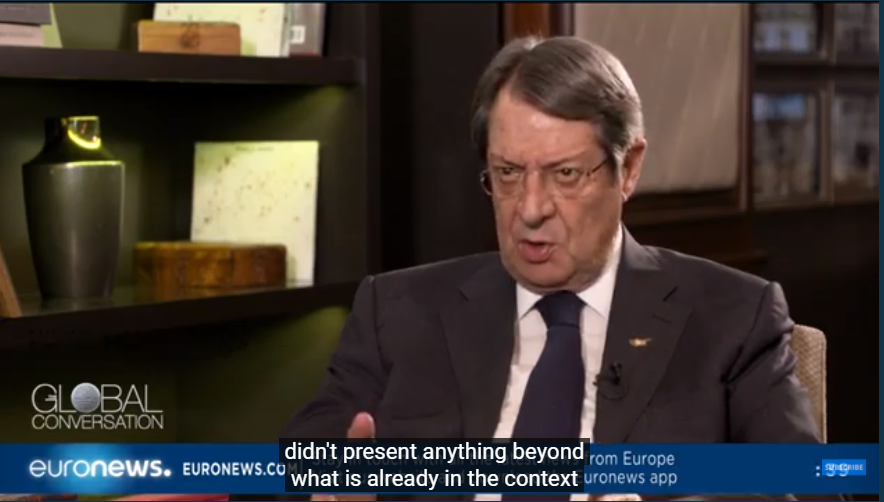FmC8syhh0gSy7KJ0WGTkpG3dFJLLjvRRmSXF/bgAAAZNJREFUpLJ0YS4VRflUlRRSV1pCc2UZHXVVdDfW0dvcQH9rEwNfpq2ZgfZZOpoZ6mxhtKedNSN9bFw1wsbVo6wa7mHFYDdj/V0s7+1geU8Ho93tDHe00tfcwLL6Wlorl0pCV1NcSFXRQioW5lHm97MkK0vK0uXGx+P3+ciKE/vhZoVOZOeE0NktJFqvkjohdrNcS67+msfmzvvvtV8+vyR1VjNJtoCUJUmZNzvJdicpczJnsUl7geOMZgJ7JA3SXjex581j0Evl7XFGoyR4iVYraS4nOfFxFKQlU+rPorIgj/olJbRXV9Df3MBoZ5t0/bvrqinNzSYzzi3NC5dWlNv/e8xlfoX8XcGlDey3E/vvvhYRq14vMbdXb66vGD/388T+TlFtIbaESKgVmCUCmTef3UxWcgKF/myS4zwYVArC5t1IRNA8aYFTK48JCJ1OhVEtRxUTgSxsPuELvkfY/P9kobuW5V0/VnzN/4X9+nW5fl2uz4Hrc+D6HLg+B67Pgetz4PocuD4Hrs+B63Pg/6c58H8Bk5yF4HCpaokAAAAASUVORK5CYII=)

In [ ]:
ls model

In case you ran into the "incompatible with expected resource" issue with a model containing **BatchNormization** layers such as DenseNet, make sure to set the learning phase to 0 before loading the Keras model in a new session.
```
from keras import backend as K
# This line must be executed before loading Keras model.
K.set_learning_phase(0)

```
Then you can load up the model and find the model's input and output tensors' names.


In [ ]:
from keras.models import load_model
model = load_model('./model/keras_Jmodel.h5')
print(model.outputs)

In [ ]:
print(model.inputs)

In [ ]:
model.input_names[0]

In [ ]:
model.output_names[0]

REMINDER
```
print(model.inputs)
print(model.outputs)

model.input_names[0]
model.output_names[0]

```

In [ ]:
!pip show tensorflow

In [ ]:
 pip list | grep tensorflow

https://github.com/philipperemy/keract/issues/128

yanshengjia commented on 19 Dec 2020 •
Had the same issue.
```

```

It turns out a tensorflow dependency problem. get_activations() doesn't work on tf 2.4.0, after I downgrade tf to 2.3.0, it works!

In [ ]:
#! pip install -U --pre tensorflow=='2.3'

In [ ]:
pip list | grep tensorflow

In [ ]:
import tensorflow.python.keras.backend as K

In [ ]:
Jmodel.name

As you can see, our simple model has only single input and output, your model might have multiple inputs/outputs.

We keep track of their names since we are going to locate them by name in the converted TensorFlow graph during inference.

```The first step is to get the computation graph of TensorFlow backend which represents the Keras model, where the forward pass and training related operations are included.```

```Then the graph will be converted to a GraphDef protocol buffer,``` after that **it will be pruned so subgraphs** that are not necessary to compute the requested outputs such as the training operations are removed. ```This step if refer to as freezing the graph.```

REVIEW Later...
```
# https://www.dlology.com/blog/how-to-convert-trained-keras-model-to-tensorflow-and-make-prediction/

#from keras import backend as K
import tensorflow.python.keras.backend as K
import tensorflow as tf

def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    from tensorflow.python.framework.graph_util import convert_variables_to_constants
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        # Graph -> GraphDef ProtoBuf
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = convert_variables_to_constants(session, input_graph_def,
                                                      output_names, freeze_var_names)
        return frozen_graph


frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in Jmodel.outputs])

```

https://medium.com/@sebastingarcaacosta/how-to-export-a-tensorflow-2-x-keras-model-to-a-frozen-and-optimized-graph-39740846d9eb

###**How to export a TensorFlow 2.x Keras model to a ```frozen and optimized graph```**

**Introduction**

When we finish the process of training our model and want it running as fast as possible on different programming languages using OpenCV cross-platform library or serve it on the web or mobile, we must export our model’s graph in the most efficient format possible, this translates into two stages: freezing and optimizing.
The process of freezing a TensorFlow model consist of converting its variables into constants that are stored straight in its graph. On the other hand, the process of optimizing consist of deleting nodes that are only necessary on training stage (such as Dropout layers) or inefficient operations.
This was easy in TensorFlow 1.x because back in that version existed helper functions that do that work for us. Nevertheless, although TensorFlow 2.x still supporting graph freezing through a newer API, I didn’t find any utility to optimize the frozen graph for inference. So, in essence, we will:
Freeze the Keras model using TF 2.x:





#'frozen_graph' is STILL from a CLASSIFIER ```JaybaselineCNN_W40cL6_224VGG/conv2d``` ... We still Need a DETECTOR....!!!! via ```workingOn_bbFACEbin_TurningCNNimgClass-intoObjDetect_KerasTFlowOpenCV.ipynb```  

In [ ]:
#https://medium.com/@sebastingarcaacosta/how-to-export-a-tensorflow-2-x-keras-model-to-a-frozen-and-optimized-graph-39740846d9eb

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
import numpy as np

#path of the directory where you want to save your model
frozen_out_path = ''
# name of the .pb file
frozen_graph_filename = 'frozen_graph'
model = Jmodel   # Your model

# Convert Keras model to ConcreteFunction
full_model = tf.function(lambda x: model(x))
full_model = full_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

  # Once we have our model in the format of ConcreteFunction, we convert its variables to constants.
# Get frozen ConcreteFunction
frozen_func = convert_variables_to_constants_v2(full_model)
frozen_func.graph.as_graph_def()

#We are almost done. If you want to inspect the layers operations inside your frozen graph definition
#and see the name of its input and output tensors (important for the next stage), use this code:
layers = [op.name for op in frozen_func.graph.get_operations()]
print("-" * 60)
print("Frozen model layers: ")
for layer in layers:
    print(layer)
print("-" * 60)
print("Frozen model inputs: ")
print(frozen_func.inputs)
print("Frozen model outputs: ")
print(frozen_func.outputs)

#Then, serialize the frozen graph and its text representation to disk.
# Save frozen graph to disk
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                  logdir=frozen_out_path,
                  name=f"{frozen_graph_filename}.pb",
                  as_text=False)
# Save its text representation
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                  logdir=frozen_out_path,
                  name=f"{frozen_graph_filename}.pbtxt",
                  as_text=True)

In [ ]:
!find . -name 'frozen_graph.pbtxt'

In [ ]:
pathlib.Path('frozen_graph.pbtxt').exists() #File existence check

In [ ]:
os.path.exists('frozen_graph.pbtxt') #File existence independent confirmation

In [ ]:
from google.colab import files
files.download('frozen_graph.pbtxt')

In [ ]:
#ls

In [ ]:
# Load a model imported from Tensorflow
#tfNet = cv2.dnn.readNetFromTensorflow('./frozen_graph.pb', './frozen_graph.pbtxt')
tfNet = cv2.dnn.readNetFromTensorflow('./frozen_graph.pb') #with no config file
tfNet

In [ ]:
#ls

**2. Optimizing the frozen graph for faster inference**

In this stage, we’ll use a helper function in order to optimize the graph for inference available in TensorFlow 1.x, hence, we need to create a virtual environment that contains that version of TensorFlow (I recommend 1.5) using Anaconda (which is quite straightforward).
Note: Don’t use pip and conda to install packages at the same time in one environment. Check Using Pip in a Conda Environment for more info.

https://stackoverflow.com/questions/59409692/return-type-of-net-forward

cv2.dnn.readNetFromTensorflow takes your Protobuf file ```.pb``` and configuration file of your model ```.pbtxt``` **to load your saved model.**

net.forward() - Runs a forward pass to compute the net output.

your detection i.e net.forward() will give Numpy ndarray as output which you can use it to plot box on the given input image.

You can consider the below example.
```
import cv2
# Load a model imported from Tensorflow
tensorflowNet = cv2.dnn.readNetFromTensorflow('frozen_inference_graph.pb', 'graph.pbtxt')
```

In [ ]:
pathlib.Path('hr9trainedJmodel_10pct5epoch_87pt4pctAccrcy')

**Load a TRAINED Model**

In [ ]:
#CRUCIAL Import for Loading  a TRAINED Model
from keras.models import load_model

In [ ]:
#trainedMaDD_model=load_model('hr9trainedJmodel_10pct5epoch_87pt4pctAccrcy')

In [ ]:
#trainedMaDD_model.summary()

oading the weights only
If you prefer to load the weights only, you can use the following code snippet.


import * as tf from '@tensorflow/tfjs';

const weightManifestUrl = "https://example.org/model/weights_manifest.json";

const manifest = await fetch(weightManifestUrl);
this.weightManifest = await manifest.json();
const weightMap = await tf.io.loadWeights(
        this.weightManifest, "https://example.org/model");

In [ ]:
#Loading the weights only
#If you prefer to load the weights only, you can use the following code snippet.


#import * as tf from '@tensorflow/tfjs';

# const weightManifestUrl = "https://example.org/model/weights_manifest.json";

# const manifest = await fetch(weightManifestUrl);
# this.weightManifest = await manifest.json();
# const weightMap = await tf.io.loadWeights(
# this.weightManifest, "https://example.org/model");




####**PREDICTIONs**

reminder

```
#pred.argmax(-1)# or pred.argmax(axis=1) #the reverse of to_categorical

#testY=to_categorical(data)
testY_revCat=np.argmax(testY,axis=1)

```

```
# PREDICTION (pending 'test_ALLdataJay')
from sklearn.metrics import accuracy_score

#y_pred  = Jmodel.predict(testXprep ).argmax(-1)
J_y_pred  = Jmodel.predict(np.array(test_ALLdataJay)).argmax(-1)

#print("Test accuracy " , accuracy_score(testY_revCat , y_pred ))
print("Test accuracy " , accuracy_score(testY_revCat , J_y_pred ))

```

In [ ]:
#pred.argmax(-1)# or pred.argmax(axis=1) #the reverse of to_categorical

In [ ]:
trainALL_y2categ
trainY_revCat=np.argmax(trainALL_y2categ,axis=1)
trainY_revCat, trainY_revCat==trainALL_y

#testY_revCat=np.argmax(testY,axis=1)

In [ ]:
#Reminder #testALL_y2categ=test_to_catego(testALL_y)
len(testALL_y2categ), testALL_y2categ
testY_revCat=np.argmax(testALL_y2categ,axis=1)
len(testY_revCat), testY_revCat, testY_revCat==testALL_y


In [ ]:
len(test_ALLdataJay)

In [ ]:
245#Slice partiton
print("test_ALLdataJaylength is ...", len(test_ALLdataJay) )
startPt=int(input('Please provide the slice Start-Point...'))
print("input startPt is ...", startPt)
sliceRange=int(input('Please provide the slice range...'))
print("input sliceRange is ...", sliceRange)
print("slice length is ...", )

if startPt + sliceRange>len(test_ALLdataJay):
    print('Last index slice Not Available...function closing...sorry!')

endPt = startPt + sliceRange - 1
print("slice last index (endPoint) is ...", endPt)

** Jmodel MASS PREDICTION (pending 'test_ALLdataJay' ... DONE)**
```

from sklearn.metrics import accuracy_score

#y_pred  = Jmodel.predict(testXprep ).argmax(-1)
#J_y_pred  = Jmodel.predict(np.array(test_ALLdataJay)).argmax(-1)

#SLICE PREDICTION

#Slice partiton
print("test_ALLdataJaylength is ...", len(test_ALLdataJay) )
startPt=int(input('Please provide the slice Start-Point...'))
print("input startPt is ...", startPt)
sliceRange=int(input('Please provide the slice range...'))
print("input sliceRange is ...", sliceRange)


if startPt + sliceRange>len(test_ALLdataJay):    
    print('Last index slice Not Available...function closing...sorry!')

endPt = startPt + sliceRange - 1
print("slice last index (endPoint) is ...", endPt)

#Slice Prediction on UnTraine Jmodel
sliceJ_y_pred  = Jmodel.predict(np.array(test_ALLdataJay[startPt:endPt])).argmax(-1)
print('sliceJ_y_pred array is ...',sliceJ_y_pred)
slice_testY_revCat=testY_revCat[startPt:endPt]
print('slice_testY_revCat array is ...', slice_testY_revCat)

#print("Test accuracy " , accuracy_score(testY_revCat , y_pred ))
print("Test accuracy " , accuracy_score(slice_testY_revCat , sliceJ_y_pred ))


```

In [ ]:
# Jmodel MASS PREDICTION (pending 'test_ALLdataJay' ... DONE)
from sklearn.metrics import accuracy_score

#y_pred  = Jmodel.predict(testXprep ).argmax(-1)
#J_y_pred  = Jmodel.predict(np.array(test_ALLdataJay)).argmax(-1)

#SLICE PREDICTION

#Slice partiton
print("test_ALLdataJaylength is ...", len(test_ALLdataJay) )
startPt=int(input('Please provide the slice Start-Point...'))
print("input startPt is ...", startPt)
sliceRange=int(input('Please provide the slice range...'))
print("input sliceRange is ...", sliceRange)


if startPt + sliceRange>len(test_ALLdataJay):
    print('Last index slice Not Available...function closing...sorry!')

endPt = startPt + sliceRange - 1
print("slice last index (endPoint) is ...", endPt)

#Slice Prediction on Trained Jmodel
sliceJ_y_pred  = Jmodel.predict(np.array(test_ALLdataJay[startPt:endPt])).argmax(-1)

print('sliceJ_y_pred array is ...',sliceJ_y_pred)
slice_testY_revCat=testY_revCat[startPt:endPt]
print('slice_testY_revCat array is ...', slice_testY_revCat)
90

#print("Test accuracy " , accuracy_score(testY_revCat , y_pred ))
print("Test accuracy " , accuracy_score(slice_testY_revCat , sliceJ_y_pred ))

In [ ]:
def massPrediction(Jmodel):
  # Jmodel MASS PREDICTION (pending 'test_ALLdataJay' ... DONE)
  from sklearn.metrics import accuracy_score

  #y_pred  = Jmodel.predict(testXprep ).argmax(-1)
  #J_y_pred  = Jmodel.predict(np.array(test_ALLdataJay)).argmax(-1)

  #SLICE PREDICTION

  #Slice partiton
  print("test_ALLdataJaylength is ...", len(test_ALLdataJay) )
  startPt=int(input('Please provide the slice Start-Point...'))
  print("input startPt is ...", startPt)
  sliceRange=int(input('Please provide the slice range...'))
  print("input sliceRange is ...", sliceRange)


  if startPt + sliceRange<=len(test_ALLdataJay):
    endPt = startPt + sliceRange - 1
    print("slice last index (endPoint) is ...", endPt)

    #Slice Prediction on UnTraine Jmodel
    sliceJ_y_pred  = Jmodel.predict(np.array(test_ALLdataJay[startPt:endPt])).argmax(-1)
    print('sliceJ_y_pred array is ...',sliceJ_y_pred)
    slice_testY_revCat=testY_revCat[startPt:endPt]
    print('slice_testY_revCat array is ...', slice_testY_revCat)

    #print("Test accuracy " , accuracy_score(testY_revCat , y_pred ))
    print("Test accuracy " , accuracy_score(slice_testY_revCat , sliceJ_y_pred ))

  else:
    print('Last index slice Not Available...function closing...sorry!')
  return  slice_testY_revCat , sliceJ_y_pred

In [ ]:
slice_testY_revCat , sliceJ_y_pred=massPrediction(Jmodel)

In [ ]:
len(slice_testY_revCat), slice_testY_revCat
#test_ALLdataJay.value_counts()

In [ ]:
len(set(slice_testY_revCat)), set(slice_testY_revCat) #Confirmation of all classes appearance

In [ ]:
mergedTEST_INTEL_FFHQ_df.test_classCateg.value_counts()

In [ ]:
mergedTEST_INTEL_FFHQ_df.columns

In [ ]:
mergedTEST_INTEL_FFHQ_df.test_classCateg

In [ ]:
mergedTEST_INTEL_FFHQ_df.test_SubCateg.value_counts()

In [ ]:
mergedTEST_INTEL_FFHQ_df

In [ ]:
#mergedTEST_INTEL_FFHQ_df.test_classCateg

In [ ]:
Jmodel

In [ ]:
(testY_revCat), testY_revCat

In [ ]:
len(testY_revCat[startPt:endPt]), testY_revCat[startPt:endPt]

**Probability Predictions**

Another type of prediction you may wish to make is the probability of the data instance belonging to each class.

This is called a probability prediction where, given a new instance, the model returns the probability for each outcome class as a value between 0 and 1.

You can make these types of predictions in Keras by calling the predict_proba() function; for example:

In [ ]:
image.shape

In [ ]:
def prepaReshape(image):
    imageSize = 224
    #imageArray = cv2.imread(filePath)
    #newImageArray = cv2.resize(image, (imageSize, imageSize))
    #return newImageArray.reshape(-1, imageSize, imageSize, 3)
    return image.reshape(-1, imageSize, imageSize, 3)

In [ ]:
newImg=prepaReshape(image)
newImg.shape

In [ ]:
Jmodel.predict_proba(newImg)

#REMINDER
```
def prepaReshape(image):
    imageSize = 224
    return image.reshape(-1, imageSize, imageSize, 3)

```

```
newImg=prepaReshape(image)
newImg.shape

Jmodel.predict(newImg)  #Probability prediction (regression)

np.argmax(Jmodel.predict(newImg), axis=-1)[0] # Classes prediction (Classification)
```
```
newImg=prepaReshape(image)
newImg.shape

Jmodel.predict(newImg) # probability prediction

np.argmax(Jmodel.predict(newImg), axis=-1)[0] #
```

In [ ]:
Jmodel.predict(newImg) # probability prediction

In [ ]:
Jmodel.predict_classes(newImg)
#/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:
#`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
#OUTPUT array([6])

In [ ]:
np.argmax(Jmodel.predict(newImg), axis=-1)[0] #

**In the case of a two-class (binary)** classification problem, the **sigmoid activation** function is often used in the output layer. The predicted probability is taken as the likelihood of the observation belonging to class 1, or inverted (1 – probability) to give the probability for class 0.

In the case of a **multi-class** classification problem, the **softmax activatio**n function is often used on the output layer and the likelihood of the observation for each class is returned as a vector.

The example below makes a probability prediction for each example in the Xnew array of data instance.

In [ ]:
#EXAMPLE making new probability predictions for a classification problem
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
scalar = MinMaxScaler()
scalar.fit(X)
X = scalar.transform(X)
# define and fit the final model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X, y, epochs=500, verbose=0)
# new instances where we do not know the answer
Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=2, random_state=1)
Xnew = scalar.transform(Xnew)
# make a prediction
ynew = model.predict_proba(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

In [ ]:
ls

In [ ]:
image.shape

In [ ]:
image
cv2_imshow(image)

In [ ]:
#image = cv2.imread(imagePaths[0])
resized = cv2.resize(image, (224, 224))
blob = cv2.dnn.blobFromImage(resized, 1, (224, 224), (104, 117, 123))
print("First Blob: {}".format(blob.shape))

In [ ]:
#trainedMaDD_model

In [ ]:
#


```
newImg=prepaReshape(image)
newImg.shape

Jmodel.predict(newImg) # probability prediction

np.argmax(Jmodel.predict(newImg), axis=-1)[0] #
```

In [ ]:
#newImg
np.argsort

In [ ]:
!pip install keract

###**simple-object-tracking**

https://www.pyimagesearch.com/2018/07/23/simple-object-tracking-with-opencv/

Our pyimagesearch module is not pip-installable — it is included with today’s “Downloads” (which you’ll find at the bottom of this post). Inside you’ll find the centroidtracker.py file which contains the CentroidTracker class.

The CentroidTracker class is an important component used in the object_tracker.py driver script.

The remaining .prototxt and .caffemodel files are part of the OpenCV deep learning face detector. They are necessary for today’s face detection + tracking method, but you could easily use another form of detection (more on that later).

Be sure that you have NumPy, SciPy, and imutils installed before you proceed:

In [ ]:
from google.colab import files
files.upload()
#simple-object-tracking.zip
#from C:\Users\JayMnM\LOCAL_GgleDrv\DataSc\selfTUTORIALs\ImgVdo_jayTUTOR_ARosebrook\4Colab

In [ ]:
!ls

In [ ]:
pwd

In [ ]:
!unzip simple-object-tracking.zip

In [ ]:
ls

In [ ]:
ls simple-object-tracking/

In [ ]:
pwd

In [ ]:
from google.colab import files
files.upload()
  #-1 aa_mixkit-subway-entrance-in-a-pedestrian-zone-4154.mp4

# Fetch ONLY th(is)ese file(s)...
  #-2 mCHAN2021JanLIONS_VID20210120WA0003_1.mp4
  #-3 switcher.py
#from C:\Users\JayMnM\LOCAL_GgleDrv\DataSc\BigDataTech_UoB\colabDisserto_OpenCV

In [ ]:
ls

In [ ]:
!ls ./simple-object-tracking/pyimagesearch
#centroidtracker.py  __init__.py files expected

### Moving Files to /content/simple-object-tracking

In [ ]:
mv mCHAN2021JanLIONS_VID20210120WA0003_1.mp4 simple-object-tracking/

In [ ]:
!mv switcher.py simple-object-tracking
#mv aa_mixkit-subway-entrance-in-a-pedestrian-zone-4154.mp4 simple-object-tracking

In [ ]:
ls ./simple-object-tracking

In [ ]:
pwd

In [ ]:
import os
os.environ

In [ ]:
curr=os.environ['PYTHONPATH']
curr

In [ ]:
curr='/env/python'
curr

In [ ]:
#pathlib.Path('simple-object-tracking')

In [ ]:
#curr +=': ./simple-object-tracking/'

In [ ]:
#curr

In [ ]:
cd ./simple-object-tracking/

In [ ]:
from pyimagesearch.centroidtracker import CentroidTracker

In [ ]:
image.shape

Miscellaneous Transformations on images

In [ ]:
cv2_imshow(image)

In [ ]:
 (H, W) = np.array(image).shape[:2]
 JMblob = cv2.dnn.blobFromImage(image, 1.0, (W, H),(104.0, 177.0, 123.0))
#(H, W,JMblob)

In [ ]:
JMblob.shape

In [ ]:
img2show=JMblob.reshape(-1,224,224)
#img2show
img2show.shape

In [ ]:
image.shape

In [ ]:
#prepaReshape TO USE FOR pREDICTIOn....
imgPrepa=prepaReshape(image)
imgPrepa.shape

In [ ]:
imgPrepa.reshape(-1)

In [ ]:
imgPrepa[0].shape

In [ ]:

cv2_imshow(imgPrepa[0])

#REMINDER_bis
```
def prepaReshape(image):
    imageSize = 224
    return image.reshape(-1, imageSize, imageSize, 3)

```

```
newImg=prepaReshape(image)
newImg.shape

Jmodel.predict(newImg)  #Probability prediction (regression)

np.argmax(Jmodel.predict(newImg), axis=-1)[0] # Classes prediction (Classification)
```
```
newImg=prepaReshape(image)
newImg.shape

Jmodel.predict(newImg) # probability prediction

np.argmax(Jmodel.predict(newImg), axis=-1)[0] #
```

In [ ]:
#channel_last reinstaured..
img2show_last=img2show.reshape(224,224,3)
#img2show_last
img2show_last.shape

In [ ]:
cv2_imshow(img2show_last) #COOL Magic...

In [ ]:
#img2show_Ch = cv2.cvtColor(img2show, cv2.COLOR_BGR2RGB)

from keras import backend as K
K.image_data_format()

```
# extract the image from the testData if using "channels_first"
	# ordering # (I_line100-105)
      if (K.image_data_format() == "channels_first"):
        image = (testXprep[i][0] * 255).astype("uint8")
    
       # otherwise we are using "channels_last" ordering
      else:
        image = (testXprep[i] * 255).astype("uint8")

```

In [ ]:
from keras import backend as K
K.image_data_format()

In [ ]:
#detections = net.forward() #CRUCIAL Part to yield with my CNN too...!!!...being DONE via Frozen_Graph & Inference_Optimization
nvoImg=prepaReshape(JMblob)
predictProb = Jmodel.predict(nvoImg)
predictProb.shape

In [ ]:
predictProb

###**Gr8WALL...** ...

https://github.com/opencv/opencv/issues/16991

@vinicius121, looks like .pb and .h5 just are different models. **Please try to convert .h5 to .pb** once again using this script:

```
import tensorflow as tf
import numpy as np
import cv2 as cv
from tensorflow import keras as K
print(K.__version__)

# Convert Keras .h5 to TensorFlow .pb
model = K.models.load_model('kerasTF.h5')
sess = K.backend.get_session()
sess.as_default()

graph_def = sess.graph.as_graph_def()
graph_def = tf.graph_util.convert_variables_to_constants(sess, graph_def, ['output_node/Softmax'])

with tf.gfile.FastGFile('kerasTF.pb', 'wb') as f:
   f.write(graph_def.SerializeToString())

# Run Keras
image = cv.imread('example.png')

kerasInp = cv.resize(image, (15, 32))
kerasInp = cv.cvtColor(kerasInp, cv.COLOR_BGR2RGB)
data = []
data.append(kerasInp)
kerasOut = model.predict(np.expand_dims(data[0]/255, axis=0))

# Run OpenCV
net = cv.dnn.readNet('kerasTF.pb')
blob = cv.dnn.blobFromImage(image, scalefactor=1.0/255, mean=(0, 0, 0),size=(15, 32), swapRB=True)
net.setInput(blob)
cvOut = net.forward()

# Compare
print(cvOut.shape)
print(kerasOut.shape)
print(np.max(np.abs(cvOut - kerasOut)))


```




Convert model Keras .h5 to TensorFlow .pb ...CRUCIAL...REAL TURNING-POINT!!!
https://github.com/opencv/opencv/issues/16991 ...FIXED ABOVE...via Frozen_Graph ...and ```tfNet``` yielded.

In [ ]:
#CRUCIAL Import for Loading  a TRAINED Model
#from keras.models import load_model

In [ ]:
#Load model
#trainedMaDD_model=load_model('hr9trainedJmodel_10pct5epoch_87pt4pctAccrcy')

###**Tackling Issue**
AttributeError: module 'tensorflow.keras.backend' has no attribute 'get_session'
https://stackoverflow.com/questions/62000139/r-keras-error-in-k-get-session-no-attribute-get-session

which version of Keras and TensorFlow do you have installed?

I think the issue here is that you are using tensorflow v2, while the get_session function is supported for version v1.

This should enable the v1 of tensorflow:
```
library(tensorflow)
use_compat("v1")

```

In [ ]:
!pip show tensorflow

In [ ]:
!pip install -U --pre tensorflow=='1.*'

In [ ]:
!pip show tensorflow


https://stackoverflow.com/questions/58255821/how-to-use-k-get-session-in-tensorflow-2-0-or-how-to-migrate-it

You can use it with tf1 compatible interface:

```
sess = tf.compat.v1.keras.backend.get_session()
```
Or import tenforflow backend with internal path:

```
import tensorflow.python.keras.backend as K
sess = K.get_session()
```

In [ ]:
import tensorflow.python.keras.backend as K
sess = K.get_session()

In [ ]:
!pip show tensorflow

https://stackoverflow.com/questions/55299995/exporting-a-frozen-graph-pb-file-in-tensorflow-2

##**Importing a Keras model into TensorFlow.js**
https://www.tensorflow.org/js/tutorials/conversion/import_keras

![](https://www.tensorflow.org/js/tutorials/conversion/import_keras#alternative_use_the_python_api_to_export_directly_to_tfjs_layers_format)
Keras models (typically created via the Python API) may be saved in one of several formats. The "whole model" format can be converted to TensorFlow.js Layers format, which can be loaded directly into TensorFlow.js for inference or for further training.

The target TensorFlow.js Layers format is a directory containing a model.json file and a set of sharded weight files in binary format. The model.json file contains both the model topology (aka "architecture" or "graph": a description of the layers and how they are connected) and a manifest of the weight files.

Requirements
The conversion procedure requires a Python environment; you may want to keep an isolated one using pipenv or virtualenv. **To install the converter, use ```pip install tensorflowjs.```**

Importing a Keras model into TensorFlow.js is a two-step process. First, convert an existing Keras model to TF.js Layers format, and then load it into TensorFlow.js.


In [ ]:
#Converter installation
#!pip install tensorflowjs
#import tensorflowjs as tfjs

**Step 1. Convert an existing Keras model to TF.js Layers format**
Keras models are usually saved via model.save(filepath), which produces a single HDF5 (.h5) file containing both the model topology and the weights. To convert such a file to TF.js Layers format, run the following command, where path/to/my_model.h5 is the source Keras .h5 file and path/to/tfjs_target_dir is the target output directory for the TF.js files:
```
#bash
```
Alternative: Use the Python API to export directly to TF.js Layers format
If you have a Keras model in Python, you can export it directly to the TensorFlow.js Layers format as follows:

```
# Python

import tensorflowjs as tfjs

def train(...):
    model = keras.models.Sequential()   # for example
    ...
    model.compile(...)
    model.fit(...)
    tfjs.converters.save_keras_model(model, tfjs_target_dir)
```






menunu ...

In [ ]:
Jmodel

In [ ]:
Jmodel.summary()

**Keras to TensorFlow .pb file**
When you have trained a Keras model, ```it is a good practice to save it as a single HDF5``` file first so you can load it back later after training.

```
import os
os.makedirs('./model', exist_ok=True)
model.save('./model/keras_Jmodel.h5')

```
```
ls model

```
```
from keras.models import load_model
model = load_model('./model/keras_Jmodel.h5')
print(model.outputs)

```


In [ ]:
ls model/

In [ ]:
#!whereis Jmodel
!whereis 'keras_Jmodel.h5'

In [ ]:
#!find . -name 'frozen_graph.pbtxt'

In [ ]:
#!find . -name 'frozen_graph.pbtxt'
!find  -name 'keras_Jmodel.h5'

In [ ]:
!pathlib.Path(keras_Jmodel.h5)

In [ ]:
import tensorflow as tf
import numpy as np
import cv2 as cv

from tensorflow import keras as K_front
print(K_front.__version__)

import tensorflow.python.keras.backend as K_back

from tensorflow.python.keras.backend import get_session

# Convert Keras .h5 to TensorFlow .pb ...CRUCIAL
#model = K_front.models.load_model('hr9trainedJmodel_10pct5epoch_87pt4pctAccrcy')
model = K_front.models.load_model('./model/keras_Jmodel.h5') # string File path expected ...not Sequential model itself
#sess = K.backend.get_session()
#sess=K_back.get_session()
sess=get_session()
sess.as_default()

graph_def = sess.graph.as_graph_def()
#graph_def = tf.graph_util.convert_variables_to_constants(sess, graph_def, ['output_node/Softmax'])
graph_def = tf.compat.v1.graph_util.convert_variables_to_constants(sess, graph_def, ['output_node/Softmax']) #output_node_names

with tf.gfile.FastGFile('kerasTF.pb', 'wb') as f:
   f.write(graph_def.SerializeToString())

In [ ]:
Jmodel

In [ ]:
from tensorflow import keras as K
print(K.__version__)

In [ ]:
print(K.__version__)

*ReSumption*

In [ ]:
 tfNet.setInput(JMblob) # our tfNet

In [ ]:
detections = tfNet.forward()
detections.shape

In [ ]:
detections

###**net**

In [ ]:
prototxt='deploy.prototxt'
model='res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt,model)

good synthesis...
https://becominghuman.ai/face-detection-with-opencv-and-deep-learning-90b84735f421

In [ ]:
net.setInput(JMblob)
netDetections=net.forward()
netDetections

In [ ]:
netDetections.shape

   ```
    #REMINDER
      # prototxt='deploy.prototxt'
      # model='res10_300x300_ssd_iter_140000.caffemodel'
      # net = cv2.dnn.readNetFromCaffe(prototxt,model)
  ```

In [ ]:
#USe our tfNet HERE ....
tfNet.setInput(JMblob)
tfNetDetections=tfNet.forward()
tfNetDetections

In [ ]:
tfNetDetections.shape

In [ ]:
tfNetDetections[0][0].shape

In [ ]:
column_labels = ["img_id", "is_face", "confidence", "left", "top", "right", "bottom"]
detections_df = pd.DataFrame(tfNetDetections[0][0], columns = column_labels)
detections_df

In [ ]:
#0: background, 1: face
detections_df.query('is_face== 1' and 'confidence>=0.10')
#detections_df

#good illustration...
https://sefiks.com/2020/08/25/deep-face-detection-with-opencv-in-python/

```Feature is_face will be 0 for background and it will be 1 for face instances.``` That’s why, we will ignore the zero values. We will also ignore the instances having a confidence value less than a threshold value (e.g. 90%). [sefiks.com](https://sefiks.com/2020/08/25/deep-face-detection-with-opencv-in-python/)


In [ ]:
#0: background, 1: face
detections_df = detections_df[detections_df['is_face'] == 1]
detections_df

In [ ]:
detections_df = detections_df[detections_df['confidence']>=0.90]
detections_df

In [ ]:
# We should multiple those coordinate values to 300 to find the exact location in resized image.
detections_df['left'] = (detections_df['left'] * 300).astype(int)
detections_df['bottom'] = (detections_df['bottom'] * 300).astype(int)
detections_df['right'] = (detections_df['right'] * 300).astype(int)
detections_df['top'] = (detections_df['top'] * 300).astype(int)

In [ ]:
detections_df

In [ ]:
#image = cv2.imread("image.jpg")
image.shape


In [ ]:

base_img = image.copy()
original_size = base_img.shape
target_size = (300, 300)
image = cv2.resize(image, target_size)
aspect_ratio_x = (original_size[1] / target_size[1])
aspect_ratio_y = (original_size[0] / target_size[0])

In [ ]:
#Plotting
#We can extract the detected face area from the base image.
for i, instance in detections_df.iterrows():
  confidence_score = str(round(100*instance["confidence"], 2))+" %"
  left = instance["left"]; right = instance["right"]
  bottom = instance["bottom"]; top = instance["top"]
  detected_face = base_img[int(top*aspect_ratio_y):int(bottom*aspect_ratio_y) ,
  int(left*aspect_ratio_x):int(right*aspect_ratio_x)]
  #print("Id ",i,". Confidence: ", confidence_score)
  plt.imshow(detected_face[:,:,::-1])
  plt.show()

In [ ]:
# REFERENCE
def JM_processFrames(jayframe):

    #from tqdm import tqdm
    from pyimagesearch.centroidtracker import CentroidTracker
  # initialize our centroid tracker and frame dimensions
    ct = CentroidTracker()
    (H, W) = (None, None)
    count_frame=0

    #assert not isinstance(jayframe,type(None)), 'frame not found'
    #jayframe = imutils.resize(jayframe, width=300)

    # if the frame dimensions are None, grab them

    if W is None or H is None:
      (H, W) = np.array(jayframe).shape[:2]

    # construct a blob from the frame, pass it through the network,
	  # obtain our output predictions, and initialize the list of
	  # bounding box rectangles

    JMblob = cv2.dnn.blobFromImage(jayframe, 1.0, (W, H),(104.0, 177.0, 123.0))
        #blob = cv2.dnn.blobFromImage(image, scalefactor=1.0 (or 1/std), size, mean, swapRB=True)

    #[blobFromImage] creates 4-dimensional blob from image.
    #Optionally resizes and crops image from center, subtract mean values,
    #scales values by scalefactor, swap Blue and Red channels.

    #REMINDER
      # prototxt='deploy.prototxt'
      # model='res10_300x300_ssd_iter_140000.caffemodel'
      # net = cv2.dnn.readNetFromCaffe(prototxt,model)

    #net.setInput(blob)
    tfNet.setInput(JMblob)
    #detections = net.forward() #CRUCIAL Part to yield with my CNN too...DONE!!!
    detections = tfNet.forward()

    #nvoImg=prepaReshape(JMblob)
    #predictProb = Jmodel.predict(nvoImg)

    rects = []
    confid=0.5

    # loop over the detections
    #for i in tqdm(range(0, detections.shape[2])):
    for i in range(0, detections.shape[2]):
      #if (predictProb > confid):
      if (detections[0, 0, i, 2] > confid):
        #FIX this...Serious...<detections> provides (prob, box_dimensions+scales)... while <predictProb> gives only Prob or Class...!!!!
        #box = detections[0, 0, i, 3:7]*np.array([W, H, W, H])
        box = predictProb*np.array([W, H, W, H])
        rects.append(box.astype("int"))
        (startX, startY, endX, endY) = box.astype("int")
        cv2.rectangle(jayframe, (startX, startY), (endX, endY),(0, 255, 0), 2)

    objects = ct.update(rects)

    #print(objects.items)

    # loop over the tracked objects

    for (objectID, centroid) in objects.items():
      text = "ID {}".format(objectID)
      cv2.putText(jayframe, text, (centroid[0] - 10, centroid[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
      cv2.circle(jayframe, (centroid[0], centroid[1]), 4, (0, 255, 0), -1)

       #Method Main ACTION
         # save the image to the specified file
      cv2.imwrite('framesJay/'+'frame{}_{}'.format(str(count_frame),objectID)+'.png', jayframe)
      count_frame=count_frame + 1

    key = cv2.waitKey(1) & 0xFF

    return key, count_frame, jayframe



In [ ]:
JM_processFrames(image)

```
# set the input to the pre-trained deep learning network and obtain
# the output predicted probabilities for each of the #classes
net.setInput(blob)
preds = net.forward()
# sort the probabilities (in descending) order, grab the index of the
# top predicted label, and draw it on the input image
idx = np.argsort(preds[0])[::-1][0]
text = "Label: {}, {:.2f}%".format(classes[idx],
	preds[0][idx] * 100)
cv2.putText(image, text, (5, 25),  cv2.FONT_HERSHEY_SIMPLEX,
	0.7, (0, 0, 255), 2)
# show the output image
cv2.imshow("Image", image)
cv2.waitKey(0)

```

In [ ]:
# set the input to the pre-trained deep learning network and obtain
# the output predicted probabilities for each of the 1,000 ImageNet
# classes

#net.setInput(blob)
#preds = net.forward()

trainedMaDD_model.signatures




# sort the probabilities (in descending) order, grab the index of the
# top predicted label, and draw it on the input image
idx = np.argsort(preds[0])[::-1][0]
text = "Label: {}, {:.2f}%".format(classes[idx],
	preds[0][idx] * 100)
cv2.putText(image, text, (5, 25),  cv2.FONT_HERSHEY_SIMPLEX,
	0.7, (0, 0, 255), 2)
# show the output image
cv2.imshow("Image", image)
cv2.waitKey(0)

https://stackoverflow.com/questions/41711190/keras-how-to-get-the-output-of-each-layer
###**Keras, How to get the output of each layer?**
Asked 4 years, 3 months ago
Active today
Viewed 215k times

<8>
I wrote this function for myself (in Jupyter) and it was inspired by indraforyou's answer. It will plot all the layer outputs automatically. Your images must have a (x, y, 1) shape where 1 stands for 1 channel. You just call plot_layer_outputs(...) to plot.

```


```


###**View REPORT & PREDICTIONs**

####Step_6a: **view Report**

reminder
```
view_report()
```

REMINDER

```
SubCateg_arr= np.array(mergedTRAIN_INTEL_FFHQ_df.SubCateg)
SubCateg_arr, len(SubCateg_arr)

set(SubCateg_arr), len(set(SubCateg_arr))

SubCateg_dictRev={k:v for v,k in enumerate(set(SubCateg_arr))}
SubCateg_dictRev

mergedTRAIN_INTEL_FFHQ_df['classCateg']=mergedTRAIN_INTEL_FFHQ_df['SubCateg'].apply(lambda x:SubCateg_dictRev[x])

```

In [ ]:
mergedTRAIN_INTEL_FFHQ_df.head

In [ ]:
SubCateg_dictRev
#print(SubCateg_dictRev)

In [ ]:
len(testALL_y2categ), testALL_y2categ

In [ ]:
len(J_y_pred), J_y_pred

**Crucial REMINDER**
```
def summarize_diagnostics(eNum,hist):
    
    plt.figure(figsize=(18,12))

    # plot loss
    pyplot.subplot(221)
    pyplot.title('model %s Cross Entropy Loss'%Jmodel.name)
    pyplot.plot(hist.history['loss'], color='blue', label='Train')
    pyplot.plot(hist.history['val_loss'], color='orange', label='Validation')
    plt.legend()
    print('eNum= ', eNum)
    #print('CrossEntropLoss ticks range is ',[i for i in range(eNum +1)])
    plt.xticks([i for i in range(eNum+1)])
    plt.xlabel('epochs')
    plt.ylabel('loss')

    # plot accuracy
    pyplot.subplot(222)
    pyplot.title('model %s Classification Accuracy'%Jmodel.name)
    pyplot.plot(hist.history['accuracy'], color='blue', label='Train')
    pyplot.plot(hist.history['val_accuracy'], color='orange', label='Validation')
    plt.legend()

    print('val_split is : {:.3f}'.format(val_split))
    # NUMPY np.array TRANSFORMATION POWER
    print('Validation batch size : %s ' %int(len(np_train_ALLdataJay)*val_split))
    print('Train batch size : %d ' %(len(np_train_ALLdataJay)*(1-val_split)))    

    #print('Accuracy ticks range is ',[i for i in range(eNum+1)])
    plt.xticks([i for i in range(eNum+1)])
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.show()
    
    # save plot to file
    #filename = sys.argv[0].split('/')[-1]
    #pyplot.savefig(filename + '_plot.png')
    #pyplot.close()


```

**XTRA_Step_5:** ***evaluate model & plot***

```
# evaluate model
from keras_tqdm import TQDMNotebookCallback
_, acc = model.evaluate(testXprep, testY, verbose=1, callbacks=[TQDMNotebookCallback()])
#print('model %s performance is above...> %.2f' % (_,acc * 100.0))
print('model {} performance is above...> {:.2f}%' .format(model.name,acc * 100.0))
```


```
#fig=px.line(dfHist,text=['train','test'], x=df.index ,width=600, height=400, line_shape="spline")
plt.figure(figsize=(10,4))
plt.title('Cross Entropy Loss')

plt.plot(hist.history['loss'], color='blue', label='train')
plt.plot(hist.history['val_loss'], color='orange', label='test')#
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
#plt.xticks([i/10 for i in range(eNum*10+1)])
#plt.xticks()
plt.show()
```




crucial REMINDER

```
val_split=0.2 #% of Training data versus Validation one.
#train_dataJay
  #train_y2categ=train_to_catego(train_y)

try:
  eNum=int(input('Please INPUT the desired number of epochs:'))
except ValueError:
  print('invalid entry!!...process aborted...sorry...!')
    #exit

#hist = Jay_baseline_CNN36_224VGGnet().fit(np.array(train_ALLdataJay), trainALL_y2categ, epochs=eNum, batch_size=64, verbose=1,
                 #callbacks=[CustomCallback()]
                  #)
#Jmodel =keras.Sequential(name='Jmodel') # Our model  is initialized using the Sequential  API
Jmodel=Jay_baseline_CNN36_224VGGnet()
print("Number of weights after calling the model:", len(Jmodel.weights))
hist = Jmodel.fit(np.array(train_ALLdataJay), trainALL_y2categ, epochs=eNum, batch_size=64, validation_split=val_split, verbose=1,
                 #callbacks=[CustomCallback()]
                  )


````

In [ ]:
# show a nicely formatted classification report (learning curve)
def view_report(SubCateg_dictRev,Jmodel, eNum, hist):

  ##dictionary of labels
  print(SubCateg_dictRev)
  print('[INFO] evaluating network...')
  print(classification_report(testALL_y2categ.argmax(axis=1), J_y_pred,	target_names=SubCateg_dictRev))
  #print(classification_report(y_true=np.argmax(testY), y_pred=np.argmax(y_pred))) # target_names=labelNames

  # plot the training loss and accuracy
  N=eNum # made dynamic input # N = NUM_EPOCHS
  #plt.figure(figsize=(12,8))
	#pyplot.subplot(221)
  plt.style.use("ggplot")
  plt.figure(figsize=(18,12))

   # plot loss
  pyplot.subplot(221)
  pyplot.title('model %s Cross Entropy Loss'%Jmodel.name)
  plt.plot(np.arange(0, N), hist.history["loss"],'bo--', label="train_loss")
  plt.plot(np.arange(0, N), hist.history["val_loss"],'ro--', label="validation_loss")

  plt.title("Training Loss and on Dataset with model %s"%Jmodel.name)
  plt.xlabel("Epoch #")
  plt.ylabel('Loss')
  print('eNum= ',eNum) #epoch cardinal
  #plt.xticks([i in range(eNum)])
  plt.legend(loc='upper right') #"lower left"
  #print('ticks range is ',[i for i in range(eNum+1)])
  plt.xticks([i for i in range(eNum)])

  #plt.yticks([j for j in hist.history["val_accuracy"]]) #Steps to FIX...
  #plt.savefig("baselineCNN3VGG_plot.png")


    #plt.legend()
    #print('eNum= ', eNum)
    #print('CrossEntropLoss ticks range is ',[i for i in range(eNum +1)])
    #plt.xticks([i for i in range(eNum+1)])
    #plt.xlabel('epochs')
    #plt.ylabel('loss')

    # plot accuracy
  pyplot.subplot(222)
  pyplot.title('model %s Classification Accuracy'%Jmodel.name)
  plt.plot(np.arange(0, N), hist.history["accuracy"],'b',  label="train_acc")
  plt.plot(np.arange(0, N), hist.history["val_accuracy"],'r', label="validation_acc")
  #plt.legend()

  plt.xlabel("Epoch #")
  #plt.xticks([i in range(eNum)])
  plt.ylabel("Accuracy")
  plt.legend(loc='lower right') #"lower left"
  #print('ticks range is ',[i for i in range(eNum+1)])
  plt.xticks([i for i in range(eNum)])
  plt.yticks([j for j in hist.history["val_accuracy"]]) #Steps to FIX...
  #plt.savefig("baselineCNN3VGG_plot.png")

  #plt.show()

	#print(hist.history)

In [ ]:
eNum #epoch cardinal

In [ ]:
hist.history["accuracy"] , hist.history["val_accuracy"]

In [ ]:
#Step_6a: view Report
print ('this a Report View')
view_report(SubCateg_dictRev,Jmodel, eNum, hist)

####Step_6b: **view Predictions**

reminder
```
view_NORMALised_prediction()
```
```
view_prediction()
```


```

# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model #CRUCIAL

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample_image.png')
	# load model
	model = load_model('final_model.h5')
	# predict the class
	result = model.predict_classes(img)
	print(result[0])

# entry point, run the example
run_example()

```

In [ ]:
def view_NORMALised_prediction(modelJoem,testXprep,testY):
  from keras import backend as K
  from tqdm import tqdm #jayAdd for progress bar taqaduma('I love U so much')

  #trying to view predicted names of randomly selected images from data
  imgNum=int(input('Please INPUT the amount of images for prediction (no more than 60) to randomly display:'))
  if imgNum>60:
    print('Large number exceeding 60...function closing...sorry!')

  else:
    # initialize our list of output images
    images = []
    #jayAdd for evaluation metrics
    testYtrack=[]
    predsTrack=[]
    failure=0
    # randomly select a few testing items

    for i in tqdm(np.random.choice(np.arange(0, len(testY)), size=(imgNum,))):
      # classify the object
      probs = modelJoem().predict(testXprep[np.newaxis, i])
      prediction = probs.argmax(axis=1)
      #label = labelNames[prediction[0]]
      label=classes[prediction[0]]

  # extract the image from the testData if using "channels_first"
	# ordering # (I_line100-105)
      if (K.image_data_format() == "channels_first"):
        image = (testXprep[i][0] * 255).astype("uint8")

       # otherwise we are using "channels_last" ordering
      else:
        image = (testXprep[i] * 255).astype("uint8")

    # initialize the text label color as green (correct)
      color = (0, 255, 0)

    # otherwise, the class label prediction is incorrect
      if prediction[0]!= np.argmax(testY[i]):
        color=(0,0,255)
        failure+=1
      # merge the channels into one image and resize the image from
    	# 32x32 to 96x96 so we can better see it and then draw the
	    # predicted label on the image

      label_str=str(classes[prediction[0]])
      #label_str=str(labelNames[prediction[0]]) # cast to string to avoid...SystemError:
      # <built-in function putText> returned NULL without setting an error

      image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
      #cv2.putText(image, labelNames, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75,color, 2)
      cv2.putText(image, label_str, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50,color, 2)
      # add the image to our list of output images
      images.append(image)

      #JayAdd: test data and prediction tracking
      predsTrack.append(prediction[0])
      testYtrack.append(np.argmax(testY[i]))
      success=imgNum-failure
      successRate=(imgNum-failure)*100/imgNum

     # construct the montage for the images
      canvasWidth=0 # initializing the width of the canvas, while the height is set to 4
      if imgNum%6==0:
        canvasWidth=imgNum//6
      else:
        canvasWidth=imgNum//6 +1

      montage = build_montages(images, (96, 96), (canvasWidth, 6))[0]


    # show the output montage
    print('Successful Guess in GREEN & Failed guess in RED...')
    print(' ...GOOD guess: {} ...Bad Guess: {}...with a success rate of: {:.2f}%'.format(success,failure,successRate))
    from google.colab.patches import cv2_imshow
    cv2_imshow(montage)
    cv2.waitKey(0)

In [ ]:
#Reminder #Jmodel=Jay_baseline_CNN36_224VGGnet()
Jmodel

In [ ]:
np.array(test_ALLdataJay).shape #Cast to POWERFUL Numpy

In [ ]:
probs = Jmodel.predict(np.array(test_ALLdataJay)[np.newaxis, i]) #EUREKA....EVRIKA....thanks to POWERFUL NumPy
probs

In [ ]:
#REMINDER
#classes={v:k for v,k in enumerate(set(SubCategTEST_arr))}
#classes  ##COOL
classes[1]

In [ ]:
def view_prediction(modelJoem, test_X, testY):
  from keras import backend as K
  from tqdm import tqdm #jayAdd for progress bar taqaduma('I love U so much')

  #trying to view predicted names of randomly selected images from data
  imgNum=int(input('Please INPUT the amount of images for prediction (no more than 60) to randomly display:'))
  if imgNum>60:
    print('Large number exceeding 60...function closing...sorry!')

  else:
    # initialize our list of output images
    images = []
    #jayAdd for evaluation metrics
    testYtrack=[]
    predsTrack=[]
    failure=0
    # randomly select a few testing items

    for i in tqdm(np.random.choice(np.arange(0, len(testY)), size=(imgNum,))):
      # classify the object
      #probs = modelJoem().predict(test_X[np.newaxis, i])
      probs = modelJoem.predict(np.array(test_X)[np.newaxis, i])   #DELICATE...this code to use considering modelNaming does NOT include'()'    prediction = probs.argmax(axis=1)

      prediction = probs.argmax(axis=1)
      label=classes[prediction[0]]

  # extract the image from the testData if using "channels_first"
	# ordering # (I_line100-105)
      if (K.image_data_format() == "channels_first"):
        #image = (testXprep[i][0] * 255).astype("uint8") # NA..as NO Normalisation made!
        image = (test_X[i][0]).astype("uint8")

       # otherwise we are using "channels_last" ordering
      else:
        #image = (testXprep[i] * 255).astype("uint8") # NA ... as NO Normalisation made!
        image = (test_X[i]).astype("uint8")

    # initialize the text label color as green (correct)
      color = (0, 255, 0)      # (I_line108)

    # otherwise, the class label prediction is incorrect
      if prediction[0]!= np.argmax(testY[i]):
        color=(0,0,255)           # (I_line112)
        failure+=1
      # merge the channels into one image and resize the image from
    	# 32x32 to 96x96 so we can better see it and then draw the
	    # predicted label on the image

      label_str=str(classes[prediction[0]])
      #label_str=str(labelNames[prediction[0]]) # cast to string to avoid...SystemError:
      # <built-in function putText> returned NULL without setting an error

      image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)  # (I_line118)
      #cv2.putText(image, labelNames, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75,color, 2) # (I_line119)
      cv2.putText(image, label_str, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50,color, 2)
      # add the image to our list of output images
      images.append(image)                 # (I_line123)

      #JayAdd: test data and prediction tracking
      predsTrack.append(prediction[0])
      testYtrack.append(np.argmax(testY[i]))
      success=imgNum-failure
      successRate=(imgNum-failure)*100/imgNum

     # construct the montage for the images
      canvasWidth=0 # initializing the width of the canvas, while the height is set to 4
      if imgNum%6==0:
        canvasWidth=imgNum//6
      else:
        canvasWidth=imgNum//6 +1

      montage = build_montages(images, (96, 96), (canvasWidth, 6))[0]


    # show the output montage
    print('Successful Guess in GREEN & Failed guess in RED...')
    print(' ...GOOD guess: {} ...Bad Guess: {}...with a success rate of: {:.2f}%'.format(success,failure,successRate))
    from google.colab.patches import cv2_imshow
    cv2_imshow(montage)
    cv2.waitKey(0)
    print('predsTrack is ...',np.array(predsTrack),'\n','testYtrack is ...', np.array(testYtrack)) #Beware of Indentation causing eternal loop for CRASH...!!!
  return np.array(predsTrack), np.array(testYtrack)

In [ ]:
# Untrained model
#ZZmodel=Jay_baseline_CNN36_224VGGnet()
#view_prediction(ZZmodel,test_ALLdataJay, testALL_y2categ ) # CRASHING from POWERFUL NUMPY

In [ ]:
view_prediction(Jmodel,test_ALLdataJay, testALL_y2categ ) # CRASHING from POWERFUL NUMPY

In [ ]:
    #Step_6: view Predictions
print ('this a Prediction View')
#view_prediction(Jmodel,test_X, testY)
view_prediction(trainedMaDD_model,test_ALLdataJay, testALL_y2categ )

Other_REMINDER

```
#Here we are taking sample images and predicting the same images on top of pre-trained VGG36 model.
#top=2 in decode_predictions() function means which we are taking top 2 probability values for the particular prediction.

for file in os.listdir('sample'):
    print(file)
    full_path = 'sample/' + file
    
    image = load_img(full_path, target_size=(224, 224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    y_pred = Jmodel.predict(image)
    label = decode_predictions(y_pred, top = 2)
    print(label)
    print()

```

In [ ]:
#modelJoemm.save()

# Jay TEST HARNESS (One-go)

In [ ]:
#runJay_test_harness(Jay_baseline_CNN36_224VGGnet)

In [ ]:
#runJay_test_harness(Jmodel)

In [ ]:
#runJay_test_harness(Jay_baseline_CNN36_224VGGnet)

In [ ]:
#from google.colab import files
#files.upload()

## RUN the Test Harness for Evaluating a Model: **Jay TEST HARNESS**

In [ ]:
# Relevant Libraries IMPORT
import os
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [ ]:
from google.colab import files
files.upload()

In [ ]:
# Jay TEST HARNESS (baseline, Dropout,)
# run the test harness for evaluating a model
def run_test_harness(JMMmodel):
    # step_1:
     # a)**load_dataset & split**
     # b) further partition **pSplit**  trainRecords for more epochs (if not enough time to wait...)
     # c) **to_catego** target variables to Category
  print(JMMmodel().name)
  JMMmodel().summary()
  # action-1....
  train_X, train_y, test_X, test_y=load_dataset()
  trainX, trainY=pSplit_partition(train_X, train_y)
  #
  trainY, testY= to_catego(trainY,test_y)

    # step_2: **prepare pixel-data**

  # action-2....
  trainXprep, testXprep = prep_pixels(trainX, test_X)

    # step_3: **launch the defined model** # Done as parameter
    # Step_4: **fit model**

  # action-3&4

  #model_launch(model) #done as function parameter

  eNum, hist=fit_model(JMMmodel, trainXprep, trainY)
  print(hist.history)

        ### prereq
  !pip install keras_tqdm # please uncomment adjacent code if dependency keras_tqdm not installed yet.


    # Step_5: learning curves

  #from matplotlib import pyplot
  print ('\nThis a Summary of diagnostics...')
  summarize_diagnostics(JMMmodel, eNum, hist)

    #Step_6: view Report & Prediction

  #view_report()
  print ('\nThis a Report View...')
  #SubCateg_dictRev, eNum, hist
  view_report(SubCateg_dictRev, eNum, hist)

           #UNcomment When Bug is Resolved...
  print ('\This a Prediction View...')
  #SubCateg_dictRev, eNum, hist
  view_prediction(JMMmodel, testXprep, test_y)

  return JMMmodel, testXprep, test_y

**REMINDER**
```
def run_test_harness(JMMmodel):
    # step_1:
     # a)**load_dataset & split**
     # b) further partition **pSplit**  trainRecords for more epochs (if not enough time to wait...)
     # c) **to_catego** target variables to Category
  print(JMMmodel().name)
  JMMmodel().summary()
  # action-1....
  train_X, train_y, test_X, test_y=load_dataset()
  trainX, trainY=pSplit_partition(train_X, train_y)
  #trainY, testY= to_catego(train_y,test_y)
  trainY, testY= to_catego(trainY,test_y)

    # step_2: **prepare pixel-data**

  # action-2....
  trainXprep, testXprep = prep_pixels(trainX, test_X)

    # step_3: **launch the defined model** # Done as parameter
    # Step_4: **fit model**

  # action-3&4

  #model_launch(model) #done as function parameter
  
  eNum, hist=fit_model(JMMmodel, trainXprep, trainY)
  print(hist.history)

        ### prereq
  !pip install keras_tqdm # please uncomment adjacent code if dependency keras_tqdm not installed yet.


    # Step_5: learning curves  

  #from matplotlib import pyplot
  print ('\nThis a Summary of diagnostics...')
  summarize_diagnostics(JMMmodel, eNum, hist)

    #Step_6: view Report & Prediction

  #view_report()
  print ('\nThis a Report View...')
  view_report(eNum, hist)
  
           #UNcomment When Bug is Resolved...
  print ('\This a Prediction View...')
  view_prediction(JMMmodel, testXprep, test_y)
  
  return JMMmodel, testXprep, test_y
```

##**Model Evaluation Test Harness**
The Wider_face dataset is auseful starting point for developing and practicing a methodology for solving image classification problems using convolutional neural networks (CNN).

The design of the test harness is modular to develop a separate function for each piece. This allows a given aspect of the test harness to be modified or interchanged, if we desire, separately from the rest.

Test harness is developed with five key elements:
**
1. **loading of the dataset,**
2. **the preparation of the dataset,**
3. **the definition of the model,**
4. **the evaluation of the model,** and
5. **the presentation of results.**




REMINDER

####*Step_3:* ***launch the defined model** & ***fit model***


####*Step_4:* ***learning curves*** (summ_diagnosis)


####*Step_5:* ***Prediction***


####*Step_6:* ***View Report***
```
def view_report(eNum,hist):
[...]

```



In [ ]:
# prepare pixel data
trainXprep, testXprep = prep_pixels(trainX, test_X)

In [ ]:
trainXprep
trainXprep.shape

In [ ]:
testXprep
testXprep.shape

In [ ]:
trainY.shape

*Step_3:* ***launch the defined model** & ***fit model***


```
from tqdm.keras import TQDMNotebookCallback
...
model.fit(..., verbose=0, callbacks=[TQDMNOtebookCallback(verbose=2)])
```

**This turns off keras' progress (verbose=0), and uses tqdm instead**.

For the TqdmCallback(verbose=...)
* **2** means ***separate progressbars for epochs and batches.***

* **1** means ***clear batch bars when done***.

* **0** means ***only show epochs (never show batch bars)***.

In [ ]:
!pip install keras_tqdm # please uncomment adjacent code if dependency keras_tqdm not installed yet.

In [ ]:
trainXprep.shape, trainY.dtype


In [ ]:
val_split=0.2
try:
  eNum=int(input('Please INPUT the desired number of epochs:'))
except ValueError:
  print('invalid entry!!...process aborted...sorry...!')
    #exit
model=baseline_CNN_3VGG()
print("Number of weights after calling the model:", len(model.weights))
hist = model.fit(trainXprep, trainY, epochs=eNum, batch_size=64, validation_split=val_split, verbose=1,
                 #callbacks=[CustomCallback()]
                  )
# validation_split=0.1 means we use 10% of training data as the validation data
# epochs is the number of training loops we will do.
# one epoch will expose all of our training data once to the network.
# more epochs means the network will know better about our data.
# and the result is...
print("Number of weights after calling the model:", len(model.weights))
model.summary()

In [ ]:
print(hist.history)

In [ ]:
#pred.argmax(-1)# or pred.argmax(axis=1) #the reverse of to_categorical

In [ ]:
#testY=to_categorical(data)
testY_revCat=np.argmax(testY,axis=1)

In [ ]:
testY.shape

In [ ]:
label_display(test_X,testY_revCat)

In [ ]:
!pip install keract

In [ ]:
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.python.keras.utils.vis_utils import plot_model

from keract import get_activations, display_activations


def build_model2():
    model = Sequential()
    model.add(
        Conv2D(75, (3, 3), strides=1, name="conv1", padding='same', activation='relu', kernel_initializer="he_normal",
               input_shape=(28, 28, 1)))
    model.add(BatchNormalization(name="batchnorm1"))
    model.add(MaxPooling2D((2, 2), strides=2, padding='same', name="maxpool1"))
    model.add(
        Conv2D(50, (3, 3), strides=1, name="conv2", padding='same', activation='relu', kernel_initializer="he_normal"))
    model.add(Dropout(0.1, name="dropout1"))
    model.add(BatchNormalization(name="batchnorm2"))
    model.add(MaxPooling2D((2, 2), strides=2, name="maxpool2", padding='same'))
    model.add(
        Conv2D(25, (3, 3), strides=1, name="conv3", padding='same', activation='relu', kernel_initializer="he_normal"))
    model.add(BatchNormalization(name="batchnorm3"))
    model.add(MaxPooling2D((2, 2), strides=2, name="maxpool3", padding='same'))
    model.add(Flatten(name="flatten"))
    model.add(Dense(512, name="dense1", activation='relu'))
    model.add(Dropout(0.15, name="dropout2"))
    model.add(Dense(25, name="dense_output", activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    plot_model(model, to_file="model_enhanced.png", show_shapes=True)
    return model


if __name__ == '__main__':
    test_X = np.random.uniform(size=(2, 28, 28, 1))
    first_input = test_X[0:1]
    m = build_model2()
    print(m.predict(first_input).shape)
    activations = get_activations(m, first_input)
    display_activations(activations, cmap="gray")

In [ ]:
image.shape

In [ ]:
imageRshp=image.reshape(len(image),-1) #to flatten image channel
imageRshp.shape

In [ ]:
imgRshp=image.reshape(-1) #to flatten image channel
imgRshp.shape

In [ ]:
Jay_baseline_CNN36_224VGGnet().predict(image)

####**UnTrained Model PREDICTIONs** (...on NORMALised & Plain pixels)

REMINDER
```
#testY=to_categorical(data)
testY_revCat=np.argmax(testY,axis=1) # Reverse of to_categorical
testY_revCat

```

In [ ]:
# Untrained Model PREDICTION on NORMALised pixels # Trigger Datatype Warning Issues...!!!...Avoid for NOW...!!!
from sklearn.metrics import accuracy_score
prep_y_pred  = JMmodel().predict(testXprep).argmax(-1)
print("Test accuracy..." , accuracy_score(testY_revCat , prep_y_pred ))
print('prep_y_pred ...', prep_y_pred)

In [ ]:
# Untrained Model PREDICTION on Plain pixels
#view_prediction(trainedMaDD_model,test_ALLdataJay, testALL_y2categ )
from sklearn.metrics import accuracy_score
y_pred = Jmodel.predict(test_ALLdataJay).argmax(-1)
print("Test accuracy..." , accuracy_score(testY_revCat , y_pred ))
print('y_pred ...', y_pred)

In [ ]:
set(prep_y_pred), set(y_pred),

In [ ]:
print(eNum, hist.history)
view_report(eNum, hist)


#**Run Test_Harness on Baseline Model**


##**Plot dataset and PREDICTIONs**

*Step_6:* ***predictions***

In [ ]:
view_prediction()

###Test-Harness 6 Paramount STEPS
As a **prerequisite**, we have got to:
* *make sure relevant libraries (associated to functions and variables) are imported (as seen in following described steps)*
* *define the experimented model [e.g baseline_CNN_3VGG()] and run the relevant notebook cell (as above) contening the model function*
* *run relevant notebook cells contening each of the 3 functions below*


step_1:

  a)**load_dataset & split**

  b) further partition **pSplit**  trainRecords for more epochs (if not enough time to wait...)

  c) **to_catego** target variables to Category

 ###load
```
from keras.datasets import cifar10

def load_dataset():
  # Cifar-10 load dataset

  (train_X, train_y), (test_X, test_y) = cifar10.load_data()

  # summarize loaded dataset
  print('train_X=%s, train_y=%s' % (train_X.shape, train_y.shape))
  print('test_X=%s, test_y=%s' % (test_X.shape, test_y.shape))

  return train_X, train_y, test_X, test_y

```
###partition
```
from keras.utils import to_categorical

def pSplit_partition():
  pSplit=input('please provide percentage of Reduction for a total of {} Training records '.format(len(train_X))

  trainSel=np.random.choice(np.arange(0,len(train_X)), size=len(train_X)*pSplit//100)
  trainX, trainY=train_X[trainSel], train_y[trainSel]
  return trainX, trainY
```
###target2category
```
def to_catego(train_y,test_y):
	# one hot encode target values

	trainY = to_categorical(train_y)
	testY = to_categorical(test_y)
	return trainY, testY

  # summarize partition-category
  print('trainX=%s, trainY=%s' % (trainX.shape, trainY.shape))
  print('test_X=%s, testY=%s' % (test_X.shape, testY.shape))
```

action-1....
```
train_X, train_y, test_X, test_y=load_dataset()
trainX, trainY=pSplit_partition()
trainY, testY= to_catego(train_y,test_y)
```

Step_2: **prepare pixel-data**

```
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

 ```
action-2....

```
 trainXprep, testXprep = prep_pixels(trainX, test_X)

 # summarize pixel prepa
  print('trainXprep=%s, testXprep=%s' % (trainXprep.shape, testXprep.shape))
```

Step_3: **launch the defined model**

```
def model_launch():
  model=baseline_CNN_3VGG() # !!!...to UPDATE with Relevant Model... !!!
  model=model
  return model
```
Step_4: **fit model**

```

def fit_model():

  try:
    eNum=int(input('please input the desired number of epochs:'))
  except ValueError:
    print('invalid entry!!...process aborted...sorry...!')
    #exit

  hist = model.fit(trainXprep, trainY, epochs=eNum, batch_size=64, validation_split=0.3, verbose=1,)
# validation_split=0.1means we use 10% of training data as the validation data
# epochs is the number of training loops we will do.
# one epoch will expose all of our training data once to the network.
# more epochs means the network will know better about our data.
# and the result is...

  return hist

```
action-3&4
```
model_launch(model)
hist=fit_model()
```


Step_5: learning curves  & action-6...
```
from matplotlib import pyplot
summarize_diagnostics(history)

```
Step_7: view predictions & report & view prediction
```
view_prediction()
view_report()
```

In [ ]:
trainXprep, testXprep = prep_pixels(trainX, test_X)
 # summarize pixel prepa
print('trainXprep=%s, testXprep=%s' % (trainXprep.shape, testXprep.shape))


In [ ]:
#MAY NOT BE REQUIRED as model is run_test_harness(model) parameter
def model_launch():
  model=baseline_CNN_3VGG() # !!!...to UPDATE with Relevant Model... !!!
  model=model
  return model

#APPENDIX

In [ ]:
pSplit_partition(30)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras import backend as K

def get_layer_outputs():
    test_image = image
    outputs    = [layer.output for layer in model.layers]          # all layer outputs
    comp_graph = [K.function([model.input]+ [K.learning_phase()], [output]) for output in outputs]  # evaluation functions

    # Testing
    layer_outputs_list = [op([test_image, 1.]) for op in comp_graph]
    layer_outputs = []

    for layer_output in layer_outputs_list:
        print(layer_output[0][0].shape, end='\n-------------------\n')
        layer_outputs.append(layer_output[0][0])

    return layer_outputs

def plot_layer_outputs(layer_number):
    layer_outputs = get_layer_outputs()

    x_max = layer_outputs[layer_number].shape[0]
    y_max = layer_outputs[layer_number].shape[1]
    n     = layer_outputs[layer_number].shape[2]

    L = []
    for i in range(n):
        L.append(np.zeros((x_max, y_max)))

    for i in range(n):
        for x in range(x_max):
            for y in range(y_max):
                L[i][x][y] = layer_outputs[layer_number][x][y][i]

In [ ]:
get_layer_outputs()

https://github.com/opencv/opencv/issues/16991

**net.Forward outputs differ from the Keras outputs**

16991
```
import numpy as np
import tensorflow as tf
import cv2 as cv

np.random.seed(32)

pb_file = 'graph.pb'
graph_def = tf.compat.v1.GraphDef()

try:
    with tf.io.gfile.GFile(pb_file, 'rb') as f:
        graph_def.ParseFromString(f.read())
except:
    with tf.gfile.FastGFile(pb_file, 'rb') as f:
        graph_def.ParseFromString(f.read())

inp = np.random.standard_normal([1, 32, 15, 3]).astype(np.float32)

with tf.Session() as sess:
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')
    tfOut = sess.run(sess.graph.get_tensor_by_name('output_node/Softmax:0'),
                     feed_dict={'conv2d_24_input:0': inp})

net = cv.dnn.readNet(pb_file)
net.setInput(inp.transpose(0, 3, 1, 2))
cvOut = net.forward()
print(np.max(np.abs(cvOut - tfOut)))
```

In [ ]:
import numpy as np
import tensorflow as tf
import cv2 as cv

np.random.seed(32)

pb_file = 'graph.pb'
graph_def = tf.compat.v1.GraphDef()

try:
    with tf.io.gfile.GFile(pb_file, 'rb') as f:
        graph_def.ParseFromString(f.read())
except:
    with tf.gfile.FastGFile(pb_file, 'rb') as f:
        graph_def.ParseFromString(f.read())

inp = np.random.standard_normal([1, 32, 15, 3]).astype(np.float32)

with tf.Session() as sess:
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')
    tfOut = sess.run(sess.graph.get_tensor_by_name('output_node/Softmax:0'),
                     feed_dict={'conv2d_24_input:0': inp})

net = cv.dnn.readNet(pb_file)
net.setInput(inp.transpose(0, 3, 1, 2))
cvOut = net.forward()
print(np.max(np.abs(cvOut - tfOut)))

In [ ]:
https://github.com/opencv/opencv/issues/16991